# NLP-1 Assignment

Dataset URL : https://www.kaggle.com/datasets/ahmedmoabbas/arabic-reviews

# Import libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import random
import re                                  # library for regular expression operations
import string                              # for string operations

import nltk                                # Python library for NLP
nltk.download('punkt')

from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skna1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Read the dataset

In [70]:
df = pd.read_csv('arabic_reviews.csv')

# Review the first ten rows

In [71]:
df.head(10)

label                                               text
0  Positive  ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...
1  Negative  كتاب حكم النبي محمد الذي كتبه الأديب الروائي ا...
2  Positive  معلومات تاريخية عن الثورة الإيرانية وما حدث في...
3  Negative  جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...
4  Positive      شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..
5  Negative  صعب تصدق الروايه و صعب انك تربط احداثها و الاص...
6  Negative  مخيب للأمل. . يجب توفير الماء للشرب طوال فترة ...
7  Negative  الحق أني وصلت الصفحة و لم أكمل . الحاجة إلى ال...
8  Positive  : . بهاء طاهر كالعادة. بحب جدا طريقة الرمز... ...
9  Negative  اقامة غير ممتعة ، مستوى نظافة متدني ، بوفيه غا...

# Print the shape of the dataset

In [72]:
df.shape

(66666, 2)

# Plot displot to visualize the length of each text

- Add new column length.
- The number of bins is equal to 300.

In [73]:
df['length'] = 0

In [76]:
def findlen(x):
    tokens = word_tokenize(x)
    tokens = [token for token in tokens if token.isalpha()]
    return len(tokens)
    
df['length'] = df['text'].apply(findlen)

In [77]:
df

label                                               text  length
0      Positive  ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...      19
1      Negative  كتاب حكم النبي محمد الذي كتبه الأديب الروائي ا...     145
2      Positive  معلومات تاريخية عن الثورة الإيرانية وما حدث في...      29
3      Negative  جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...      20
4      Positive      شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..       8
...         ...                                                ...     ...
66661  Negative  على الرغم من اعجابي الكبير للشاعر امل دنقل، ال...      64
66662  Negative  اختلف كثيرا مع فلسفة نيشية وبحث زرادشت عن الان...     188
66663  Positive  ممتاز لشباب ولكن يحتاج الى عوازل صوت . كل شي ج...      14
66664  Positive  لذيذ ولكن مطعم البسبور لذيذ جدا وطريقة تقديمهم...      19
66665  Positive  هذه هى أول محاولة جادة من طرفي لقراءة إحدى أعم...      60

[66666 rows x 3 columns]

label                                               text  length
0      Positive  ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...      19
1      Negative  كتاب حكم النبي محمد الذي كتبه الأديب الروائي ا...     154
2      Positive  معلومات تاريخية عن الثورة الإيرانية وما حدث في...      31
3      Negative  جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...      21
4      Positive      شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..       9
...         ...                                                ...     ...
66661  Negative  على الرغم من اعجابي الكبير للشاعر امل دنقل، ال...      73
66662  Negative  اختلف كثيرا مع فلسفة نيشية وبحث زرادشت عن الان...     199
66663  Positive  ممتاز لشباب ولكن يحتاج الى عوازل صوت . كل شي ج...      15
66664  Positive  لذيذ ولكن مطعم البسبور لذيذ جدا وطريقة تقديمهم...      19
66665  Positive  هذه هى أول محاولة جادة من طرفي لقراءة إحدى أعم...      65

[66666 rows x 3 columns]

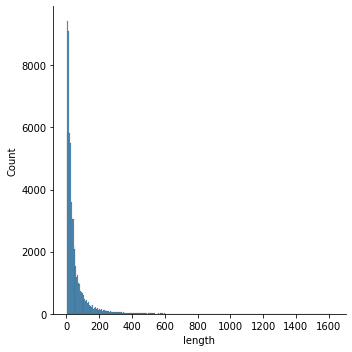

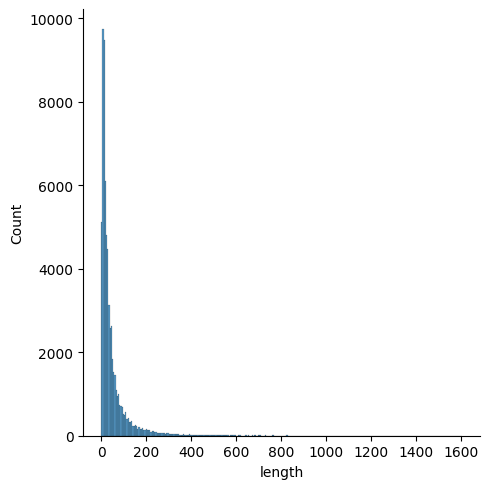

In [78]:
sns.displot(df['length'], bins=300)

# Statistical summary of the length column

- Explain what did you notice?

length
count  66666.000000
mean      54.688357
std       96.740354
min        1.000000
25%       12.000000
50%       26.000000
75%       56.000000
max     1622.000000

In [79]:
df.describe()

length
count  66666.000000
mean      51.849878
std       91.313872
min        0.000000
25%       11.000000
50%       24.000000
75%       54.000000
max     1605.000000

# Explaination :

- the std is high meaning the vaiance is high between the data, and the min and max show that
- the mean is not represinting the data as the outliers effect its amount  

# Plot a violin plot of the labels and its length

- We need to find the relationship between the text and its length.

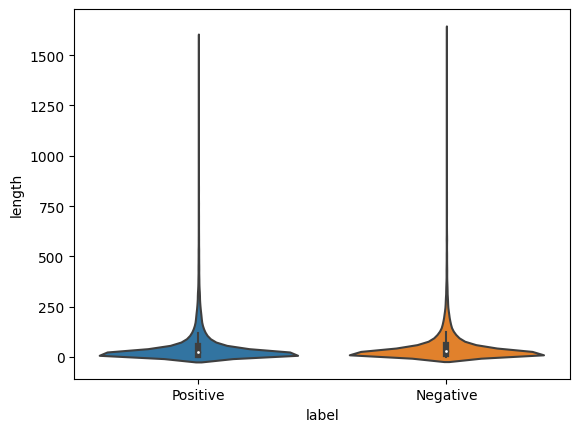

<Axes: xlabel='label', ylabel='length'>

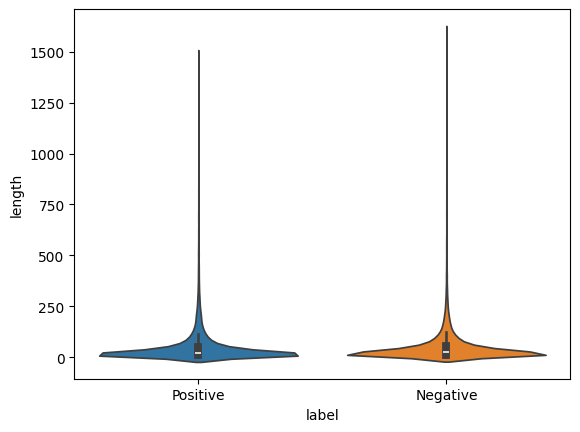

In [80]:
sns.violinplot(x=df['label'], y=df['length'], hue=df['label'])	

# Plot a box plot of the length

- Y axis is the length

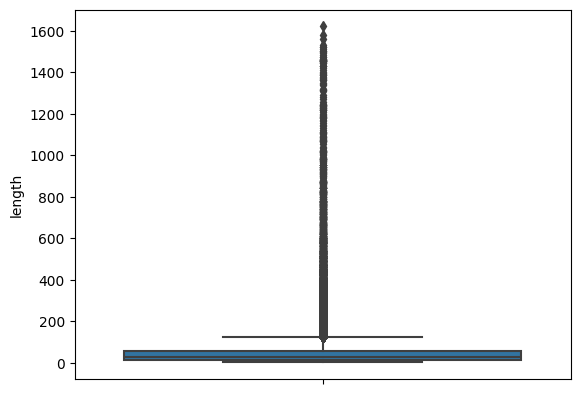

<Axes: ylabel='length'>

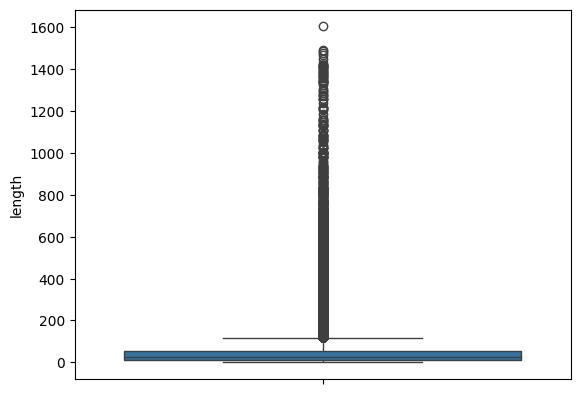

In [81]:
import seaborn as sns
sns.boxplot(df['length'])

# Remove the outliers

In [82]:
print(df.shape)

(66666, 3)


In [83]:
Q1 = df['length'].quantile(0.25)
Q3 = df['length'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df[(df['length'] < lower) | (df['length'] > upper)]
df = df.drop(outliers.index)

In [84]:
print(df.shape)

(60111, 3)


# Plot the displot again

C:\Users\Hamad\AppData\Local\Temp\ipykernel_376\1295244781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['length'] = raw_data.loc[:,'text'].apply(lambda x:len(x.split()))


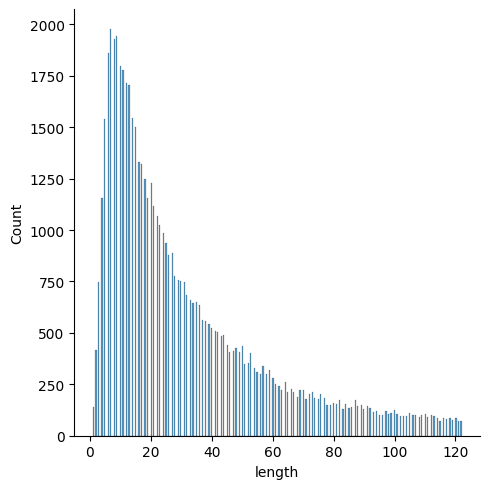

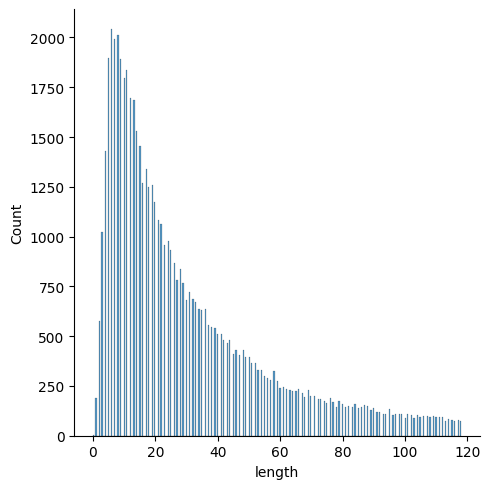

In [85]:
sns.displot(df['length'], bins=300)

# Plot a violin plot again

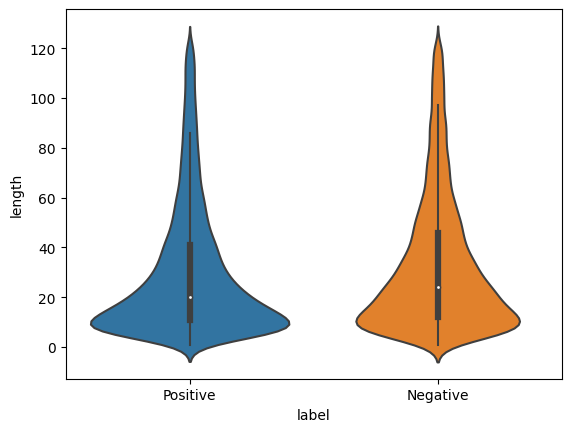

<Axes: xlabel='label', ylabel='length'>

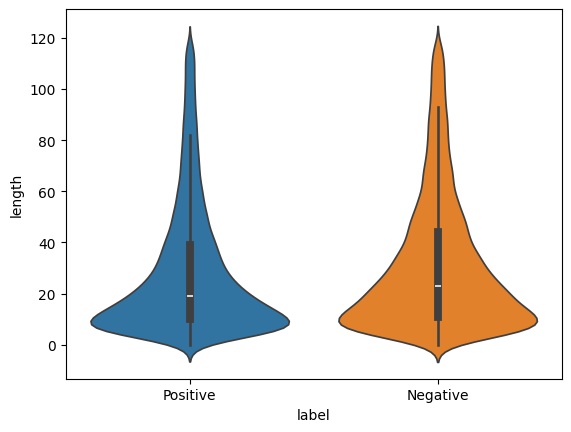

In [86]:
sns.violinplot(x=df['label'], y=df['length'], hue=df['label'])	

# Plot a box plot again

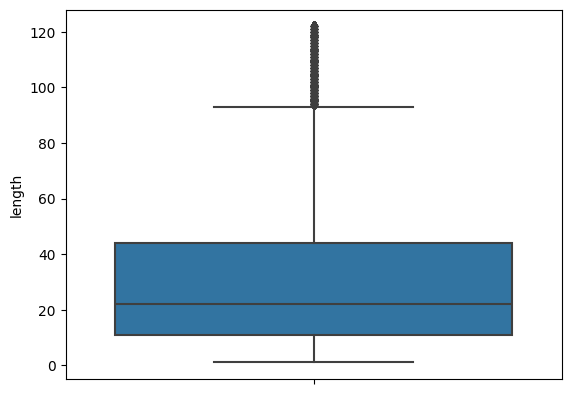

<Axes: ylabel='length'>

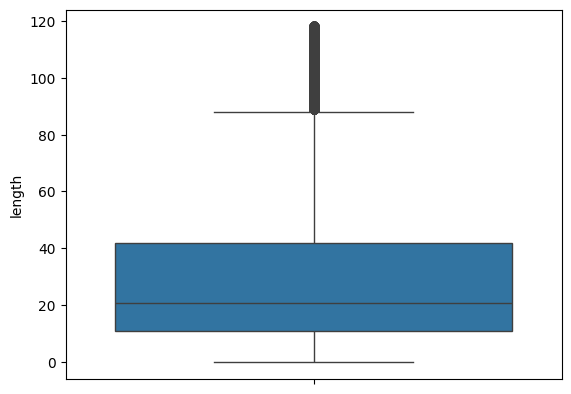

In [87]:
sns.boxplot(df['length'])

# Print the shape after removing outliers

(59966, 3)

In [88]:
#my orginal df have 1000 row only
df.shape

(60111, 3)

# Drop the length column

In [89]:
df.drop(columns= ['length'], inplace=True)
df

label                                               text
0      Positive  ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...
2      Positive  معلومات تاريخية عن الثورة الإيرانية وما حدث في...
3      Negative  جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...
4      Positive      شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..
5      Negative  صعب تصدق الروايه و صعب انك تربط احداثها و الاص...
...         ...                                                ...
66660  Negative  احسست اخيرا بشعور مدرسيين العربى وهما بيصححوا ...
66661  Negative  على الرغم من اعجابي الكبير للشاعر امل دنقل، ال...
66663  Positive  ممتاز لشباب ولكن يحتاج الى عوازل صوت . كل شي ج...
66664  Positive  لذيذ ولكن مطعم البسبور لذيذ جدا وطريقة تقديمهم...
66665  Positive  هذه هى أول محاولة جادة من طرفي لقراءة إحدى أعم...

[60111 rows x 2 columns]

# Split the dataset into positive and negative sets

- positive_data : Contains all positive data.
- negative_data : Contains all negative data.
- Reset the indexes, and do not forget to drop unwanted columns.

label                                               text
0  Positive  ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...
1  Positive  معلومات تاريخية عن الثورة الإيرانية وما حدث في...
2  Positive      شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..
3  Positive  : . بهاء طاهر كالعادة. بحب جدا طريقة الرمز... ...
4  Positive  كتاب مميز وفريد سرد فيه بشكل مختلف عن سيدنا مح...

In [90]:
positive_data = df[df['label'] == 'Positive']
positive_data.reset_index(drop= True, inplace = True)
positive_data

label                                               text
0      Positive  ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...
1      Positive  معلومات تاريخية عن الثورة الإيرانية وما حدث في...
2      Positive      شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..
3      Positive  : . بهاء طاهر كالعادة. بحب جدا طريقة الرمز... ...
4      Positive  كتاب مميز وفريد سرد فيه بشكل مختلف عن سيدنا مح...
...         ...                                                ...
30038  Positive                               ما اروع هذا الكتاب .
30039  Positive  رائع . انصحكم بالفندق لانه مره جميل ومافيه اي ...
30040  Positive  ممتاز لشباب ولكن يحتاج الى عوازل صوت . كل شي ج...
30041  Positive  لذيذ ولكن مطعم البسبور لذيذ جدا وطريقة تقديمهم...
30042  Positive  هذه هى أول محاولة جادة من طرفي لقراءة إحدى أعم...

[30043 rows x 2 columns]

label                                               text
0  Negative  جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...
1  Negative  صعب تصدق الروايه و صعب انك تربط احداثها و الاص...
2  Negative  مخيب للأمل. . يجب توفير الماء للشرب طوال فترة ...
3  Negative  الحق أني وصلت الصفحة و لم أكمل . الحاجة إلى ال...
4  Negative  اقامة غير ممتعة ، مستوى نظافة متدني ، بوفيه غا...

In [91]:
negative_data = df[df['label'] == 'Negative']
negative_data.reset_index(drop= True, inplace = True)
negative_data

label                                               text
0      Negative  جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...
1      Negative  صعب تصدق الروايه و صعب انك تربط احداثها و الاص...
2      Negative  مخيب للأمل. . يجب توفير الماء للشرب طوال فترة ...
3      Negative  الحق أني وصلت الصفحة و لم أكمل . الحاجة إلى ال...
4      Negative  اقامة غير ممتعة ، مستوى نظافة متدني ، بوفيه غا...
...         ...                                                ...
30063  Negative  فندق جيد نوعا ما . الاستقبال سرعة تلبية الخدما...
30064  Negative  إقامة كئيبة بكل معنى الكلمة كأنك تعيش في قبر ،...
30065  Negative               مش قادرة أكمله .. يمكن فى يوم أرجعله
30066  Negative  احسست اخيرا بشعور مدرسيين العربى وهما بيصححوا ...
30067  Negative  على الرغم من اعجابي الكبير للشاعر امل دنقل، ال...

[30068 rows x 2 columns]

# Plot a pie plot to visualize the classes

- Print the number of positive texts.
- Print the number of negative texts.
- Then, visualize them.

Number of positive tweets:  29952
Number of negative tweets:  30014


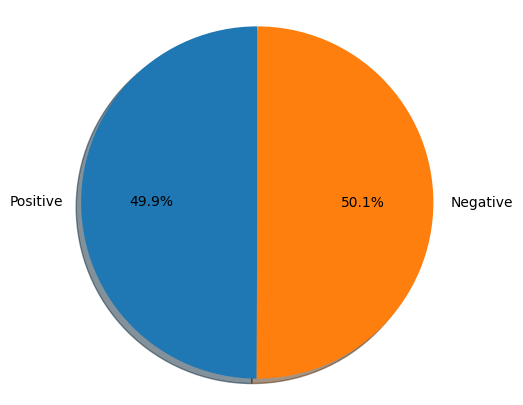

In [93]:
df['label'].value_counts()

label
Negative    30068
Positive    30043
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x201ecfbf910>,
 [Text(-1.0999997652397484, -0.0007186602108163603, 'Negative'),
  Text(1.0999997652397484, 0.0007186602108167141, 'Positive')],
 [Text(-0.5999998719489537, -0.0003919964786271056, '50.0%'),
  Text(0.5999998719489537, 0.0003919964786272986, '50.0%')])

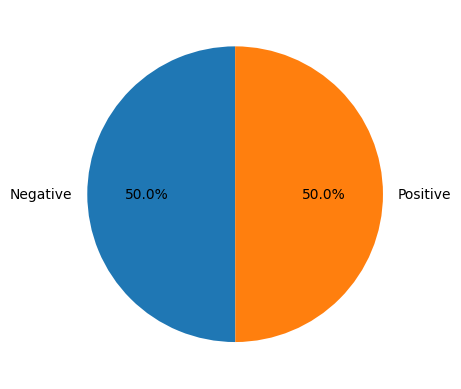

In [96]:
labels = df['label'].value_counts().index
values = df['label'].value_counts().values
plt.pie(x=values, labels=labels , autopct='%.1f%%', startangle=90)

# Print the first texts of both positive and negative sets

Positive tweet :-
ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور او السحور وتعامل الاستقبال قمة في الذوق والفندق بشكل عام ممتاز.

Negative tweet :-
جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا قصصا تسوق إستنتجات ليست منطقيه.. صنية بسبوسه إستثمار أفضل من شراء الكتاب


In [101]:
print('Positive tweet :-\n {}\n'.format(positive_data['text'][0]))
print('Negative tweet :-\n {}'.format(negative_data['text'][0]))

Positive tweet :-
 ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور او السحور وتعامل الاستقبال قمة في الذوق والفندق بشكل عام ممتاز.

Negative tweet :-
 جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا قصصا تسوق إستنتجات ليست منطقيه.. صنية بسبوسه إستثمار أفضل من شراء الكتاب


# Complex text

In [25]:
complex_tweet = raw_data.loc[19, 'text']
print(complex_tweet)

قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب .. و ها أنا أعود لأحذر الباقين .. إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب ... الرواية كان فيها من سطور تاريخ العراق الكثير .. حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله .. كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها .. ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب .. عشت مع الرواية بكل جوارحي .. جميلة بحق ..


# Optional : Clean the Complex Text

In [102]:
df['text'][19]

'قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب .. و ها أنا أعود لأحذر الباقين .. إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب ... الرواية كان فيها من سطور تاريخ العراق الكثير .. حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله .. كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها .. ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب .. عشت مع الرواية بكل جوارحي .. جميلة بحق ..'

In [112]:
tokens = word_tokenize(df['text'][19])
tokens[:10], print(len(tokens))

101


(['قرأت', 'أن', 'هذا', 'الكتاب', 'لا', 'يجب', 'أن', 'يقرأه', 'متعصب', '..'],
 None)

In [113]:
tokens = [token for token in tokens if token.isalpha()]
tokens[:10], print(len(tokens))

89


(['قرأت', 'أن', 'هذا', 'الكتاب', 'لا', 'يجب', 'أن', 'يقرأه', 'متعصب', 'و'],
 None)

In [114]:
tokens = [token for token in tokens if len(token) > 2]# im between to ste the limit 3 or 2 im not sure 
tokens[:10], print(len(tokens))

69


(['قرأت',
  'هذا',
  'الكتاب',
  'يجب',
  'يقرأه',
  'متعصب',
  'أنا',
  'أعود',
  'لأحذر',
  'الباقين'],
 None)

In [118]:
str = ''
for i in tokens:
    str += i +' '

print('Original words count = ', len(df['text'][19]),'\n', df['text'][19], '\n')
print('Cleaned words count = ', len(str),'\n', str, '\n')

Original words count =  494 
 قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب .. و ها أنا أعود لأحذر الباقين .. إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب ... الرواية كان فيها من سطور تاريخ العراق الكثير .. حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله .. كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها .. ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب .. عشت مع الرواية بكل جوارحي .. جميلة بحق .. 

Cleaned words count =  405 
 قرأت هذا الكتاب يجب يقرأه متعصب أنا أعود لأحذر الباقين كنت ترى أنك تخطئ أبدا أنك الحق الذي يزايله ضلال فلا تقرأ الكتاب الرواية كان فيها سطور تاريخ العراق الكثير حديث الكاتب حنة جعلني أتخيلها إحدى العجائز قريباتي المسلمات أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله كأنهن نذرن أعمارهن بغية تصلنا صورة العذراء طهرها قداستها ذلك الجنوح صوب الروحانية الصلوات تخترق قلب عشت الرواية بكل جوارحي جميلة بحق  



# Tokenize the complex text

In [26]:
# did it in the above cell 

The Complex Tweet Before Tokenization :
قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب .. و ها أنا أعود لأحذر الباقين .. إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب ... الرواية كان فيها من سطور تاريخ العراق الكثير .. حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله .. كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها .. ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب .. عشت مع الرواية بكل جوارحي .. جميلة بحق ..

The Complex Tweet After Tokenization  :
['قرأت', 'أن', 'هذا', 'الكتاب', 'لا', 'يجب', 'أن', 'يقرأه', 'متعصب', '..', 'و', 'ها', 'أنا', 'أعود', 'لأحذر', 'الباقين', '..', 'إن', 'كنت', 'ترى', 'أنك', 'لا', 'تخطئ', 'أبدا', 'و', 'أنك', 'الحق', 'الذي', 'لا', 'يزايله', 'ضلال', '،', 'فلا', 'تقرأ', 'الكتاب', '...', 'الرواية', 'كان', 'فيها', 'من', 'سطور', 'تاريخ', 'العراق', 'الكثير', '..', 'حديث', 'الكاتب', 'عن', 'حنة', '؛', 'جعلني', 'أتخيلها', 'إحدى', 'العجائز', 'من', 'قر

# Use NLTK to import the arabic stopwords.

- If you have any external stopword list, bring it and use it. It is OK :).

# Print the whole stopwords

هيا
راح
كما
بعد
فإذا
بعدا
ي
ضاد
لن
أمس
فإن
مكانَك
ما
قام
أنّى
لعل
ستمئة
أولئك
قرش
ثاني
ما انفك
إلّا
تلقاء
أبريل
أنتم
أف
ولكن
راء
اثني
هناك
نَخْ
آذار
أطعم
مادام
خ
كاف
تاسع
به
ظلّ
تلكم
صهْ
حمدا
تموز
إنه
تسعة
صبرا
أولاء
بها
لوما
إذما
لستن
ولو
اخلولق
هن
ذا
صاد
إلَيْكَ
أجمع
من
ج
حين
قلما
أوشك
وَيْ
يوان
أخو
حجا
لولا
نحن
متى
لها
اللذين
إيانا
حادي
ذواتي
ليسا
ئ
ّأيّان
هؤلاء
مارس
غدا
لستم
ذلكما
آمينَ
هَجْ
إليكم
اللتان
ممن
ؤ
علًّ
حَذارِ
تفعلون
لات
درى
فلس
مع
تسعمائة
إياك
أنتما
ذو
آهاً
عدا
صبر
اللتيا
منها
يفعلون
أيّان
دينار
ذِه
أرى
خبَّر
سبعون
بَلْهَ
بماذا
إذاً
ثلاث
ثلاثة
اللذان
بطآن
عسى
ق
سرعان
مئة
أحد
منه
تِي
كأنّ
وما
ثمّ
لما
دواليك
هلّا
مكانكنّ
خمس
د
كثيرا
شرع
يوليو
ثمّة
فيما
إحدى
هَذَيْنِ
وجد
كان
كأن
زاي
عَدَسْ
جلل
بهما
ابتدأ
تاء
الذي
بي
كى
ومن
ثمَّ
ذ
هذان
كأي
أيضا
والذي
لكما
وهو
ياء
آنفا
ت
نا
الذين
ثلاثمائة
أكتوبر
ثم
إى
أنتِ
غادر
ليت
ذانك
سبعمائة
نوفمبر
هاهنا
دون
لسن
ى
لام
أجل
م
ذاك
نفس
ما برح
لست
أنتن
جعل
أى
إليكما
رأى
واحد
صراحة
أنت
أفٍّ
آها
عاد
أيا
إذ
عشرة
سرا
أقبل
أمام
بين
اللاتي
خمسين
مس

In [120]:
import arabicstopwords.arabicstopwords as stp
print(len(stp.stopwords_list()), '\n')
print(stp.stopwords_list())

13465 

['أن', 'أنك', 'أنكما', 'أنكم', 'أنكن', 'أننا', 'أنها', 'أنه', 'أنهما', 'أنهم', 'أنهن', 'أني', 'بأن', 'بأنك', 'بأنكما', 'بأنكم', 'بأنكن', 'بأننا', 'بأنها', 'بأنه', 'بأنهما', 'بأنهم', 'بأنهن', 'بأني', 'فأن', 'فأنك', 'فأنكما', 'فأنكم', 'فأنكن', 'فأننا', 'فأنها', 'فأنه', 'فأنهما', 'فأنهم', 'فأنهن', 'فأني', 'فبأن', 'فبأنك', 'فبأنكما', 'فبأنكم', 'فبأنكن', 'فبأننا', 'فبأنها', 'فبأنه', 'فبأنهما', 'فبأنهم', 'فبأنهن', 'فبأني', 'فكأن', 'فكأنك', 'فكأنكما', 'فكأنكم', 'فكأنكن', 'فكأننا', 'فكأنها', 'فكأنه', 'فكأنهما', 'فكأنهم', 'فكأنهن', 'فكأني', 'فلأن', 'فلأنك', 'فلأنكما', 'فلأنكم', 'فلأنكن', 'فلأننا', 'فلأنها', 'فلأنه', 'فلأنهما', 'فلأنهم', 'فلأنهن', 'فلأني', 'كأن', 'كأنك', 'كأنكما', 'كأنكم', 'كأنكن', 'كأننا', 'كأنها', 'كأنه', 'كأنهما', 'كأنهم', 'كأنهن', 'كأني', 'لأن', 'لأنك', 'لأنكما', 'لأنكم', 'لأنكن', 'لأننا', 'لأنها', 'لأنه', 'لأنهما', 'لأنهم', 'لأنهن', 'لأني', 'وأن', 'وأنك', 'وأنكما', 'وأنكم', 'وأنكن', 'وأننا', 'وأنها', 'وأنه', 'وأنهما', 'وأنهم', 'وأنهن', 'وأني', 'وبأن', 'وبأنك', 'وبأن

# Print the punctuation marks

- Hint : Use string python class to print the punctuation marks. You can use an external punctuation marks list.
- Another Hint : The dataset contains a punctuation marks that are not in the punctuation marks of Python, such as ،؛
- Try to figure out how to add these punctuation marks to use them in the next step.

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~،؛


In [156]:
import string 

In [256]:
AraPun = {'waqf':'،؛.', 'sound' : '...:؟!','hasr': '«»-()[]'} 

In [158]:
EngPun = string.punctuation 
Pun = EngPun+'،؛؟«»'
Pun

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~،؛؟«»'

In [162]:
s="اللغة العربية و علامات الترقيم ؛ ، ... ؟؟؟ !! %%^^^^##)) «»«»«»"
s.translate(str.maketrans('', '',Pun))

'اللغة العربية و علامات الترقيم       '

In [163]:
s.translate(str.maketrans('', '',Pun)).strip()

'اللغة العربية و علامات الترقيم'

# Remove stopwords and punctuation marks

- Hint : in the punctuation marks, you will find an error if you use the same method as we discuss in the lecture. Figure out what is the suitable method in our situation.

- Before Removing Stopwords and Punctuation Marks :-

قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب .. و ها أنا أعود لأحذر الباقين .. إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب ... الرواية كان فيها من سطور تاريخ العراق الكثير .. حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله .. كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها .. ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب .. عشت مع الرواية بكل جوارحي .. جميلة بحق ..

- After Removing Stopwords and Punctuation Marks :-

قرأت الكتاب يجب يقرأه متعصب أعود لأحذر الباقين كنت ترى أنك تخطئ أنك الحق يزايله ضلال تقرأ الكتاب الرواية سطور تاريخ العراق الكثير حديث الكاتب حنة جعلني أتخيلها العجائز قريباتي المسلمات أرواح تحمل الاستسلام الفطري الخفي لتعاليم الله كأنهن نذرن أعمارهن بغية تصلنا صورة العذراء طهرها قداستها الجنوح صوب الروحانية الصلوات تخترق قلب عشت الرواية بكل جوارحي جميلة بحق


In [181]:
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel
import arabicstopwords.arabicstopwords as stp

In [259]:
def StopPun(x):
    print('The Original Sentence, words count = ', len(x),'\n', x, '\n')

    token = tokenize(x, conditions=is_arabicrange, morphs=strip_tashkeel) 
    print('The Tokenized Sentence, token Length= ', len(token),'\n', token, '\n')

    NoStopToken = [i for i in token if stp.is_stop(i) == False]
    print('token w/o Stop words, token Length = ', len(NoStopToken),'\n', NoStopToken, '\n')
    
    Punc = [i for i in NoStopToken if i.translate(str.maketrans('', '',Pun)).strip().isalpha()]
    print('Sentence w/o Pun. token Length = ', len(Punc),'\n', Punc, '\n')

    print('Length difference ', len(token) - len(Punc))

    return Punc

In [260]:
Sentence = StopPun(df['text'][19])

The Original Sentence, words count =  494 
 قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب .. و ها أنا أعود لأحذر الباقين .. إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب ... الرواية كان فيها من سطور تاريخ العراق الكثير .. حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله .. كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها .. ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب .. عشت مع الرواية بكل جوارحي .. جميلة بحق .. 

The Tokenized Sentence, token Length=  92 
 ['قرأت', 'أن', 'هذا', 'الكتاب', 'لا', 'يجب', 'أن', 'يقرأه', 'متعصب', 'و', 'ها', 'أنا', 'أعود', 'لأحذر', 'الباقين', 'إن', 'كنت', 'ترى', 'أنك', 'لا', 'تخطئ', 'أبدا', 'و', 'أنك', 'الحق', 'الذي', 'لا', 'يزايله', 'ضلال', '،', 'فلا', 'تقرأ', 'الكتاب', 'الرواية', 'كان', 'فيها', 'من', 'سطور', 'تاريخ', 'العراق', 'الكثير', 'حديث', 'الكاتب', 'عن', 'حنة', '؛', 'جعلني', 'أتخيلها', 'إحدى', 'العجائز', 'من', 'قريباتي', 'المسلما

# Stemming

- Hint : Search for snowballstemmer and use it to stem the arabic words. Or, if you have another tool or library to stem the arabic words, use it and explain why did you use it.

- snowballstemmer : https://arabicstemmer.com/

- Before stemming :-

قرأت الكتاب يجب يقرأه متعصب أعود لأحذر الباقين كنت ترى أنك تخطئ أنك الحق يزايله ضلال تقرأ الكتاب الرواية سطور تاريخ العراق الكثير حديث الكاتب حنة جعلني أتخيلها العجائز قريباتي المسلمات أرواح تحمل الاستسلام الفطري الخفي لتعاليم الله كأنهن نذرن أعمارهن بغية تصلنا صورة العذراء طهرها قداستها الجنوح صوب الروحانية الصلوات تخترق قلب عشت الرواية بكل جوارحي جميلة بحق

- After stemming :-

قرء كتاب يجب يقرء متعصب اعود لاحذر باق كنت تري انك تخطء انك الحق يزايل ضلال تقرء كتاب روا سطور تاريخ عراق كثير حديث كاتب حنة جعل اتخيل عجايز قريبات مسلم ارواح تحمل استسلام فطر الخف لتعاليم الله كان نذر اعمار بغ تصل صور عذراء طهر قداس جنوح صوب روحان صلو تخترق قلب عشت روا بكل جوارح جميل بحق


In [255]:
from tashaphyne.stemming import ArabicLightStemmer
ArListem = ArabicLightStemmer()
stem_words = [ArListem.light_stem(i) for i in Sentence]
text = " ".join(x for x in stem_words)
text

'قرأ كتاب جب قرأ متعصب عود حذر باق نت رى خطئ حق زايل ضلال قرأ كتاب روا سطور تاريخ عراق كثير حديث كاتب حن جعل خيل إحدى عجائز قريبا مسلم رواح حمل استسلام فطر خف تعاليم له ذر عمار غي صل صور عذراء طهر قداس جنوح صوب روحان صلو خترق قلب عش روا جوارح جميل حق'

In [252]:
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")
stem_words = [ar_stemmer.stemWord(i) for i in Sentence]
text = " ".join(x for x in stem_words)
text

'قرء كتاب يجب يقرء متعصب اعود لاحذر باق كنت تري تخطء الحق يزايل ضلال تقرء كتاب روا سطور تاريخ عراق كثير حديث كاتب حنة جعل اتخيل احدي عجايز قريبات مسلم ارواح تحمل استسلام فطر الخف لتعاليم الله نذر اعمار بغ تصل صور عذراء طهر قداس جنوح صوب روحان صلو تخترق قلب عشت روا جوارح جميل بحق'

**all libraries im using are developed by dr. Taha Zerrouki**

# General text preprocessing function

- Build a general function for the whole texts.
- The function recieve a text, prepare it, then return the result text.
- It will starts with text cleaning, then tokenization, remove stopwords, remove punctuation marks, and lastly stem the tokens (as we did before with the complex text).

In [293]:
def Clean(x):
    #print('The Original Sentence, words count = ', len(x),'\n', x, '\n')

    token = tokenize(x, conditions=is_arabicrange, morphs=strip_tashkeel) 
    #print('The Tokenized Sentence, token Length= ', len(token),'\n', token, '\n')

    NoStopToken = [i for i in token if stp.is_stop(i) == False]
    #print('token w/o Stop words, token Length = ', len(NoStopToken),'\n', NoStopToken, '\n')
    
    Punc = [i for i in NoStopToken if i.translate(str.maketrans('', '',Pun)).strip().isalpha()]
    #print('Sentence w/o Pun. words count = ', len(Punc),'\n', Punc, '\n')

    ArListem = ArabicLightStemmer()
    stem_words = [ArListem.light_stem(i) for i in Punc]
    text = " ".join(x for x in stem_words)
    text

    #print('Length difference ', len(token) - len(stem_words))

    return stem_words

# Map the label column

- Positive = 1
- Negative = 0

label                                               text
0      1  ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...
2      1  معلومات تاريخية عن الثورة الإيرانية وما حدث في...
3      0  جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...
4      1      شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..
5      0  صعب تصدق الروايه و صعب انك تربط احداثها و الاص...

label                                               text
66660      0  احسست اخيرا بشعور مدرسيين العربى وهما بيصححوا ...
66661      0  على الرغم من اعجابي الكبير للشاعر امل دنقل، ال...
66663      1  ممتاز لشباب ولكن يحتاج الى عوازل صوت . كل شي ج...
66664      1  لذيذ ولكن مطعم البسبور لذيذ جدا وطريقة تقديمهم...
66665      1  هذه هى أول محاولة جادة من طرفي لقراءة إحدى أعم...

In [263]:
df['label'] = df['label'].map({'Positive' : 1, 'Negative' : 0})
df

label                                               text
0          1  ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...
2          1  معلومات تاريخية عن الثورة الإيرانية وما حدث في...
3          0  جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...
4          1      شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..
5          0  صعب تصدق الروايه و صعب انك تربط احداثها و الاص...
...      ...                                                ...
66660      0  احسست اخيرا بشعور مدرسيين العربى وهما بيصححوا ...
66661      0  على الرغم من اعجابي الكبير للشاعر امل دنقل، ال...
66663      1  ممتاز لشباب ولكن يحتاج الى عوازل صوت . كل شي ج...
66664      1  لذيذ ولكن مطعم البسبور لذيذ جدا وطريقة تقديمهم...
66665      1  هذه هى أول محاولة جادة من طرفي لقراءة إحدى أعم...

[60111 rows x 2 columns]

# Split the dataset into X and Y

In [289]:
df_sample = df.head(1000)
X = df_sample[['text']]
Y = df_sample[['label']]

# Word frequency dictionary

In [294]:
def build_freqs(texts, labels):
    
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    yslist = np.squeeze(labels).tolist()
    texts = np.squeeze(X).tolist()
    
    # Write your code here
    freqs = {}
    for text, y in zip(texts, yslist):

        cleaned_text = Clean(text)

        for token in cleaned_text:
            pair = (token, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    
    return freqs

In [295]:
# create frequency dictionary
freqs = build_freqs(X, Y)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) =  {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) =  6960


In [38]:
# create frequency dictionary
freqs = build_freqs(X, Y)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) =  {len(freqs)}')

text 1 processing finished
text 2 processing finished
text 3 processing finished
text 4 processing finished
text 5 processing finished
text 6 processing finished
text 7 processing finished
text 8 processing finished
text 9 processing finished
text 10 processing finished
text 11 processing finished
text 12 processing finished
text 13 processing finished
text 14 processing finished
text 15 processing finished
text 16 processing finished
text 17 processing finished
text 18 processing finished
text 19 processing finished
text 20 processing finished
text 21 processing finished
text 22 processing finished
text 23 processing finished
text 24 processing finished
text 25 processing finished
text 26 processing finished
text 27 processing finished
text 28 processing finished
text 29 processing finished
text 30 processing finished
text 31 processing finished
text 32 processing finished
text 33 processing finished
text 34 processing finished
text 35 processing finished
text 36 processing finished
t

text 315 processing finished
text 316 processing finished
text 317 processing finished
text 318 processing finished
text 319 processing finished
text 320 processing finished
text 321 processing finished
text 322 processing finished
text 323 processing finished
text 324 processing finished
text 325 processing finished
text 326 processing finished
text 327 processing finished
text 328 processing finished
text 329 processing finished
text 330 processing finished
text 331 processing finished
text 332 processing finished
text 333 processing finished
text 334 processing finished
text 335 processing finished
text 336 processing finished
text 337 processing finished
text 338 processing finished
text 339 processing finished
text 340 processing finished
text 341 processing finished
text 342 processing finished
text 343 processing finished
text 344 processing finished
text 345 processing finished
text 346 processing finished
text 347 processing finished
text 348 processing finished
text 349 proce

text 631 processing finished
text 632 processing finished
text 633 processing finished
text 634 processing finished
text 635 processing finished
text 636 processing finished
text 637 processing finished
text 638 processing finished
text 639 processing finished
text 640 processing finished
text 641 processing finished
text 642 processing finished
text 643 processing finished
text 644 processing finished
text 645 processing finished
text 646 processing finished
text 647 processing finished
text 648 processing finished
text 649 processing finished
text 650 processing finished
text 651 processing finished
text 652 processing finished
text 653 processing finished
text 654 processing finished
text 655 processing finished
text 656 processing finished
text 657 processing finished
text 658 processing finished
text 659 processing finished
text 660 processing finished
text 661 processing finished
text 662 processing finished
text 663 processing finished
text 664 processing finished
text 665 proce

text 954 processing finished
text 955 processing finished
text 956 processing finished
text 957 processing finished
text 958 processing finished
text 959 processing finished
text 960 processing finished
text 961 processing finished
text 962 processing finished
text 963 processing finished
text 964 processing finished
text 965 processing finished
text 966 processing finished
text 967 processing finished
text 968 processing finished
text 969 processing finished
text 970 processing finished
text 971 processing finished
text 972 processing finished
text 973 processing finished
text 974 processing finished
text 975 processing finished
text 976 processing finished
text 977 processing finished
text 978 processing finished
text 979 processing finished
text 980 processing finished
text 981 processing finished
text 982 processing finished
text 983 processing finished
text 984 processing finished
text 985 processing finished
text 986 processing finished
text 987 processing finished
text 988 proce

text 1260 processing finished
text 1261 processing finished
text 1262 processing finished
text 1263 processing finished
text 1264 processing finished
text 1265 processing finished
text 1266 processing finished
text 1267 processing finished
text 1268 processing finished
text 1269 processing finished
text 1270 processing finished
text 1271 processing finished
text 1272 processing finished
text 1273 processing finished
text 1274 processing finished
text 1275 processing finished
text 1276 processing finished
text 1277 processing finished
text 1278 processing finished
text 1279 processing finished
text 1280 processing finished
text 1281 processing finished
text 1282 processing finished
text 1283 processing finished
text 1284 processing finished
text 1285 processing finished
text 1286 processing finished
text 1287 processing finished
text 1288 processing finished
text 1289 processing finished
text 1290 processing finished
text 1291 processing finished
text 1292 processing finished
text 1293 

text 1539 processing finished
text 1540 processing finished
text 1541 processing finished
text 1542 processing finished
text 1543 processing finished
text 1544 processing finished
text 1545 processing finished
text 1546 processing finished
text 1547 processing finished
text 1548 processing finished
text 1549 processing finished
text 1550 processing finished
text 1551 processing finished
text 1552 processing finished
text 1553 processing finished
text 1554 processing finished
text 1555 processing finished
text 1556 processing finished
text 1557 processing finished
text 1558 processing finished
text 1559 processing finished
text 1560 processing finished
text 1561 processing finished
text 1562 processing finished
text 1563 processing finished
text 1564 processing finished
text 1565 processing finished
text 1566 processing finished
text 1567 processing finished
text 1568 processing finished
text 1569 processing finished
text 1570 processing finished
text 1571 processing finished
text 1572 

text 1836 processing finished
text 1837 processing finished
text 1838 processing finished
text 1839 processing finished
text 1840 processing finished
text 1841 processing finished
text 1842 processing finished
text 1843 processing finished
text 1844 processing finished
text 1845 processing finished
text 1846 processing finished
text 1847 processing finished
text 1848 processing finished
text 1849 processing finished
text 1850 processing finished
text 1851 processing finished
text 1852 processing finished
text 1853 processing finished
text 1854 processing finished
text 1855 processing finished
text 1856 processing finished
text 1857 processing finished
text 1858 processing finished
text 1859 processing finished
text 1860 processing finished
text 1861 processing finished
text 1862 processing finished
text 1863 processing finished
text 1864 processing finished
text 1865 processing finished
text 1866 processing finished
text 1867 processing finished
text 1868 processing finished
text 1869 

text 2161 processing finished
text 2162 processing finished
text 2163 processing finished
text 2164 processing finished
text 2165 processing finished
text 2166 processing finished
text 2167 processing finished
text 2168 processing finished
text 2169 processing finished
text 2170 processing finished
text 2171 processing finished
text 2172 processing finished
text 2173 processing finished
text 2174 processing finished
text 2175 processing finished
text 2176 processing finished
text 2177 processing finished
text 2178 processing finished
text 2179 processing finished
text 2180 processing finished
text 2181 processing finished
text 2182 processing finished
text 2183 processing finished
text 2184 processing finished
text 2185 processing finished
text 2186 processing finished
text 2187 processing finished
text 2188 processing finished
text 2189 processing finished
text 2190 processing finished
text 2191 processing finished
text 2192 processing finished
text 2193 processing finished
text 2194 

text 2468 processing finished
text 2469 processing finished
text 2470 processing finished
text 2471 processing finished
text 2472 processing finished
text 2473 processing finished
text 2474 processing finished
text 2475 processing finished
text 2476 processing finished
text 2477 processing finished
text 2478 processing finished
text 2479 processing finished
text 2480 processing finished
text 2481 processing finished
text 2482 processing finished
text 2483 processing finished
text 2484 processing finished
text 2485 processing finished
text 2486 processing finished
text 2487 processing finished
text 2488 processing finished
text 2489 processing finished
text 2490 processing finished
text 2491 processing finished
text 2492 processing finished
text 2493 processing finished
text 2494 processing finished
text 2495 processing finished
text 2496 processing finished
text 2497 processing finished
text 2498 processing finished
text 2499 processing finished
text 2500 processing finished
text 2501 

text 2776 processing finished
text 2777 processing finished
text 2778 processing finished
text 2779 processing finished
text 2780 processing finished
text 2781 processing finished
text 2782 processing finished
text 2783 processing finished
text 2784 processing finished
text 2785 processing finished
text 2786 processing finished
text 2787 processing finished
text 2788 processing finished
text 2789 processing finished
text 2790 processing finished
text 2791 processing finished
text 2792 processing finished
text 2793 processing finished
text 2794 processing finished
text 2795 processing finished
text 2796 processing finished
text 2797 processing finished
text 2798 processing finished
text 2799 processing finished
text 2800 processing finished
text 2801 processing finished
text 2802 processing finished
text 2803 processing finished
text 2804 processing finished
text 2805 processing finished
text 2806 processing finished
text 2807 processing finished
text 2808 processing finished
text 2809 

text 3095 processing finished
text 3096 processing finished
text 3097 processing finished
text 3098 processing finished
text 3099 processing finished
text 3100 processing finished
text 3101 processing finished
text 3102 processing finished
text 3103 processing finished
text 3104 processing finished
text 3105 processing finished
text 3106 processing finished
text 3107 processing finished
text 3108 processing finished
text 3109 processing finished
text 3110 processing finished
text 3111 processing finished
text 3112 processing finished
text 3113 processing finished
text 3114 processing finished
text 3115 processing finished
text 3116 processing finished
text 3117 processing finished
text 3118 processing finished
text 3119 processing finished
text 3120 processing finished
text 3121 processing finished
text 3122 processing finished
text 3123 processing finished
text 3124 processing finished
text 3125 processing finished
text 3126 processing finished
text 3127 processing finished
text 3128 

text 3407 processing finished
text 3408 processing finished
text 3409 processing finished
text 3410 processing finished
text 3411 processing finished
text 3412 processing finished
text 3413 processing finished
text 3414 processing finished
text 3415 processing finished
text 3416 processing finished
text 3417 processing finished
text 3418 processing finished
text 3419 processing finished
text 3420 processing finished
text 3421 processing finished
text 3422 processing finished
text 3423 processing finished
text 3424 processing finished
text 3425 processing finished
text 3426 processing finished
text 3427 processing finished
text 3428 processing finished
text 3429 processing finished
text 3430 processing finished
text 3431 processing finished
text 3432 processing finished
text 3433 processing finished
text 3434 processing finished
text 3435 processing finished
text 3436 processing finished
text 3437 processing finished
text 3438 processing finished
text 3439 processing finished
text 3440 

text 3702 processing finished
text 3703 processing finished
text 3704 processing finished
text 3705 processing finished
text 3706 processing finished
text 3707 processing finished
text 3708 processing finished
text 3709 processing finished
text 3710 processing finished
text 3711 processing finished
text 3712 processing finished
text 3713 processing finished
text 3714 processing finished
text 3715 processing finished
text 3716 processing finished
text 3717 processing finished
text 3718 processing finished
text 3719 processing finished
text 3720 processing finished
text 3721 processing finished
text 3722 processing finished
text 3723 processing finished
text 3724 processing finished
text 3725 processing finished
text 3726 processing finished
text 3727 processing finished
text 3728 processing finished
text 3729 processing finished
text 3730 processing finished
text 3731 processing finished
text 3732 processing finished
text 3733 processing finished
text 3734 processing finished
text 3735 

text 3989 processing finished
text 3990 processing finished
text 3991 processing finished
text 3992 processing finished
text 3993 processing finished
text 3994 processing finished
text 3995 processing finished
text 3996 processing finished
text 3997 processing finished
text 3998 processing finished
text 3999 processing finished
text 4000 processing finished
text 4001 processing finished
text 4002 processing finished
text 4003 processing finished
text 4004 processing finished
text 4005 processing finished
text 4006 processing finished
text 4007 processing finished
text 4008 processing finished
text 4009 processing finished
text 4010 processing finished
text 4011 processing finished
text 4012 processing finished
text 4013 processing finished
text 4014 processing finished
text 4015 processing finished
text 4016 processing finished
text 4017 processing finished
text 4018 processing finished
text 4019 processing finished
text 4020 processing finished
text 4021 processing finished
text 4022 

text 4278 processing finished
text 4279 processing finished
text 4280 processing finished
text 4281 processing finished
text 4282 processing finished
text 4283 processing finished
text 4284 processing finished
text 4285 processing finished
text 4286 processing finished
text 4287 processing finished
text 4288 processing finished
text 4289 processing finished
text 4290 processing finished
text 4291 processing finished
text 4292 processing finished
text 4293 processing finished
text 4294 processing finished
text 4295 processing finished
text 4296 processing finished
text 4297 processing finished
text 4298 processing finished
text 4299 processing finished
text 4300 processing finished
text 4301 processing finished
text 4302 processing finished
text 4303 processing finished
text 4304 processing finished
text 4305 processing finished
text 4306 processing finished
text 4307 processing finished
text 4308 processing finished
text 4309 processing finished
text 4310 processing finished
text 4311 

text 4590 processing finished
text 4591 processing finished
text 4592 processing finished
text 4593 processing finished
text 4594 processing finished
text 4595 processing finished
text 4596 processing finished
text 4597 processing finished
text 4598 processing finished
text 4599 processing finished
text 4600 processing finished
text 4601 processing finished
text 4602 processing finished
text 4603 processing finished
text 4604 processing finished
text 4605 processing finished
text 4606 processing finished
text 4607 processing finished
text 4608 processing finished
text 4609 processing finished
text 4610 processing finished
text 4611 processing finished
text 4612 processing finished
text 4613 processing finished
text 4614 processing finished
text 4615 processing finished
text 4616 processing finished
text 4617 processing finished
text 4618 processing finished
text 4619 processing finished
text 4620 processing finished
text 4621 processing finished
text 4622 processing finished
text 4623 

text 4883 processing finished
text 4884 processing finished
text 4885 processing finished
text 4886 processing finished
text 4887 processing finished
text 4888 processing finished
text 4889 processing finished
text 4890 processing finished
text 4891 processing finished
text 4892 processing finished
text 4893 processing finished
text 4894 processing finished
text 4895 processing finished
text 4896 processing finished
text 4897 processing finished
text 4898 processing finished
text 4899 processing finished
text 4900 processing finished
text 4901 processing finished
text 4902 processing finished
text 4903 processing finished
text 4904 processing finished
text 4905 processing finished
text 4906 processing finished
text 4907 processing finished
text 4908 processing finished
text 4909 processing finished
text 4910 processing finished
text 4911 processing finished
text 4912 processing finished
text 4913 processing finished
text 4914 processing finished
text 4915 processing finished
text 4916 

text 5198 processing finished
text 5199 processing finished
text 5200 processing finished
text 5201 processing finished
text 5202 processing finished
text 5203 processing finished
text 5204 processing finished
text 5205 processing finished
text 5206 processing finished
text 5207 processing finished
text 5208 processing finished
text 5209 processing finished
text 5210 processing finished
text 5211 processing finished
text 5212 processing finished
text 5213 processing finished
text 5214 processing finished
text 5215 processing finished
text 5216 processing finished
text 5217 processing finished
text 5218 processing finished
text 5219 processing finished
text 5220 processing finished
text 5221 processing finished
text 5222 processing finished
text 5223 processing finished
text 5224 processing finished
text 5225 processing finished
text 5226 processing finished
text 5227 processing finished
text 5228 processing finished
text 5229 processing finished
text 5230 processing finished
text 5231 

text 5507 processing finished
text 5508 processing finished
text 5509 processing finished
text 5510 processing finished
text 5511 processing finished
text 5512 processing finished
text 5513 processing finished
text 5514 processing finished
text 5515 processing finished
text 5516 processing finished
text 5517 processing finished
text 5518 processing finished
text 5519 processing finished
text 5520 processing finished
text 5521 processing finished
text 5522 processing finished
text 5523 processing finished
text 5524 processing finished
text 5525 processing finished
text 5526 processing finished
text 5527 processing finished
text 5528 processing finished
text 5529 processing finished
text 5530 processing finished
text 5531 processing finished
text 5532 processing finished
text 5533 processing finished
text 5534 processing finished
text 5535 processing finished
text 5536 processing finished
text 5537 processing finished
text 5538 processing finished
text 5539 processing finished
text 5540 

text 5807 processing finished
text 5808 processing finished
text 5809 processing finished
text 5810 processing finished
text 5811 processing finished
text 5812 processing finished
text 5813 processing finished
text 5814 processing finished
text 5815 processing finished
text 5816 processing finished
text 5817 processing finished
text 5818 processing finished
text 5819 processing finished
text 5820 processing finished
text 5821 processing finished
text 5822 processing finished
text 5823 processing finished
text 5824 processing finished
text 5825 processing finished
text 5826 processing finished
text 5827 processing finished
text 5828 processing finished
text 5829 processing finished
text 5830 processing finished
text 5831 processing finished
text 5832 processing finished
text 5833 processing finished
text 5834 processing finished
text 5835 processing finished
text 5836 processing finished
text 5837 processing finished
text 5838 processing finished
text 5839 processing finished
text 5840 

text 6125 processing finished
text 6126 processing finished
text 6127 processing finished
text 6128 processing finished
text 6129 processing finished
text 6130 processing finished
text 6131 processing finished
text 6132 processing finished
text 6133 processing finished
text 6134 processing finished
text 6135 processing finished
text 6136 processing finished
text 6137 processing finished
text 6138 processing finished
text 6139 processing finished
text 6140 processing finished
text 6141 processing finished
text 6142 processing finished
text 6143 processing finished
text 6144 processing finished
text 6145 processing finished
text 6146 processing finished
text 6147 processing finished
text 6148 processing finished
text 6149 processing finished
text 6150 processing finished
text 6151 processing finished
text 6152 processing finished
text 6153 processing finished
text 6154 processing finished
text 6155 processing finished
text 6156 processing finished
text 6157 processing finished
text 6158 

text 6438 processing finished
text 6439 processing finished
text 6440 processing finished
text 6441 processing finished
text 6442 processing finished
text 6443 processing finished
text 6444 processing finished
text 6445 processing finished
text 6446 processing finished
text 6447 processing finished
text 6448 processing finished
text 6449 processing finished
text 6450 processing finished
text 6451 processing finished
text 6452 processing finished
text 6453 processing finished
text 6454 processing finished
text 6455 processing finished
text 6456 processing finished
text 6457 processing finished
text 6458 processing finished
text 6459 processing finished
text 6460 processing finished
text 6461 processing finished
text 6462 processing finished
text 6463 processing finished
text 6464 processing finished
text 6465 processing finished
text 6466 processing finished
text 6467 processing finished
text 6468 processing finished
text 6469 processing finished
text 6470 processing finished
text 6471 

text 6754 processing finished
text 6755 processing finished
text 6756 processing finished
text 6757 processing finished
text 6758 processing finished
text 6759 processing finished
text 6760 processing finished
text 6761 processing finished
text 6762 processing finished
text 6763 processing finished
text 6764 processing finished
text 6765 processing finished
text 6766 processing finished
text 6767 processing finished
text 6768 processing finished
text 6769 processing finished
text 6770 processing finished
text 6771 processing finished
text 6772 processing finished
text 6773 processing finished
text 6774 processing finished
text 6775 processing finished
text 6776 processing finished
text 6777 processing finished
text 6778 processing finished
text 6779 processing finished
text 6780 processing finished
text 6781 processing finished
text 6782 processing finished
text 6783 processing finished
text 6784 processing finished
text 6785 processing finished
text 6786 processing finished
text 6787 

text 7050 processing finished
text 7051 processing finished
text 7052 processing finished
text 7053 processing finished
text 7054 processing finished
text 7055 processing finished
text 7056 processing finished
text 7057 processing finished
text 7058 processing finished
text 7059 processing finished
text 7060 processing finished
text 7061 processing finished
text 7062 processing finished
text 7063 processing finished
text 7064 processing finished
text 7065 processing finished
text 7066 processing finished
text 7067 processing finished
text 7068 processing finished
text 7069 processing finished
text 7070 processing finished
text 7071 processing finished
text 7072 processing finished
text 7073 processing finished
text 7074 processing finished
text 7075 processing finished
text 7076 processing finished
text 7077 processing finished
text 7078 processing finished
text 7079 processing finished
text 7080 processing finished
text 7081 processing finished
text 7082 processing finished
text 7083 

text 7364 processing finished
text 7365 processing finished
text 7366 processing finished
text 7367 processing finished
text 7368 processing finished
text 7369 processing finished
text 7370 processing finished
text 7371 processing finished
text 7372 processing finished
text 7373 processing finished
text 7374 processing finished
text 7375 processing finished
text 7376 processing finished
text 7377 processing finished
text 7378 processing finished
text 7379 processing finished
text 7380 processing finished
text 7381 processing finished
text 7382 processing finished
text 7383 processing finished
text 7384 processing finished
text 7385 processing finished
text 7386 processing finished
text 7387 processing finished
text 7388 processing finished
text 7389 processing finished
text 7390 processing finished
text 7391 processing finished
text 7392 processing finished
text 7393 processing finished
text 7394 processing finished
text 7395 processing finished
text 7396 processing finished
text 7397 

text 7689 processing finished
text 7690 processing finished
text 7691 processing finished
text 7692 processing finished
text 7693 processing finished
text 7694 processing finished
text 7695 processing finished
text 7696 processing finished
text 7697 processing finished
text 7698 processing finished
text 7699 processing finished
text 7700 processing finished
text 7701 processing finished
text 7702 processing finished
text 7703 processing finished
text 7704 processing finished
text 7705 processing finished
text 7706 processing finished
text 7707 processing finished
text 7708 processing finished
text 7709 processing finished
text 7710 processing finished
text 7711 processing finished
text 7712 processing finished
text 7713 processing finished
text 7714 processing finished
text 7715 processing finished
text 7716 processing finished
text 7717 processing finished
text 7718 processing finished
text 7719 processing finished
text 7720 processing finished
text 7721 processing finished
text 7722 

text 8012 processing finished
text 8013 processing finished
text 8014 processing finished
text 8015 processing finished
text 8016 processing finished
text 8017 processing finished
text 8018 processing finished
text 8019 processing finished
text 8020 processing finished
text 8021 processing finished
text 8022 processing finished
text 8023 processing finished
text 8024 processing finished
text 8025 processing finished
text 8026 processing finished
text 8027 processing finished
text 8028 processing finished
text 8029 processing finished
text 8030 processing finished
text 8031 processing finished
text 8032 processing finished
text 8033 processing finished
text 8034 processing finished
text 8035 processing finished
text 8036 processing finished
text 8037 processing finished
text 8038 processing finished
text 8039 processing finished
text 8040 processing finished
text 8041 processing finished
text 8042 processing finished
text 8043 processing finished
text 8044 processing finished
text 8045 

text 8314 processing finished
text 8315 processing finished
text 8316 processing finished
text 8317 processing finished
text 8318 processing finished
text 8319 processing finished
text 8320 processing finished
text 8321 processing finished
text 8322 processing finished
text 8323 processing finished
text 8324 processing finished
text 8325 processing finished
text 8326 processing finished
text 8327 processing finished
text 8328 processing finished
text 8329 processing finished
text 8330 processing finished
text 8331 processing finished
text 8332 processing finished
text 8333 processing finished
text 8334 processing finished
text 8335 processing finished
text 8336 processing finished
text 8337 processing finished
text 8338 processing finished
text 8339 processing finished
text 8340 processing finished
text 8341 processing finished
text 8342 processing finished
text 8343 processing finished
text 8344 processing finished
text 8345 processing finished
text 8346 processing finished
text 8347 

text 8618 processing finished
text 8619 processing finished
text 8620 processing finished
text 8621 processing finished
text 8622 processing finished
text 8623 processing finished
text 8624 processing finished
text 8625 processing finished
text 8626 processing finished
text 8627 processing finished
text 8628 processing finished
text 8629 processing finished
text 8630 processing finished
text 8631 processing finished
text 8632 processing finished
text 8633 processing finished
text 8634 processing finished
text 8635 processing finished
text 8636 processing finished
text 8637 processing finished
text 8638 processing finished
text 8639 processing finished
text 8640 processing finished
text 8641 processing finished
text 8642 processing finished
text 8643 processing finished
text 8644 processing finished
text 8645 processing finished
text 8646 processing finished
text 8647 processing finished
text 8648 processing finished
text 8649 processing finished
text 8650 processing finished
text 8651 

text 8913 processing finished
text 8914 processing finished
text 8915 processing finished
text 8916 processing finished
text 8917 processing finished
text 8918 processing finished
text 8919 processing finished
text 8920 processing finished
text 8921 processing finished
text 8922 processing finished
text 8923 processing finished
text 8924 processing finished
text 8925 processing finished
text 8926 processing finished
text 8927 processing finished
text 8928 processing finished
text 8929 processing finished
text 8930 processing finished
text 8931 processing finished
text 8932 processing finished
text 8933 processing finished
text 8934 processing finished
text 8935 processing finished
text 8936 processing finished
text 8937 processing finished
text 8938 processing finished
text 8939 processing finished
text 8940 processing finished
text 8941 processing finished
text 8942 processing finished
text 8943 processing finished
text 8944 processing finished
text 8945 processing finished
text 8946 

text 9224 processing finished
text 9225 processing finished
text 9226 processing finished
text 9227 processing finished
text 9228 processing finished
text 9229 processing finished
text 9230 processing finished
text 9231 processing finished
text 9232 processing finished
text 9233 processing finished
text 9234 processing finished
text 9235 processing finished
text 9236 processing finished
text 9237 processing finished
text 9238 processing finished
text 9239 processing finished
text 9240 processing finished
text 9241 processing finished
text 9242 processing finished
text 9243 processing finished
text 9244 processing finished
text 9245 processing finished
text 9246 processing finished
text 9247 processing finished
text 9248 processing finished
text 9249 processing finished
text 9250 processing finished
text 9251 processing finished
text 9252 processing finished
text 9253 processing finished
text 9254 processing finished
text 9255 processing finished
text 9256 processing finished
text 9257 

text 9547 processing finished
text 9548 processing finished
text 9549 processing finished
text 9550 processing finished
text 9551 processing finished
text 9552 processing finished
text 9553 processing finished
text 9554 processing finished
text 9555 processing finished
text 9556 processing finished
text 9557 processing finished
text 9558 processing finished
text 9559 processing finished
text 9560 processing finished
text 9561 processing finished
text 9562 processing finished
text 9563 processing finished
text 9564 processing finished
text 9565 processing finished
text 9566 processing finished
text 9567 processing finished
text 9568 processing finished
text 9569 processing finished
text 9570 processing finished
text 9571 processing finished
text 9572 processing finished
text 9573 processing finished
text 9574 processing finished
text 9575 processing finished
text 9576 processing finished
text 9577 processing finished
text 9578 processing finished
text 9579 processing finished
text 9580 

text 9856 processing finished
text 9857 processing finished
text 9858 processing finished
text 9859 processing finished
text 9860 processing finished
text 9861 processing finished
text 9862 processing finished
text 9863 processing finished
text 9864 processing finished
text 9865 processing finished
text 9866 processing finished
text 9867 processing finished
text 9868 processing finished
text 9869 processing finished
text 9870 processing finished
text 9871 processing finished
text 9872 processing finished
text 9873 processing finished
text 9874 processing finished
text 9875 processing finished
text 9876 processing finished
text 9877 processing finished
text 9878 processing finished
text 9879 processing finished
text 9880 processing finished
text 9881 processing finished
text 9882 processing finished
text 9883 processing finished
text 9884 processing finished
text 9885 processing finished
text 9886 processing finished
text 9887 processing finished
text 9888 processing finished
text 9889 

text 10129 processing finished
text 10130 processing finished
text 10131 processing finished
text 10132 processing finished
text 10133 processing finished
text 10134 processing finished
text 10135 processing finished
text 10136 processing finished
text 10137 processing finished
text 10138 processing finished
text 10139 processing finished
text 10140 processing finished
text 10141 processing finished
text 10142 processing finished
text 10143 processing finished
text 10144 processing finished
text 10145 processing finished
text 10146 processing finished
text 10147 processing finished
text 10148 processing finished
text 10149 processing finished
text 10150 processing finished
text 10151 processing finished
text 10152 processing finished
text 10153 processing finished
text 10154 processing finished
text 10155 processing finished
text 10156 processing finished
text 10157 processing finished
text 10158 processing finished
text 10159 processing finished
text 10160 processing finished
text 101

text 10441 processing finished
text 10442 processing finished
text 10443 processing finished
text 10444 processing finished
text 10445 processing finished
text 10446 processing finished
text 10447 processing finished
text 10448 processing finished
text 10449 processing finished
text 10450 processing finished
text 10451 processing finished
text 10452 processing finished
text 10453 processing finished
text 10454 processing finished
text 10455 processing finished
text 10456 processing finished
text 10457 processing finished
text 10458 processing finished
text 10459 processing finished
text 10460 processing finished
text 10461 processing finished
text 10462 processing finished
text 10463 processing finished
text 10464 processing finished
text 10465 processing finished
text 10466 processing finished
text 10467 processing finished
text 10468 processing finished
text 10469 processing finished
text 10470 processing finished
text 10471 processing finished
text 10472 processing finished
text 104

text 10744 processing finished
text 10745 processing finished
text 10746 processing finished
text 10747 processing finished
text 10748 processing finished
text 10749 processing finished
text 10750 processing finished
text 10751 processing finished
text 10752 processing finished
text 10753 processing finished
text 10754 processing finished
text 10755 processing finished
text 10756 processing finished
text 10757 processing finished
text 10758 processing finished
text 10759 processing finished
text 10760 processing finished
text 10761 processing finished
text 10762 processing finished
text 10763 processing finished
text 10764 processing finished
text 10765 processing finished
text 10766 processing finished
text 10767 processing finished
text 10768 processing finished
text 10769 processing finished
text 10770 processing finished
text 10771 processing finished
text 10772 processing finished
text 10773 processing finished
text 10774 processing finished
text 10775 processing finished
text 107

text 11019 processing finished
text 11020 processing finished
text 11021 processing finished
text 11022 processing finished
text 11023 processing finished
text 11024 processing finished
text 11025 processing finished
text 11026 processing finished
text 11027 processing finished
text 11028 processing finished
text 11029 processing finished
text 11030 processing finished
text 11031 processing finished
text 11032 processing finished
text 11033 processing finished
text 11034 processing finished
text 11035 processing finished
text 11036 processing finished
text 11037 processing finished
text 11038 processing finished
text 11039 processing finished
text 11040 processing finished
text 11041 processing finished
text 11042 processing finished
text 11043 processing finished
text 11044 processing finished
text 11045 processing finished
text 11046 processing finished
text 11047 processing finished
text 11048 processing finished
text 11049 processing finished
text 11050 processing finished
text 110

text 11287 processing finished
text 11288 processing finished
text 11289 processing finished
text 11290 processing finished
text 11291 processing finished
text 11292 processing finished
text 11293 processing finished
text 11294 processing finished
text 11295 processing finished
text 11296 processing finished
text 11297 processing finished
text 11298 processing finished
text 11299 processing finished
text 11300 processing finished
text 11301 processing finished
text 11302 processing finished
text 11303 processing finished
text 11304 processing finished
text 11305 processing finished
text 11306 processing finished
text 11307 processing finished
text 11308 processing finished
text 11309 processing finished
text 11310 processing finished
text 11311 processing finished
text 11312 processing finished
text 11313 processing finished
text 11314 processing finished
text 11315 processing finished
text 11316 processing finished
text 11317 processing finished
text 11318 processing finished
text 113

text 11568 processing finished
text 11569 processing finished
text 11570 processing finished
text 11571 processing finished
text 11572 processing finished
text 11573 processing finished
text 11574 processing finished
text 11575 processing finished
text 11576 processing finished
text 11577 processing finished
text 11578 processing finished
text 11579 processing finished
text 11580 processing finished
text 11581 processing finished
text 11582 processing finished
text 11583 processing finished
text 11584 processing finished
text 11585 processing finished
text 11586 processing finished
text 11587 processing finished
text 11588 processing finished
text 11589 processing finished
text 11590 processing finished
text 11591 processing finished
text 11592 processing finished
text 11593 processing finished
text 11594 processing finished
text 11595 processing finished
text 11596 processing finished
text 11597 processing finished
text 11598 processing finished
text 11599 processing finished
text 116

text 11881 processing finished
text 11882 processing finished
text 11883 processing finished
text 11884 processing finished
text 11885 processing finished
text 11886 processing finished
text 11887 processing finished
text 11888 processing finished
text 11889 processing finished
text 11890 processing finished
text 11891 processing finished
text 11892 processing finished
text 11893 processing finished
text 11894 processing finished
text 11895 processing finished
text 11896 processing finished
text 11897 processing finished
text 11898 processing finished
text 11899 processing finished
text 11900 processing finished
text 11901 processing finished
text 11902 processing finished
text 11903 processing finished
text 11904 processing finished
text 11905 processing finished
text 11906 processing finished
text 11907 processing finished
text 11908 processing finished
text 11909 processing finished
text 11910 processing finished
text 11911 processing finished
text 11912 processing finished
text 119

text 12154 processing finished
text 12155 processing finished
text 12156 processing finished
text 12157 processing finished
text 12158 processing finished
text 12159 processing finished
text 12160 processing finished
text 12161 processing finished
text 12162 processing finished
text 12163 processing finished
text 12164 processing finished
text 12165 processing finished
text 12166 processing finished
text 12167 processing finished
text 12168 processing finished
text 12169 processing finished
text 12170 processing finished
text 12171 processing finished
text 12172 processing finished
text 12173 processing finished
text 12174 processing finished
text 12175 processing finished
text 12176 processing finished
text 12177 processing finished
text 12178 processing finished
text 12179 processing finished
text 12180 processing finished
text 12181 processing finished
text 12182 processing finished
text 12183 processing finished
text 12184 processing finished
text 12185 processing finished
text 121

text 12466 processing finished
text 12467 processing finished
text 12468 processing finished
text 12469 processing finished
text 12470 processing finished
text 12471 processing finished
text 12472 processing finished
text 12473 processing finished
text 12474 processing finished
text 12475 processing finished
text 12476 processing finished
text 12477 processing finished
text 12478 processing finished
text 12479 processing finished
text 12480 processing finished
text 12481 processing finished
text 12482 processing finished
text 12483 processing finished
text 12484 processing finished
text 12485 processing finished
text 12486 processing finished
text 12487 processing finished
text 12488 processing finished
text 12489 processing finished
text 12490 processing finished
text 12491 processing finished
text 12492 processing finished
text 12493 processing finished
text 12494 processing finished
text 12495 processing finished
text 12496 processing finished
text 12497 processing finished
text 124

text 12732 processing finished
text 12733 processing finished
text 12734 processing finished
text 12735 processing finished
text 12736 processing finished
text 12737 processing finished
text 12738 processing finished
text 12739 processing finished
text 12740 processing finished
text 12741 processing finished
text 12742 processing finished
text 12743 processing finished
text 12744 processing finished
text 12745 processing finished
text 12746 processing finished
text 12747 processing finished
text 12748 processing finished
text 12749 processing finished
text 12750 processing finished
text 12751 processing finished
text 12752 processing finished
text 12753 processing finished
text 12754 processing finished
text 12755 processing finished
text 12756 processing finished
text 12757 processing finished
text 12758 processing finished
text 12759 processing finished
text 12760 processing finished
text 12761 processing finished
text 12762 processing finished
text 12763 processing finished
text 127

text 13040 processing finished
text 13041 processing finished
text 13042 processing finished
text 13043 processing finished
text 13044 processing finished
text 13045 processing finished
text 13046 processing finished
text 13047 processing finished
text 13048 processing finished
text 13049 processing finished
text 13050 processing finished
text 13051 processing finished
text 13052 processing finished
text 13053 processing finished
text 13054 processing finished
text 13055 processing finished
text 13056 processing finished
text 13057 processing finished
text 13058 processing finished
text 13059 processing finished
text 13060 processing finished
text 13061 processing finished
text 13062 processing finished
text 13063 processing finished
text 13064 processing finished
text 13065 processing finished
text 13066 processing finished
text 13067 processing finished
text 13068 processing finished
text 13069 processing finished
text 13070 processing finished
text 13071 processing finished
text 130

text 13306 processing finished
text 13307 processing finished
text 13308 processing finished
text 13309 processing finished
text 13310 processing finished
text 13311 processing finished
text 13312 processing finished
text 13313 processing finished
text 13314 processing finished
text 13315 processing finished
text 13316 processing finished
text 13317 processing finished
text 13318 processing finished
text 13319 processing finished
text 13320 processing finished
text 13321 processing finished
text 13322 processing finished
text 13323 processing finished
text 13324 processing finished
text 13325 processing finished
text 13326 processing finished
text 13327 processing finished
text 13328 processing finished
text 13329 processing finished
text 13330 processing finished
text 13331 processing finished
text 13332 processing finished
text 13333 processing finished
text 13334 processing finished
text 13335 processing finished
text 13336 processing finished
text 13337 processing finished
text 133

text 13590 processing finished
text 13591 processing finished
text 13592 processing finished
text 13593 processing finished
text 13594 processing finished
text 13595 processing finished
text 13596 processing finished
text 13597 processing finished
text 13598 processing finished
text 13599 processing finished
text 13600 processing finished
text 13601 processing finished
text 13602 processing finished
text 13603 processing finished
text 13604 processing finished
text 13605 processing finished
text 13606 processing finished
text 13607 processing finished
text 13608 processing finished
text 13609 processing finished
text 13610 processing finished
text 13611 processing finished
text 13612 processing finished
text 13613 processing finished
text 13614 processing finished
text 13615 processing finished
text 13616 processing finished
text 13617 processing finished
text 13618 processing finished
text 13619 processing finished
text 13620 processing finished
text 13621 processing finished
text 136

text 13900 processing finished
text 13901 processing finished
text 13902 processing finished
text 13903 processing finished
text 13904 processing finished
text 13905 processing finished
text 13906 processing finished
text 13907 processing finished
text 13908 processing finished
text 13909 processing finished
text 13910 processing finished
text 13911 processing finished
text 13912 processing finished
text 13913 processing finished
text 13914 processing finished
text 13915 processing finished
text 13916 processing finished
text 13917 processing finished
text 13918 processing finished
text 13919 processing finished
text 13920 processing finished
text 13921 processing finished
text 13922 processing finished
text 13923 processing finished
text 13924 processing finished
text 13925 processing finished
text 13926 processing finished
text 13927 processing finished
text 13928 processing finished
text 13929 processing finished
text 13930 processing finished
text 13931 processing finished
text 139

text 14217 processing finished
text 14218 processing finished
text 14219 processing finished
text 14220 processing finished
text 14221 processing finished
text 14222 processing finished
text 14223 processing finished
text 14224 processing finished
text 14225 processing finished
text 14226 processing finished
text 14227 processing finished
text 14228 processing finished
text 14229 processing finished
text 14230 processing finished
text 14231 processing finished
text 14232 processing finished
text 14233 processing finished
text 14234 processing finished
text 14235 processing finished
text 14236 processing finished
text 14237 processing finished
text 14238 processing finished
text 14239 processing finished
text 14240 processing finished
text 14241 processing finished
text 14242 processing finished
text 14243 processing finished
text 14244 processing finished
text 14245 processing finished
text 14246 processing finished
text 14247 processing finished
text 14248 processing finished
text 142

text 14487 processing finished
text 14488 processing finished
text 14489 processing finished
text 14490 processing finished
text 14491 processing finished
text 14492 processing finished
text 14493 processing finished
text 14494 processing finished
text 14495 processing finished
text 14496 processing finished
text 14497 processing finished
text 14498 processing finished
text 14499 processing finished
text 14500 processing finished
text 14501 processing finished
text 14502 processing finished
text 14503 processing finished
text 14504 processing finished
text 14505 processing finished
text 14506 processing finished
text 14507 processing finished
text 14508 processing finished
text 14509 processing finished
text 14510 processing finished
text 14511 processing finished
text 14512 processing finished
text 14513 processing finished
text 14514 processing finished
text 14515 processing finished
text 14516 processing finished
text 14517 processing finished
text 14518 processing finished
text 145

text 14775 processing finished
text 14776 processing finished
text 14777 processing finished
text 14778 processing finished
text 14779 processing finished
text 14780 processing finished
text 14781 processing finished
text 14782 processing finished
text 14783 processing finished
text 14784 processing finished
text 14785 processing finished
text 14786 processing finished
text 14787 processing finished
text 14788 processing finished
text 14789 processing finished
text 14790 processing finished
text 14791 processing finished
text 14792 processing finished
text 14793 processing finished
text 14794 processing finished
text 14795 processing finished
text 14796 processing finished
text 14797 processing finished
text 14798 processing finished
text 14799 processing finished
text 14800 processing finished
text 14801 processing finished
text 14802 processing finished
text 14803 processing finished
text 14804 processing finished
text 14805 processing finished
text 14806 processing finished
text 148

text 15041 processing finished
text 15042 processing finished
text 15043 processing finished
text 15044 processing finished
text 15045 processing finished
text 15046 processing finished
text 15047 processing finished
text 15048 processing finished
text 15049 processing finished
text 15050 processing finished
text 15051 processing finished
text 15052 processing finished
text 15053 processing finished
text 15054 processing finished
text 15055 processing finished
text 15056 processing finished
text 15057 processing finished
text 15058 processing finished
text 15059 processing finished
text 15060 processing finished
text 15061 processing finished
text 15062 processing finished
text 15063 processing finished
text 15064 processing finished
text 15065 processing finished
text 15066 processing finished
text 15067 processing finished
text 15068 processing finished
text 15069 processing finished
text 15070 processing finished
text 15071 processing finished
text 15072 processing finished
text 150

text 15319 processing finished
text 15320 processing finished
text 15321 processing finished
text 15322 processing finished
text 15323 processing finished
text 15324 processing finished
text 15325 processing finished
text 15326 processing finished
text 15327 processing finished
text 15328 processing finished
text 15329 processing finished
text 15330 processing finished
text 15331 processing finished
text 15332 processing finished
text 15333 processing finished
text 15334 processing finished
text 15335 processing finished
text 15336 processing finished
text 15337 processing finished
text 15338 processing finished
text 15339 processing finished
text 15340 processing finished
text 15341 processing finished
text 15342 processing finished
text 15343 processing finished
text 15344 processing finished
text 15345 processing finished
text 15346 processing finished
text 15347 processing finished
text 15348 processing finished
text 15349 processing finished
text 15350 processing finished
text 153

text 15636 processing finished
text 15637 processing finished
text 15638 processing finished
text 15639 processing finished
text 15640 processing finished
text 15641 processing finished
text 15642 processing finished
text 15643 processing finished
text 15644 processing finished
text 15645 processing finished
text 15646 processing finished
text 15647 processing finished
text 15648 processing finished
text 15649 processing finished
text 15650 processing finished
text 15651 processing finished
text 15652 processing finished
text 15653 processing finished
text 15654 processing finished
text 15655 processing finished
text 15656 processing finished
text 15657 processing finished
text 15658 processing finished
text 15659 processing finished
text 15660 processing finished
text 15661 processing finished
text 15662 processing finished
text 15663 processing finished
text 15664 processing finished
text 15665 processing finished
text 15666 processing finished
text 15667 processing finished
text 156

text 15951 processing finished
text 15952 processing finished
text 15953 processing finished
text 15954 processing finished
text 15955 processing finished
text 15956 processing finished
text 15957 processing finished
text 15958 processing finished
text 15959 processing finished
text 15960 processing finished
text 15961 processing finished
text 15962 processing finished
text 15963 processing finished
text 15964 processing finished
text 15965 processing finished
text 15966 processing finished
text 15967 processing finished
text 15968 processing finished
text 15969 processing finished
text 15970 processing finished
text 15971 processing finished
text 15972 processing finished
text 15973 processing finished
text 15974 processing finished
text 15975 processing finished
text 15976 processing finished
text 15977 processing finished
text 15978 processing finished
text 15979 processing finished
text 15980 processing finished
text 15981 processing finished
text 15982 processing finished
text 159

text 16224 processing finished
text 16225 processing finished
text 16226 processing finished
text 16227 processing finished
text 16228 processing finished
text 16229 processing finished
text 16230 processing finished
text 16231 processing finished
text 16232 processing finished
text 16233 processing finished
text 16234 processing finished
text 16235 processing finished
text 16236 processing finished
text 16237 processing finished
text 16238 processing finished
text 16239 processing finished
text 16240 processing finished
text 16241 processing finished
text 16242 processing finished
text 16243 processing finished
text 16244 processing finished
text 16245 processing finished
text 16246 processing finished
text 16247 processing finished
text 16248 processing finished
text 16249 processing finished
text 16250 processing finished
text 16251 processing finished
text 16252 processing finished
text 16253 processing finished
text 16254 processing finished
text 16255 processing finished
text 162

text 16503 processing finished
text 16504 processing finished
text 16505 processing finished
text 16506 processing finished
text 16507 processing finished
text 16508 processing finished
text 16509 processing finished
text 16510 processing finished
text 16511 processing finished
text 16512 processing finished
text 16513 processing finished
text 16514 processing finished
text 16515 processing finished
text 16516 processing finished
text 16517 processing finished
text 16518 processing finished
text 16519 processing finished
text 16520 processing finished
text 16521 processing finished
text 16522 processing finished
text 16523 processing finished
text 16524 processing finished
text 16525 processing finished
text 16526 processing finished
text 16527 processing finished
text 16528 processing finished
text 16529 processing finished
text 16530 processing finished
text 16531 processing finished
text 16532 processing finished
text 16533 processing finished
text 16534 processing finished
text 165

text 16778 processing finished
text 16779 processing finished
text 16780 processing finished
text 16781 processing finished
text 16782 processing finished
text 16783 processing finished
text 16784 processing finished
text 16785 processing finished
text 16786 processing finished
text 16787 processing finished
text 16788 processing finished
text 16789 processing finished
text 16790 processing finished
text 16791 processing finished
text 16792 processing finished
text 16793 processing finished
text 16794 processing finished
text 16795 processing finished
text 16796 processing finished
text 16797 processing finished
text 16798 processing finished
text 16799 processing finished
text 16800 processing finished
text 16801 processing finished
text 16802 processing finished
text 16803 processing finished
text 16804 processing finished
text 16805 processing finished
text 16806 processing finished
text 16807 processing finished
text 16808 processing finished
text 16809 processing finished
text 168

text 17074 processing finished
text 17075 processing finished
text 17076 processing finished
text 17077 processing finished
text 17078 processing finished
text 17079 processing finished
text 17080 processing finished
text 17081 processing finished
text 17082 processing finished
text 17083 processing finished
text 17084 processing finished
text 17085 processing finished
text 17086 processing finished
text 17087 processing finished
text 17088 processing finished
text 17089 processing finished
text 17090 processing finished
text 17091 processing finished
text 17092 processing finished
text 17093 processing finished
text 17094 processing finished
text 17095 processing finished
text 17096 processing finished
text 17097 processing finished
text 17098 processing finished
text 17099 processing finished
text 17100 processing finished
text 17101 processing finished
text 17102 processing finished
text 17103 processing finished
text 17104 processing finished
text 17105 processing finished
text 171

text 17350 processing finished
text 17351 processing finished
text 17352 processing finished
text 17353 processing finished
text 17354 processing finished
text 17355 processing finished
text 17356 processing finished
text 17357 processing finished
text 17358 processing finished
text 17359 processing finished
text 17360 processing finished
text 17361 processing finished
text 17362 processing finished
text 17363 processing finished
text 17364 processing finished
text 17365 processing finished
text 17366 processing finished
text 17367 processing finished
text 17368 processing finished
text 17369 processing finished
text 17370 processing finished
text 17371 processing finished
text 17372 processing finished
text 17373 processing finished
text 17374 processing finished
text 17375 processing finished
text 17376 processing finished
text 17377 processing finished
text 17378 processing finished
text 17379 processing finished
text 17380 processing finished
text 17381 processing finished
text 173

text 17661 processing finished
text 17662 processing finished
text 17663 processing finished
text 17664 processing finished
text 17665 processing finished
text 17666 processing finished
text 17667 processing finished
text 17668 processing finished
text 17669 processing finished
text 17670 processing finished
text 17671 processing finished
text 17672 processing finished
text 17673 processing finished
text 17674 processing finished
text 17675 processing finished
text 17676 processing finished
text 17677 processing finished
text 17678 processing finished
text 17679 processing finished
text 17680 processing finished
text 17681 processing finished
text 17682 processing finished
text 17683 processing finished
text 17684 processing finished
text 17685 processing finished
text 17686 processing finished
text 17687 processing finished
text 17688 processing finished
text 17689 processing finished
text 17690 processing finished
text 17691 processing finished
text 17692 processing finished
text 176

text 17987 processing finished
text 17988 processing finished
text 17989 processing finished
text 17990 processing finished
text 17991 processing finished
text 17992 processing finished
text 17993 processing finished
text 17994 processing finished
text 17995 processing finished
text 17996 processing finished
text 17997 processing finished
text 17998 processing finished
text 17999 processing finished
text 18000 processing finished
text 18001 processing finished
text 18002 processing finished
text 18003 processing finished
text 18004 processing finished
text 18005 processing finished
text 18006 processing finished
text 18007 processing finished
text 18008 processing finished
text 18009 processing finished
text 18010 processing finished
text 18011 processing finished
text 18012 processing finished
text 18013 processing finished
text 18014 processing finished
text 18015 processing finished
text 18016 processing finished
text 18017 processing finished
text 18018 processing finished
text 180

text 18286 processing finished
text 18287 processing finished
text 18288 processing finished
text 18289 processing finished
text 18290 processing finished
text 18291 processing finished
text 18292 processing finished
text 18293 processing finished
text 18294 processing finished
text 18295 processing finished
text 18296 processing finished
text 18297 processing finished
text 18298 processing finished
text 18299 processing finished
text 18300 processing finished
text 18301 processing finished
text 18302 processing finished
text 18303 processing finished
text 18304 processing finished
text 18305 processing finished
text 18306 processing finished
text 18307 processing finished
text 18308 processing finished
text 18309 processing finished
text 18310 processing finished
text 18311 processing finished
text 18312 processing finished
text 18313 processing finished
text 18314 processing finished
text 18315 processing finished
text 18316 processing finished
text 18317 processing finished
text 183

text 18560 processing finished
text 18561 processing finished
text 18562 processing finished
text 18563 processing finished
text 18564 processing finished
text 18565 processing finished
text 18566 processing finished
text 18567 processing finished
text 18568 processing finished
text 18569 processing finished
text 18570 processing finished
text 18571 processing finished
text 18572 processing finished
text 18573 processing finished
text 18574 processing finished
text 18575 processing finished
text 18576 processing finished
text 18577 processing finished
text 18578 processing finished
text 18579 processing finished
text 18580 processing finished
text 18581 processing finished
text 18582 processing finished
text 18583 processing finished
text 18584 processing finished
text 18585 processing finished
text 18586 processing finished
text 18587 processing finished
text 18588 processing finished
text 18589 processing finished
text 18590 processing finished
text 18591 processing finished
text 185

text 18833 processing finished
text 18834 processing finished
text 18835 processing finished
text 18836 processing finished
text 18837 processing finished
text 18838 processing finished
text 18839 processing finished
text 18840 processing finished
text 18841 processing finished
text 18842 processing finished
text 18843 processing finished
text 18844 processing finished
text 18845 processing finished
text 18846 processing finished
text 18847 processing finished
text 18848 processing finished
text 18849 processing finished
text 18850 processing finished
text 18851 processing finished
text 18852 processing finished
text 18853 processing finished
text 18854 processing finished
text 18855 processing finished
text 18856 processing finished
text 18857 processing finished
text 18858 processing finished
text 18859 processing finished
text 18860 processing finished
text 18861 processing finished
text 18862 processing finished
text 18863 processing finished
text 18864 processing finished
text 188

text 19098 processing finished
text 19099 processing finished
text 19100 processing finished
text 19101 processing finished
text 19102 processing finished
text 19103 processing finished
text 19104 processing finished
text 19105 processing finished
text 19106 processing finished
text 19107 processing finished
text 19108 processing finished
text 19109 processing finished
text 19110 processing finished
text 19111 processing finished
text 19112 processing finished
text 19113 processing finished
text 19114 processing finished
text 19115 processing finished
text 19116 processing finished
text 19117 processing finished
text 19118 processing finished
text 19119 processing finished
text 19120 processing finished
text 19121 processing finished
text 19122 processing finished
text 19123 processing finished
text 19124 processing finished
text 19125 processing finished
text 19126 processing finished
text 19127 processing finished
text 19128 processing finished
text 19129 processing finished
text 191

text 19369 processing finished
text 19370 processing finished
text 19371 processing finished
text 19372 processing finished
text 19373 processing finished
text 19374 processing finished
text 19375 processing finished
text 19376 processing finished
text 19377 processing finished
text 19378 processing finished
text 19379 processing finished
text 19380 processing finished
text 19381 processing finished
text 19382 processing finished
text 19383 processing finished
text 19384 processing finished
text 19385 processing finished
text 19386 processing finished
text 19387 processing finished
text 19388 processing finished
text 19389 processing finished
text 19390 processing finished
text 19391 processing finished
text 19392 processing finished
text 19393 processing finished
text 19394 processing finished
text 19395 processing finished
text 19396 processing finished
text 19397 processing finished
text 19398 processing finished
text 19399 processing finished
text 19400 processing finished
text 194

text 19683 processing finished
text 19684 processing finished
text 19685 processing finished
text 19686 processing finished
text 19687 processing finished
text 19688 processing finished
text 19689 processing finished
text 19690 processing finished
text 19691 processing finished
text 19692 processing finished
text 19693 processing finished
text 19694 processing finished
text 19695 processing finished
text 19696 processing finished
text 19697 processing finished
text 19698 processing finished
text 19699 processing finished
text 19700 processing finished
text 19701 processing finished
text 19702 processing finished
text 19703 processing finished
text 19704 processing finished
text 19705 processing finished
text 19706 processing finished
text 19707 processing finished
text 19708 processing finished
text 19709 processing finished
text 19710 processing finished
text 19711 processing finished
text 19712 processing finished
text 19713 processing finished
text 19714 processing finished
text 197

text 20000 processing finished
text 20001 processing finished
text 20002 processing finished
text 20003 processing finished
text 20004 processing finished
text 20005 processing finished
text 20006 processing finished
text 20007 processing finished
text 20008 processing finished
text 20009 processing finished
text 20010 processing finished
text 20011 processing finished
text 20012 processing finished
text 20013 processing finished
text 20014 processing finished
text 20015 processing finished
text 20016 processing finished
text 20017 processing finished
text 20018 processing finished
text 20019 processing finished
text 20020 processing finished
text 20021 processing finished
text 20022 processing finished
text 20023 processing finished
text 20024 processing finished
text 20025 processing finished
text 20026 processing finished
text 20027 processing finished
text 20028 processing finished
text 20029 processing finished
text 20030 processing finished
text 20031 processing finished
text 200

text 20272 processing finished
text 20273 processing finished
text 20274 processing finished
text 20275 processing finished
text 20276 processing finished
text 20277 processing finished
text 20278 processing finished
text 20279 processing finished
text 20280 processing finished
text 20281 processing finished
text 20282 processing finished
text 20283 processing finished
text 20284 processing finished
text 20285 processing finished
text 20286 processing finished
text 20287 processing finished
text 20288 processing finished
text 20289 processing finished
text 20290 processing finished
text 20291 processing finished
text 20292 processing finished
text 20293 processing finished
text 20294 processing finished
text 20295 processing finished
text 20296 processing finished
text 20297 processing finished
text 20298 processing finished
text 20299 processing finished
text 20300 processing finished
text 20301 processing finished
text 20302 processing finished
text 20303 processing finished
text 203

text 20541 processing finished
text 20542 processing finished
text 20543 processing finished
text 20544 processing finished
text 20545 processing finished
text 20546 processing finished
text 20547 processing finished
text 20548 processing finished
text 20549 processing finished
text 20550 processing finished
text 20551 processing finished
text 20552 processing finished
text 20553 processing finished
text 20554 processing finished
text 20555 processing finished
text 20556 processing finished
text 20557 processing finished
text 20558 processing finished
text 20559 processing finished
text 20560 processing finished
text 20561 processing finished
text 20562 processing finished
text 20563 processing finished
text 20564 processing finished
text 20565 processing finished
text 20566 processing finished
text 20567 processing finished
text 20568 processing finished
text 20569 processing finished
text 20570 processing finished
text 20571 processing finished
text 20572 processing finished
text 205

text 20833 processing finished
text 20834 processing finished
text 20835 processing finished
text 20836 processing finished
text 20837 processing finished
text 20838 processing finished
text 20839 processing finished
text 20840 processing finished
text 20841 processing finished
text 20842 processing finished
text 20843 processing finished
text 20844 processing finished
text 20845 processing finished
text 20846 processing finished
text 20847 processing finished
text 20848 processing finished
text 20849 processing finished
text 20850 processing finished
text 20851 processing finished
text 20852 processing finished
text 20853 processing finished
text 20854 processing finished
text 20855 processing finished
text 20856 processing finished
text 20857 processing finished
text 20858 processing finished
text 20859 processing finished
text 20860 processing finished
text 20861 processing finished
text 20862 processing finished
text 20863 processing finished
text 20864 processing finished
text 208

text 21104 processing finished
text 21105 processing finished
text 21106 processing finished
text 21107 processing finished
text 21108 processing finished
text 21109 processing finished
text 21110 processing finished
text 21111 processing finished
text 21112 processing finished
text 21113 processing finished
text 21114 processing finished
text 21115 processing finished
text 21116 processing finished
text 21117 processing finished
text 21118 processing finished
text 21119 processing finished
text 21120 processing finished
text 21121 processing finished
text 21122 processing finished
text 21123 processing finished
text 21124 processing finished
text 21125 processing finished
text 21126 processing finished
text 21127 processing finished
text 21128 processing finished
text 21129 processing finished
text 21130 processing finished
text 21131 processing finished
text 21132 processing finished
text 21133 processing finished
text 21134 processing finished
text 21135 processing finished
text 211

text 21385 processing finished
text 21386 processing finished
text 21387 processing finished
text 21388 processing finished
text 21389 processing finished
text 21390 processing finished
text 21391 processing finished
text 21392 processing finished
text 21393 processing finished
text 21394 processing finished
text 21395 processing finished
text 21396 processing finished
text 21397 processing finished
text 21398 processing finished
text 21399 processing finished
text 21400 processing finished
text 21401 processing finished
text 21402 processing finished
text 21403 processing finished
text 21404 processing finished
text 21405 processing finished
text 21406 processing finished
text 21407 processing finished
text 21408 processing finished
text 21409 processing finished
text 21410 processing finished
text 21411 processing finished
text 21412 processing finished
text 21413 processing finished
text 21414 processing finished
text 21415 processing finished
text 21416 processing finished
text 214

text 21662 processing finished
text 21663 processing finished
text 21664 processing finished
text 21665 processing finished
text 21666 processing finished
text 21667 processing finished
text 21668 processing finished
text 21669 processing finished
text 21670 processing finished
text 21671 processing finished
text 21672 processing finished
text 21673 processing finished
text 21674 processing finished
text 21675 processing finished
text 21676 processing finished
text 21677 processing finished
text 21678 processing finished
text 21679 processing finished
text 21680 processing finished
text 21681 processing finished
text 21682 processing finished
text 21683 processing finished
text 21684 processing finished
text 21685 processing finished
text 21686 processing finished
text 21687 processing finished
text 21688 processing finished
text 21689 processing finished
text 21690 processing finished
text 21691 processing finished
text 21692 processing finished
text 21693 processing finished
text 216

text 21940 processing finished
text 21941 processing finished
text 21942 processing finished
text 21943 processing finished
text 21944 processing finished
text 21945 processing finished
text 21946 processing finished
text 21947 processing finished
text 21948 processing finished
text 21949 processing finished
text 21950 processing finished
text 21951 processing finished
text 21952 processing finished
text 21953 processing finished
text 21954 processing finished
text 21955 processing finished
text 21956 processing finished
text 21957 processing finished
text 21958 processing finished
text 21959 processing finished
text 21960 processing finished
text 21961 processing finished
text 21962 processing finished
text 21963 processing finished
text 21964 processing finished
text 21965 processing finished
text 21966 processing finished
text 21967 processing finished
text 21968 processing finished
text 21969 processing finished
text 21970 processing finished
text 21971 processing finished
text 219

text 22220 processing finished
text 22221 processing finished
text 22222 processing finished
text 22223 processing finished
text 22224 processing finished
text 22225 processing finished
text 22226 processing finished
text 22227 processing finished
text 22228 processing finished
text 22229 processing finished
text 22230 processing finished
text 22231 processing finished
text 22232 processing finished
text 22233 processing finished
text 22234 processing finished
text 22235 processing finished
text 22236 processing finished
text 22237 processing finished
text 22238 processing finished
text 22239 processing finished
text 22240 processing finished
text 22241 processing finished
text 22242 processing finished
text 22243 processing finished
text 22244 processing finished
text 22245 processing finished
text 22246 processing finished
text 22247 processing finished
text 22248 processing finished
text 22249 processing finished
text 22250 processing finished
text 22251 processing finished
text 222

text 22540 processing finished
text 22541 processing finished
text 22542 processing finished
text 22543 processing finished
text 22544 processing finished
text 22545 processing finished
text 22546 processing finished
text 22547 processing finished
text 22548 processing finished
text 22549 processing finished
text 22550 processing finished
text 22551 processing finished
text 22552 processing finished
text 22553 processing finished
text 22554 processing finished
text 22555 processing finished
text 22556 processing finished
text 22557 processing finished
text 22558 processing finished
text 22559 processing finished
text 22560 processing finished
text 22561 processing finished
text 22562 processing finished
text 22563 processing finished
text 22564 processing finished
text 22565 processing finished
text 22566 processing finished
text 22567 processing finished
text 22568 processing finished
text 22569 processing finished
text 22570 processing finished
text 22571 processing finished
text 225

text 22838 processing finished
text 22839 processing finished
text 22840 processing finished
text 22841 processing finished
text 22842 processing finished
text 22843 processing finished
text 22844 processing finished
text 22845 processing finished
text 22846 processing finished
text 22847 processing finished
text 22848 processing finished
text 22849 processing finished
text 22850 processing finished
text 22851 processing finished
text 22852 processing finished
text 22853 processing finished
text 22854 processing finished
text 22855 processing finished
text 22856 processing finished
text 22857 processing finished
text 22858 processing finished
text 22859 processing finished
text 22860 processing finished
text 22861 processing finished
text 22862 processing finished
text 22863 processing finished
text 22864 processing finished
text 22865 processing finished
text 22866 processing finished
text 22867 processing finished
text 22868 processing finished
text 22869 processing finished
text 228

text 23114 processing finished
text 23115 processing finished
text 23116 processing finished
text 23117 processing finished
text 23118 processing finished
text 23119 processing finished
text 23120 processing finished
text 23121 processing finished
text 23122 processing finished
text 23123 processing finished
text 23124 processing finished
text 23125 processing finished
text 23126 processing finished
text 23127 processing finished
text 23128 processing finished
text 23129 processing finished
text 23130 processing finished
text 23131 processing finished
text 23132 processing finished
text 23133 processing finished
text 23134 processing finished
text 23135 processing finished
text 23136 processing finished
text 23137 processing finished
text 23138 processing finished
text 23139 processing finished
text 23140 processing finished
text 23141 processing finished
text 23142 processing finished
text 23143 processing finished
text 23144 processing finished
text 23145 processing finished
text 231

text 23423 processing finished
text 23424 processing finished
text 23425 processing finished
text 23426 processing finished
text 23427 processing finished
text 23428 processing finished
text 23429 processing finished
text 23430 processing finished
text 23431 processing finished
text 23432 processing finished
text 23433 processing finished
text 23434 processing finished
text 23435 processing finished
text 23436 processing finished
text 23437 processing finished
text 23438 processing finished
text 23439 processing finished
text 23440 processing finished
text 23441 processing finished
text 23442 processing finished
text 23443 processing finished
text 23444 processing finished
text 23445 processing finished
text 23446 processing finished
text 23447 processing finished
text 23448 processing finished
text 23449 processing finished
text 23450 processing finished
text 23451 processing finished
text 23452 processing finished
text 23453 processing finished
text 23454 processing finished
text 234

text 23700 processing finished
text 23701 processing finished
text 23702 processing finished
text 23703 processing finished
text 23704 processing finished
text 23705 processing finished
text 23706 processing finished
text 23707 processing finished
text 23708 processing finished
text 23709 processing finished
text 23710 processing finished
text 23711 processing finished
text 23712 processing finished
text 23713 processing finished
text 23714 processing finished
text 23715 processing finished
text 23716 processing finished
text 23717 processing finished
text 23718 processing finished
text 23719 processing finished
text 23720 processing finished
text 23721 processing finished
text 23722 processing finished
text 23723 processing finished
text 23724 processing finished
text 23725 processing finished
text 23726 processing finished
text 23727 processing finished
text 23728 processing finished
text 23729 processing finished
text 23730 processing finished
text 23731 processing finished
text 237

text 23967 processing finished
text 23968 processing finished
text 23969 processing finished
text 23970 processing finished
text 23971 processing finished
text 23972 processing finished
text 23973 processing finished
text 23974 processing finished
text 23975 processing finished
text 23976 processing finished
text 23977 processing finished
text 23978 processing finished
text 23979 processing finished
text 23980 processing finished
text 23981 processing finished
text 23982 processing finished
text 23983 processing finished
text 23984 processing finished
text 23985 processing finished
text 23986 processing finished
text 23987 processing finished
text 23988 processing finished
text 23989 processing finished
text 23990 processing finished
text 23991 processing finished
text 23992 processing finished
text 23993 processing finished
text 23994 processing finished
text 23995 processing finished
text 23996 processing finished
text 23997 processing finished
text 23998 processing finished
text 239

text 24269 processing finished
text 24270 processing finished
text 24271 processing finished
text 24272 processing finished
text 24273 processing finished
text 24274 processing finished
text 24275 processing finished
text 24276 processing finished
text 24277 processing finished
text 24278 processing finished
text 24279 processing finished
text 24280 processing finished
text 24281 processing finished
text 24282 processing finished
text 24283 processing finished
text 24284 processing finished
text 24285 processing finished
text 24286 processing finished
text 24287 processing finished
text 24288 processing finished
text 24289 processing finished
text 24290 processing finished
text 24291 processing finished
text 24292 processing finished
text 24293 processing finished
text 24294 processing finished
text 24295 processing finished
text 24296 processing finished
text 24297 processing finished
text 24298 processing finished
text 24299 processing finished
text 24300 processing finished
text 243

text 24544 processing finished
text 24545 processing finished
text 24546 processing finished
text 24547 processing finished
text 24548 processing finished
text 24549 processing finished
text 24550 processing finished
text 24551 processing finished
text 24552 processing finished
text 24553 processing finished
text 24554 processing finished
text 24555 processing finished
text 24556 processing finished
text 24557 processing finished
text 24558 processing finished
text 24559 processing finished
text 24560 processing finished
text 24561 processing finished
text 24562 processing finished
text 24563 processing finished
text 24564 processing finished
text 24565 processing finished
text 24566 processing finished
text 24567 processing finished
text 24568 processing finished
text 24569 processing finished
text 24570 processing finished
text 24571 processing finished
text 24572 processing finished
text 24573 processing finished
text 24574 processing finished
text 24575 processing finished
text 245

text 24851 processing finished
text 24852 processing finished
text 24853 processing finished
text 24854 processing finished
text 24855 processing finished
text 24856 processing finished
text 24857 processing finished
text 24858 processing finished
text 24859 processing finished
text 24860 processing finished
text 24861 processing finished
text 24862 processing finished
text 24863 processing finished
text 24864 processing finished
text 24865 processing finished
text 24866 processing finished
text 24867 processing finished
text 24868 processing finished
text 24869 processing finished
text 24870 processing finished
text 24871 processing finished
text 24872 processing finished
text 24873 processing finished
text 24874 processing finished
text 24875 processing finished
text 24876 processing finished
text 24877 processing finished
text 24878 processing finished
text 24879 processing finished
text 24880 processing finished
text 24881 processing finished
text 24882 processing finished
text 248

text 25137 processing finished
text 25138 processing finished
text 25139 processing finished
text 25140 processing finished
text 25141 processing finished
text 25142 processing finished
text 25143 processing finished
text 25144 processing finished
text 25145 processing finished
text 25146 processing finished
text 25147 processing finished
text 25148 processing finished
text 25149 processing finished
text 25150 processing finished
text 25151 processing finished
text 25152 processing finished
text 25153 processing finished
text 25154 processing finished
text 25155 processing finished
text 25156 processing finished
text 25157 processing finished
text 25158 processing finished
text 25159 processing finished
text 25160 processing finished
text 25161 processing finished
text 25162 processing finished
text 25163 processing finished
text 25164 processing finished
text 25165 processing finished
text 25166 processing finished
text 25167 processing finished
text 25168 processing finished
text 251

text 25452 processing finished
text 25453 processing finished
text 25454 processing finished
text 25455 processing finished
text 25456 processing finished
text 25457 processing finished
text 25458 processing finished
text 25459 processing finished
text 25460 processing finished
text 25461 processing finished
text 25462 processing finished
text 25463 processing finished
text 25464 processing finished
text 25465 processing finished
text 25466 processing finished
text 25467 processing finished
text 25468 processing finished
text 25469 processing finished
text 25470 processing finished
text 25471 processing finished
text 25472 processing finished
text 25473 processing finished
text 25474 processing finished
text 25475 processing finished
text 25476 processing finished
text 25477 processing finished
text 25478 processing finished
text 25479 processing finished
text 25480 processing finished
text 25481 processing finished
text 25482 processing finished
text 25483 processing finished
text 254

text 25766 processing finished
text 25767 processing finished
text 25768 processing finished
text 25769 processing finished
text 25770 processing finished
text 25771 processing finished
text 25772 processing finished
text 25773 processing finished
text 25774 processing finished
text 25775 processing finished
text 25776 processing finished
text 25777 processing finished
text 25778 processing finished
text 25779 processing finished
text 25780 processing finished
text 25781 processing finished
text 25782 processing finished
text 25783 processing finished
text 25784 processing finished
text 25785 processing finished
text 25786 processing finished
text 25787 processing finished
text 25788 processing finished
text 25789 processing finished
text 25790 processing finished
text 25791 processing finished
text 25792 processing finished
text 25793 processing finished
text 25794 processing finished
text 25795 processing finished
text 25796 processing finished
text 25797 processing finished
text 257

text 26047 processing finished
text 26048 processing finished
text 26049 processing finished
text 26050 processing finished
text 26051 processing finished
text 26052 processing finished
text 26053 processing finished
text 26054 processing finished
text 26055 processing finished
text 26056 processing finished
text 26057 processing finished
text 26058 processing finished
text 26059 processing finished
text 26060 processing finished
text 26061 processing finished
text 26062 processing finished
text 26063 processing finished
text 26064 processing finished
text 26065 processing finished
text 26066 processing finished
text 26067 processing finished
text 26068 processing finished
text 26069 processing finished
text 26070 processing finished
text 26071 processing finished
text 26072 processing finished
text 26073 processing finished
text 26074 processing finished
text 26075 processing finished
text 26076 processing finished
text 26077 processing finished
text 26078 processing finished
text 260

text 26317 processing finished
text 26318 processing finished
text 26319 processing finished
text 26320 processing finished
text 26321 processing finished
text 26322 processing finished
text 26323 processing finished
text 26324 processing finished
text 26325 processing finished
text 26326 processing finished
text 26327 processing finished
text 26328 processing finished
text 26329 processing finished
text 26330 processing finished
text 26331 processing finished
text 26332 processing finished
text 26333 processing finished
text 26334 processing finished
text 26335 processing finished
text 26336 processing finished
text 26337 processing finished
text 26338 processing finished
text 26339 processing finished
text 26340 processing finished
text 26341 processing finished
text 26342 processing finished
text 26343 processing finished
text 26344 processing finished
text 26345 processing finished
text 26346 processing finished
text 26347 processing finished
text 26348 processing finished
text 263

text 26608 processing finished
text 26609 processing finished
text 26610 processing finished
text 26611 processing finished
text 26612 processing finished
text 26613 processing finished
text 26614 processing finished
text 26615 processing finished
text 26616 processing finished
text 26617 processing finished
text 26618 processing finished
text 26619 processing finished
text 26620 processing finished
text 26621 processing finished
text 26622 processing finished
text 26623 processing finished
text 26624 processing finished
text 26625 processing finished
text 26626 processing finished
text 26627 processing finished
text 26628 processing finished
text 26629 processing finished
text 26630 processing finished
text 26631 processing finished
text 26632 processing finished
text 26633 processing finished
text 26634 processing finished
text 26635 processing finished
text 26636 processing finished
text 26637 processing finished
text 26638 processing finished
text 26639 processing finished
text 266

text 26912 processing finished
text 26913 processing finished
text 26914 processing finished
text 26915 processing finished
text 26916 processing finished
text 26917 processing finished
text 26918 processing finished
text 26919 processing finished
text 26920 processing finished
text 26921 processing finished
text 26922 processing finished
text 26923 processing finished
text 26924 processing finished
text 26925 processing finished
text 26926 processing finished
text 26927 processing finished
text 26928 processing finished
text 26929 processing finished
text 26930 processing finished
text 26931 processing finished
text 26932 processing finished
text 26933 processing finished
text 26934 processing finished
text 26935 processing finished
text 26936 processing finished
text 26937 processing finished
text 26938 processing finished
text 26939 processing finished
text 26940 processing finished
text 26941 processing finished
text 26942 processing finished
text 26943 processing finished
text 269

text 27222 processing finished
text 27223 processing finished
text 27224 processing finished
text 27225 processing finished
text 27226 processing finished
text 27227 processing finished
text 27228 processing finished
text 27229 processing finished
text 27230 processing finished
text 27231 processing finished
text 27232 processing finished
text 27233 processing finished
text 27234 processing finished
text 27235 processing finished
text 27236 processing finished
text 27237 processing finished
text 27238 processing finished
text 27239 processing finished
text 27240 processing finished
text 27241 processing finished
text 27242 processing finished
text 27243 processing finished
text 27244 processing finished
text 27245 processing finished
text 27246 processing finished
text 27247 processing finished
text 27248 processing finished
text 27249 processing finished
text 27250 processing finished
text 27251 processing finished
text 27252 processing finished
text 27253 processing finished
text 272

text 27513 processing finished
text 27514 processing finished
text 27515 processing finished
text 27516 processing finished
text 27517 processing finished
text 27518 processing finished
text 27519 processing finished
text 27520 processing finished
text 27521 processing finished
text 27522 processing finished
text 27523 processing finished
text 27524 processing finished
text 27525 processing finished
text 27526 processing finished
text 27527 processing finished
text 27528 processing finished
text 27529 processing finished
text 27530 processing finished
text 27531 processing finished
text 27532 processing finished
text 27533 processing finished
text 27534 processing finished
text 27535 processing finished
text 27536 processing finished
text 27537 processing finished
text 27538 processing finished
text 27539 processing finished
text 27540 processing finished
text 27541 processing finished
text 27542 processing finished
text 27543 processing finished
text 27544 processing finished
text 275

text 27823 processing finished
text 27824 processing finished
text 27825 processing finished
text 27826 processing finished
text 27827 processing finished
text 27828 processing finished
text 27829 processing finished
text 27830 processing finished
text 27831 processing finished
text 27832 processing finished
text 27833 processing finished
text 27834 processing finished
text 27835 processing finished
text 27836 processing finished
text 27837 processing finished
text 27838 processing finished
text 27839 processing finished
text 27840 processing finished
text 27841 processing finished
text 27842 processing finished
text 27843 processing finished
text 27844 processing finished
text 27845 processing finished
text 27846 processing finished
text 27847 processing finished
text 27848 processing finished
text 27849 processing finished
text 27850 processing finished
text 27851 processing finished
text 27852 processing finished
text 27853 processing finished
text 27854 processing finished
text 278

text 28090 processing finished
text 28091 processing finished
text 28092 processing finished
text 28093 processing finished
text 28094 processing finished
text 28095 processing finished
text 28096 processing finished
text 28097 processing finished
text 28098 processing finished
text 28099 processing finished
text 28100 processing finished
text 28101 processing finished
text 28102 processing finished
text 28103 processing finished
text 28104 processing finished
text 28105 processing finished
text 28106 processing finished
text 28107 processing finished
text 28108 processing finished
text 28109 processing finished
text 28110 processing finished
text 28111 processing finished
text 28112 processing finished
text 28113 processing finished
text 28114 processing finished
text 28115 processing finished
text 28116 processing finished
text 28117 processing finished
text 28118 processing finished
text 28119 processing finished
text 28120 processing finished
text 28121 processing finished
text 281

text 28395 processing finished
text 28396 processing finished
text 28397 processing finished
text 28398 processing finished
text 28399 processing finished
text 28400 processing finished
text 28401 processing finished
text 28402 processing finished
text 28403 processing finished
text 28404 processing finished
text 28405 processing finished
text 28406 processing finished
text 28407 processing finished
text 28408 processing finished
text 28409 processing finished
text 28410 processing finished
text 28411 processing finished
text 28412 processing finished
text 28413 processing finished
text 28414 processing finished
text 28415 processing finished
text 28416 processing finished
text 28417 processing finished
text 28418 processing finished
text 28419 processing finished
text 28420 processing finished
text 28421 processing finished
text 28422 processing finished
text 28423 processing finished
text 28424 processing finished
text 28425 processing finished
text 28426 processing finished
text 284

text 28710 processing finished
text 28711 processing finished
text 28712 processing finished
text 28713 processing finished
text 28714 processing finished
text 28715 processing finished
text 28716 processing finished
text 28717 processing finished
text 28718 processing finished
text 28719 processing finished
text 28720 processing finished
text 28721 processing finished
text 28722 processing finished
text 28723 processing finished
text 28724 processing finished
text 28725 processing finished
text 28726 processing finished
text 28727 processing finished
text 28728 processing finished
text 28729 processing finished
text 28730 processing finished
text 28731 processing finished
text 28732 processing finished
text 28733 processing finished
text 28734 processing finished
text 28735 processing finished
text 28736 processing finished
text 28737 processing finished
text 28738 processing finished
text 28739 processing finished
text 28740 processing finished
text 28741 processing finished
text 287

text 29022 processing finished
text 29023 processing finished
text 29024 processing finished
text 29025 processing finished
text 29026 processing finished
text 29027 processing finished
text 29028 processing finished
text 29029 processing finished
text 29030 processing finished
text 29031 processing finished
text 29032 processing finished
text 29033 processing finished
text 29034 processing finished
text 29035 processing finished
text 29036 processing finished
text 29037 processing finished
text 29038 processing finished
text 29039 processing finished
text 29040 processing finished
text 29041 processing finished
text 29042 processing finished
text 29043 processing finished
text 29044 processing finished
text 29045 processing finished
text 29046 processing finished
text 29047 processing finished
text 29048 processing finished
text 29049 processing finished
text 29050 processing finished
text 29051 processing finished
text 29052 processing finished
text 29053 processing finished
text 290

text 29288 processing finished
text 29289 processing finished
text 29290 processing finished
text 29291 processing finished
text 29292 processing finished
text 29293 processing finished
text 29294 processing finished
text 29295 processing finished
text 29296 processing finished
text 29297 processing finished
text 29298 processing finished
text 29299 processing finished
text 29300 processing finished
text 29301 processing finished
text 29302 processing finished
text 29303 processing finished
text 29304 processing finished
text 29305 processing finished
text 29306 processing finished
text 29307 processing finished
text 29308 processing finished
text 29309 processing finished
text 29310 processing finished
text 29311 processing finished
text 29312 processing finished
text 29313 processing finished
text 29314 processing finished
text 29315 processing finished
text 29316 processing finished
text 29317 processing finished
text 29318 processing finished
text 29319 processing finished
text 293

text 29593 processing finished
text 29594 processing finished
text 29595 processing finished
text 29596 processing finished
text 29597 processing finished
text 29598 processing finished
text 29599 processing finished
text 29600 processing finished
text 29601 processing finished
text 29602 processing finished
text 29603 processing finished
text 29604 processing finished
text 29605 processing finished
text 29606 processing finished
text 29607 processing finished
text 29608 processing finished
text 29609 processing finished
text 29610 processing finished
text 29611 processing finished
text 29612 processing finished
text 29613 processing finished
text 29614 processing finished
text 29615 processing finished
text 29616 processing finished
text 29617 processing finished
text 29618 processing finished
text 29619 processing finished
text 29620 processing finished
text 29621 processing finished
text 29622 processing finished
text 29623 processing finished
text 29624 processing finished
text 296

text 29896 processing finished
text 29897 processing finished
text 29898 processing finished
text 29899 processing finished
text 29900 processing finished
text 29901 processing finished
text 29902 processing finished
text 29903 processing finished
text 29904 processing finished
text 29905 processing finished
text 29906 processing finished
text 29907 processing finished
text 29908 processing finished
text 29909 processing finished
text 29910 processing finished
text 29911 processing finished
text 29912 processing finished
text 29913 processing finished
text 29914 processing finished
text 29915 processing finished
text 29916 processing finished
text 29917 processing finished
text 29918 processing finished
text 29919 processing finished
text 29920 processing finished
text 29921 processing finished
text 29922 processing finished
text 29923 processing finished
text 29924 processing finished
text 29925 processing finished
text 29926 processing finished
text 29927 processing finished
text 299

text 30189 processing finished
text 30190 processing finished
text 30191 processing finished
text 30192 processing finished
text 30193 processing finished
text 30194 processing finished
text 30195 processing finished
text 30196 processing finished
text 30197 processing finished
text 30198 processing finished
text 30199 processing finished
text 30200 processing finished
text 30201 processing finished
text 30202 processing finished
text 30203 processing finished
text 30204 processing finished
text 30205 processing finished
text 30206 processing finished
text 30207 processing finished
text 30208 processing finished
text 30209 processing finished
text 30210 processing finished
text 30211 processing finished
text 30212 processing finished
text 30213 processing finished
text 30214 processing finished
text 30215 processing finished
text 30216 processing finished
text 30217 processing finished
text 30218 processing finished
text 30219 processing finished
text 30220 processing finished
text 302

text 30477 processing finished
text 30478 processing finished
text 30479 processing finished
text 30480 processing finished
text 30481 processing finished
text 30482 processing finished
text 30483 processing finished
text 30484 processing finished
text 30485 processing finished
text 30486 processing finished
text 30487 processing finished
text 30488 processing finished
text 30489 processing finished
text 30490 processing finished
text 30491 processing finished
text 30492 processing finished
text 30493 processing finished
text 30494 processing finished
text 30495 processing finished
text 30496 processing finished
text 30497 processing finished
text 30498 processing finished
text 30499 processing finished
text 30500 processing finished
text 30501 processing finished
text 30502 processing finished
text 30503 processing finished
text 30504 processing finished
text 30505 processing finished
text 30506 processing finished
text 30507 processing finished
text 30508 processing finished
text 305

text 30785 processing finished
text 30786 processing finished
text 30787 processing finished
text 30788 processing finished
text 30789 processing finished
text 30790 processing finished
text 30791 processing finished
text 30792 processing finished
text 30793 processing finished
text 30794 processing finished
text 30795 processing finished
text 30796 processing finished
text 30797 processing finished
text 30798 processing finished
text 30799 processing finished
text 30800 processing finished
text 30801 processing finished
text 30802 processing finished
text 30803 processing finished
text 30804 processing finished
text 30805 processing finished
text 30806 processing finished
text 30807 processing finished
text 30808 processing finished
text 30809 processing finished
text 30810 processing finished
text 30811 processing finished
text 30812 processing finished
text 30813 processing finished
text 30814 processing finished
text 30815 processing finished
text 30816 processing finished
text 308

text 31087 processing finished
text 31088 processing finished
text 31089 processing finished
text 31090 processing finished
text 31091 processing finished
text 31092 processing finished
text 31093 processing finished
text 31094 processing finished
text 31095 processing finished
text 31096 processing finished
text 31097 processing finished
text 31098 processing finished
text 31099 processing finished
text 31100 processing finished
text 31101 processing finished
text 31102 processing finished
text 31103 processing finished
text 31104 processing finished
text 31105 processing finished
text 31106 processing finished
text 31107 processing finished
text 31108 processing finished
text 31109 processing finished
text 31110 processing finished
text 31111 processing finished
text 31112 processing finished
text 31113 processing finished
text 31114 processing finished
text 31115 processing finished
text 31116 processing finished
text 31117 processing finished
text 31118 processing finished
text 311

text 31353 processing finished
text 31354 processing finished
text 31355 processing finished
text 31356 processing finished
text 31357 processing finished
text 31358 processing finished
text 31359 processing finished
text 31360 processing finished
text 31361 processing finished
text 31362 processing finished
text 31363 processing finished
text 31364 processing finished
text 31365 processing finished
text 31366 processing finished
text 31367 processing finished
text 31368 processing finished
text 31369 processing finished
text 31370 processing finished
text 31371 processing finished
text 31372 processing finished
text 31373 processing finished
text 31374 processing finished
text 31375 processing finished
text 31376 processing finished
text 31377 processing finished
text 31378 processing finished
text 31379 processing finished
text 31380 processing finished
text 31381 processing finished
text 31382 processing finished
text 31383 processing finished
text 31384 processing finished
text 313

text 31623 processing finished
text 31624 processing finished
text 31625 processing finished
text 31626 processing finished
text 31627 processing finished
text 31628 processing finished
text 31629 processing finished
text 31630 processing finished
text 31631 processing finished
text 31632 processing finished
text 31633 processing finished
text 31634 processing finished
text 31635 processing finished
text 31636 processing finished
text 31637 processing finished
text 31638 processing finished
text 31639 processing finished
text 31640 processing finished
text 31641 processing finished
text 31642 processing finished
text 31643 processing finished
text 31644 processing finished
text 31645 processing finished
text 31646 processing finished
text 31647 processing finished
text 31648 processing finished
text 31649 processing finished
text 31650 processing finished
text 31651 processing finished
text 31652 processing finished
text 31653 processing finished
text 31654 processing finished
text 316

text 31897 processing finished
text 31898 processing finished
text 31899 processing finished
text 31900 processing finished
text 31901 processing finished
text 31902 processing finished
text 31903 processing finished
text 31904 processing finished
text 31905 processing finished
text 31906 processing finished
text 31907 processing finished
text 31908 processing finished
text 31909 processing finished
text 31910 processing finished
text 31911 processing finished
text 31912 processing finished
text 31913 processing finished
text 31914 processing finished
text 31915 processing finished
text 31916 processing finished
text 31917 processing finished
text 31918 processing finished
text 31919 processing finished
text 31920 processing finished
text 31921 processing finished
text 31922 processing finished
text 31923 processing finished
text 31924 processing finished
text 31925 processing finished
text 31926 processing finished
text 31927 processing finished
text 31928 processing finished
text 319

text 32216 processing finished
text 32217 processing finished
text 32218 processing finished
text 32219 processing finished
text 32220 processing finished
text 32221 processing finished
text 32222 processing finished
text 32223 processing finished
text 32224 processing finished
text 32225 processing finished
text 32226 processing finished
text 32227 processing finished
text 32228 processing finished
text 32229 processing finished
text 32230 processing finished
text 32231 processing finished
text 32232 processing finished
text 32233 processing finished
text 32234 processing finished
text 32235 processing finished
text 32236 processing finished
text 32237 processing finished
text 32238 processing finished
text 32239 processing finished
text 32240 processing finished
text 32241 processing finished
text 32242 processing finished
text 32243 processing finished
text 32244 processing finished
text 32245 processing finished
text 32246 processing finished
text 32247 processing finished
text 322

text 32526 processing finished
text 32527 processing finished
text 32528 processing finished
text 32529 processing finished
text 32530 processing finished
text 32531 processing finished
text 32532 processing finished
text 32533 processing finished
text 32534 processing finished
text 32535 processing finished
text 32536 processing finished
text 32537 processing finished
text 32538 processing finished
text 32539 processing finished
text 32540 processing finished
text 32541 processing finished
text 32542 processing finished
text 32543 processing finished
text 32544 processing finished
text 32545 processing finished
text 32546 processing finished
text 32547 processing finished
text 32548 processing finished
text 32549 processing finished
text 32550 processing finished
text 32551 processing finished
text 32552 processing finished
text 32553 processing finished
text 32554 processing finished
text 32555 processing finished
text 32556 processing finished
text 32557 processing finished
text 325

text 32824 processing finished
text 32825 processing finished
text 32826 processing finished
text 32827 processing finished
text 32828 processing finished
text 32829 processing finished
text 32830 processing finished
text 32831 processing finished
text 32832 processing finished
text 32833 processing finished
text 32834 processing finished
text 32835 processing finished
text 32836 processing finished
text 32837 processing finished
text 32838 processing finished
text 32839 processing finished
text 32840 processing finished
text 32841 processing finished
text 32842 processing finished
text 32843 processing finished
text 32844 processing finished
text 32845 processing finished
text 32846 processing finished
text 32847 processing finished
text 32848 processing finished
text 32849 processing finished
text 32850 processing finished
text 32851 processing finished
text 32852 processing finished
text 32853 processing finished
text 32854 processing finished
text 32855 processing finished
text 328

text 33135 processing finished
text 33136 processing finished
text 33137 processing finished
text 33138 processing finished
text 33139 processing finished
text 33140 processing finished
text 33141 processing finished
text 33142 processing finished
text 33143 processing finished
text 33144 processing finished
text 33145 processing finished
text 33146 processing finished
text 33147 processing finished
text 33148 processing finished
text 33149 processing finished
text 33150 processing finished
text 33151 processing finished
text 33152 processing finished
text 33153 processing finished
text 33154 processing finished
text 33155 processing finished
text 33156 processing finished
text 33157 processing finished
text 33158 processing finished
text 33159 processing finished
text 33160 processing finished
text 33161 processing finished
text 33162 processing finished
text 33163 processing finished
text 33164 processing finished
text 33165 processing finished
text 33166 processing finished
text 331

text 33407 processing finished
text 33408 processing finished
text 33409 processing finished
text 33410 processing finished
text 33411 processing finished
text 33412 processing finished
text 33413 processing finished
text 33414 processing finished
text 33415 processing finished
text 33416 processing finished
text 33417 processing finished
text 33418 processing finished
text 33419 processing finished
text 33420 processing finished
text 33421 processing finished
text 33422 processing finished
text 33423 processing finished
text 33424 processing finished
text 33425 processing finished
text 33426 processing finished
text 33427 processing finished
text 33428 processing finished
text 33429 processing finished
text 33430 processing finished
text 33431 processing finished
text 33432 processing finished
text 33433 processing finished
text 33434 processing finished
text 33435 processing finished
text 33436 processing finished
text 33437 processing finished
text 33438 processing finished
text 334

text 33712 processing finished
text 33713 processing finished
text 33714 processing finished
text 33715 processing finished
text 33716 processing finished
text 33717 processing finished
text 33718 processing finished
text 33719 processing finished
text 33720 processing finished
text 33721 processing finished
text 33722 processing finished
text 33723 processing finished
text 33724 processing finished
text 33725 processing finished
text 33726 processing finished
text 33727 processing finished
text 33728 processing finished
text 33729 processing finished
text 33730 processing finished
text 33731 processing finished
text 33732 processing finished
text 33733 processing finished
text 33734 processing finished
text 33735 processing finished
text 33736 processing finished
text 33737 processing finished
text 33738 processing finished
text 33739 processing finished
text 33740 processing finished
text 33741 processing finished
text 33742 processing finished
text 33743 processing finished
text 337

text 34034 processing finished
text 34035 processing finished
text 34036 processing finished
text 34037 processing finished
text 34038 processing finished
text 34039 processing finished
text 34040 processing finished
text 34041 processing finished
text 34042 processing finished
text 34043 processing finished
text 34044 processing finished
text 34045 processing finished
text 34046 processing finished
text 34047 processing finished
text 34048 processing finished
text 34049 processing finished
text 34050 processing finished
text 34051 processing finished
text 34052 processing finished
text 34053 processing finished
text 34054 processing finished
text 34055 processing finished
text 34056 processing finished
text 34057 processing finished
text 34058 processing finished
text 34059 processing finished
text 34060 processing finished
text 34061 processing finished
text 34062 processing finished
text 34063 processing finished
text 34064 processing finished
text 34065 processing finished
text 340

text 34303 processing finished
text 34304 processing finished
text 34305 processing finished
text 34306 processing finished
text 34307 processing finished
text 34308 processing finished
text 34309 processing finished
text 34310 processing finished
text 34311 processing finished
text 34312 processing finished
text 34313 processing finished
text 34314 processing finished
text 34315 processing finished
text 34316 processing finished
text 34317 processing finished
text 34318 processing finished
text 34319 processing finished
text 34320 processing finished
text 34321 processing finished
text 34322 processing finished
text 34323 processing finished
text 34324 processing finished
text 34325 processing finished
text 34326 processing finished
text 34327 processing finished
text 34328 processing finished
text 34329 processing finished
text 34330 processing finished
text 34331 processing finished
text 34332 processing finished
text 34333 processing finished
text 34334 processing finished
text 343

text 34617 processing finished
text 34618 processing finished
text 34619 processing finished
text 34620 processing finished
text 34621 processing finished
text 34622 processing finished
text 34623 processing finished
text 34624 processing finished
text 34625 processing finished
text 34626 processing finished
text 34627 processing finished
text 34628 processing finished
text 34629 processing finished
text 34630 processing finished
text 34631 processing finished
text 34632 processing finished
text 34633 processing finished
text 34634 processing finished
text 34635 processing finished
text 34636 processing finished
text 34637 processing finished
text 34638 processing finished
text 34639 processing finished
text 34640 processing finished
text 34641 processing finished
text 34642 processing finished
text 34643 processing finished
text 34644 processing finished
text 34645 processing finished
text 34646 processing finished
text 34647 processing finished
text 34648 processing finished
text 346

text 34929 processing finished
text 34930 processing finished
text 34931 processing finished
text 34932 processing finished
text 34933 processing finished
text 34934 processing finished
text 34935 processing finished
text 34936 processing finished
text 34937 processing finished
text 34938 processing finished
text 34939 processing finished
text 34940 processing finished
text 34941 processing finished
text 34942 processing finished
text 34943 processing finished
text 34944 processing finished
text 34945 processing finished
text 34946 processing finished
text 34947 processing finished
text 34948 processing finished
text 34949 processing finished
text 34950 processing finished
text 34951 processing finished
text 34952 processing finished
text 34953 processing finished
text 34954 processing finished
text 34955 processing finished
text 34956 processing finished
text 34957 processing finished
text 34958 processing finished
text 34959 processing finished
text 34960 processing finished
text 349

text 35224 processing finished
text 35225 processing finished
text 35226 processing finished
text 35227 processing finished
text 35228 processing finished
text 35229 processing finished
text 35230 processing finished
text 35231 processing finished
text 35232 processing finished
text 35233 processing finished
text 35234 processing finished
text 35235 processing finished
text 35236 processing finished
text 35237 processing finished
text 35238 processing finished
text 35239 processing finished
text 35240 processing finished
text 35241 processing finished
text 35242 processing finished
text 35243 processing finished
text 35244 processing finished
text 35245 processing finished
text 35246 processing finished
text 35247 processing finished
text 35248 processing finished
text 35249 processing finished
text 35250 processing finished
text 35251 processing finished
text 35252 processing finished
text 35253 processing finished
text 35254 processing finished
text 35255 processing finished
text 352

text 35506 processing finished
text 35507 processing finished
text 35508 processing finished
text 35509 processing finished
text 35510 processing finished
text 35511 processing finished
text 35512 processing finished
text 35513 processing finished
text 35514 processing finished
text 35515 processing finished
text 35516 processing finished
text 35517 processing finished
text 35518 processing finished
text 35519 processing finished
text 35520 processing finished
text 35521 processing finished
text 35522 processing finished
text 35523 processing finished
text 35524 processing finished
text 35525 processing finished
text 35526 processing finished
text 35527 processing finished
text 35528 processing finished
text 35529 processing finished
text 35530 processing finished
text 35531 processing finished
text 35532 processing finished
text 35533 processing finished
text 35534 processing finished
text 35535 processing finished
text 35536 processing finished
text 35537 processing finished
text 355

text 35787 processing finished
text 35788 processing finished
text 35789 processing finished
text 35790 processing finished
text 35791 processing finished
text 35792 processing finished
text 35793 processing finished
text 35794 processing finished
text 35795 processing finished
text 35796 processing finished
text 35797 processing finished
text 35798 processing finished
text 35799 processing finished
text 35800 processing finished
text 35801 processing finished
text 35802 processing finished
text 35803 processing finished
text 35804 processing finished
text 35805 processing finished
text 35806 processing finished
text 35807 processing finished
text 35808 processing finished
text 35809 processing finished
text 35810 processing finished
text 35811 processing finished
text 35812 processing finished
text 35813 processing finished
text 35814 processing finished
text 35815 processing finished
text 35816 processing finished
text 35817 processing finished
text 35818 processing finished
text 358

text 36057 processing finished
text 36058 processing finished
text 36059 processing finished
text 36060 processing finished
text 36061 processing finished
text 36062 processing finished
text 36063 processing finished
text 36064 processing finished
text 36065 processing finished
text 36066 processing finished
text 36067 processing finished
text 36068 processing finished
text 36069 processing finished
text 36070 processing finished
text 36071 processing finished
text 36072 processing finished
text 36073 processing finished
text 36074 processing finished
text 36075 processing finished
text 36076 processing finished
text 36077 processing finished
text 36078 processing finished
text 36079 processing finished
text 36080 processing finished
text 36081 processing finished
text 36082 processing finished
text 36083 processing finished
text 36084 processing finished
text 36085 processing finished
text 36086 processing finished
text 36087 processing finished
text 36088 processing finished
text 360

text 36374 processing finished
text 36375 processing finished
text 36376 processing finished
text 36377 processing finished
text 36378 processing finished
text 36379 processing finished
text 36380 processing finished
text 36381 processing finished
text 36382 processing finished
text 36383 processing finished
text 36384 processing finished
text 36385 processing finished
text 36386 processing finished
text 36387 processing finished
text 36388 processing finished
text 36389 processing finished
text 36390 processing finished
text 36391 processing finished
text 36392 processing finished
text 36393 processing finished
text 36394 processing finished
text 36395 processing finished
text 36396 processing finished
text 36397 processing finished
text 36398 processing finished
text 36399 processing finished
text 36400 processing finished
text 36401 processing finished
text 36402 processing finished
text 36403 processing finished
text 36404 processing finished
text 36405 processing finished
text 364

text 36684 processing finished
text 36685 processing finished
text 36686 processing finished
text 36687 processing finished
text 36688 processing finished
text 36689 processing finished
text 36690 processing finished
text 36691 processing finished
text 36692 processing finished
text 36693 processing finished
text 36694 processing finished
text 36695 processing finished
text 36696 processing finished
text 36697 processing finished
text 36698 processing finished
text 36699 processing finished
text 36700 processing finished
text 36701 processing finished
text 36702 processing finished
text 36703 processing finished
text 36704 processing finished
text 36705 processing finished
text 36706 processing finished
text 36707 processing finished
text 36708 processing finished
text 36709 processing finished
text 36710 processing finished
text 36711 processing finished
text 36712 processing finished
text 36713 processing finished
text 36714 processing finished
text 36715 processing finished
text 367

text 36998 processing finished
text 36999 processing finished
text 37000 processing finished
text 37001 processing finished
text 37002 processing finished
text 37003 processing finished
text 37004 processing finished
text 37005 processing finished
text 37006 processing finished
text 37007 processing finished
text 37008 processing finished
text 37009 processing finished
text 37010 processing finished
text 37011 processing finished
text 37012 processing finished
text 37013 processing finished
text 37014 processing finished
text 37015 processing finished
text 37016 processing finished
text 37017 processing finished
text 37018 processing finished
text 37019 processing finished
text 37020 processing finished
text 37021 processing finished
text 37022 processing finished
text 37023 processing finished
text 37024 processing finished
text 37025 processing finished
text 37026 processing finished
text 37027 processing finished
text 37028 processing finished
text 37029 processing finished
text 370

text 37311 processing finished
text 37312 processing finished
text 37313 processing finished
text 37314 processing finished
text 37315 processing finished
text 37316 processing finished
text 37317 processing finished
text 37318 processing finished
text 37319 processing finished
text 37320 processing finished
text 37321 processing finished
text 37322 processing finished
text 37323 processing finished
text 37324 processing finished
text 37325 processing finished
text 37326 processing finished
text 37327 processing finished
text 37328 processing finished
text 37329 processing finished
text 37330 processing finished
text 37331 processing finished
text 37332 processing finished
text 37333 processing finished
text 37334 processing finished
text 37335 processing finished
text 37336 processing finished
text 37337 processing finished
text 37338 processing finished
text 37339 processing finished
text 37340 processing finished
text 37341 processing finished
text 37342 processing finished
text 373

text 37586 processing finished
text 37587 processing finished
text 37588 processing finished
text 37589 processing finished
text 37590 processing finished
text 37591 processing finished
text 37592 processing finished
text 37593 processing finished
text 37594 processing finished
text 37595 processing finished
text 37596 processing finished
text 37597 processing finished
text 37598 processing finished
text 37599 processing finished
text 37600 processing finished
text 37601 processing finished
text 37602 processing finished
text 37603 processing finished
text 37604 processing finished
text 37605 processing finished
text 37606 processing finished
text 37607 processing finished
text 37608 processing finished
text 37609 processing finished
text 37610 processing finished
text 37611 processing finished
text 37612 processing finished
text 37613 processing finished
text 37614 processing finished
text 37615 processing finished
text 37616 processing finished
text 37617 processing finished
text 376

text 37887 processing finished
text 37888 processing finished
text 37889 processing finished
text 37890 processing finished
text 37891 processing finished
text 37892 processing finished
text 37893 processing finished
text 37894 processing finished
text 37895 processing finished
text 37896 processing finished
text 37897 processing finished
text 37898 processing finished
text 37899 processing finished
text 37900 processing finished
text 37901 processing finished
text 37902 processing finished
text 37903 processing finished
text 37904 processing finished
text 37905 processing finished
text 37906 processing finished
text 37907 processing finished
text 37908 processing finished
text 37909 processing finished
text 37910 processing finished
text 37911 processing finished
text 37912 processing finished
text 37913 processing finished
text 37914 processing finished
text 37915 processing finished
text 37916 processing finished
text 37917 processing finished
text 37918 processing finished
text 379

text 38191 processing finished
text 38192 processing finished
text 38193 processing finished
text 38194 processing finished
text 38195 processing finished
text 38196 processing finished
text 38197 processing finished
text 38198 processing finished
text 38199 processing finished
text 38200 processing finished
text 38201 processing finished
text 38202 processing finished
text 38203 processing finished
text 38204 processing finished
text 38205 processing finished
text 38206 processing finished
text 38207 processing finished
text 38208 processing finished
text 38209 processing finished
text 38210 processing finished
text 38211 processing finished
text 38212 processing finished
text 38213 processing finished
text 38214 processing finished
text 38215 processing finished
text 38216 processing finished
text 38217 processing finished
text 38218 processing finished
text 38219 processing finished
text 38220 processing finished
text 38221 processing finished
text 38222 processing finished
text 382

text 38501 processing finished
text 38502 processing finished
text 38503 processing finished
text 38504 processing finished
text 38505 processing finished
text 38506 processing finished
text 38507 processing finished
text 38508 processing finished
text 38509 processing finished
text 38510 processing finished
text 38511 processing finished
text 38512 processing finished
text 38513 processing finished
text 38514 processing finished
text 38515 processing finished
text 38516 processing finished
text 38517 processing finished
text 38518 processing finished
text 38519 processing finished
text 38520 processing finished
text 38521 processing finished
text 38522 processing finished
text 38523 processing finished
text 38524 processing finished
text 38525 processing finished
text 38526 processing finished
text 38527 processing finished
text 38528 processing finished
text 38529 processing finished
text 38530 processing finished
text 38531 processing finished
text 38532 processing finished
text 385

text 38797 processing finished
text 38798 processing finished
text 38799 processing finished
text 38800 processing finished
text 38801 processing finished
text 38802 processing finished
text 38803 processing finished
text 38804 processing finished
text 38805 processing finished
text 38806 processing finished
text 38807 processing finished
text 38808 processing finished
text 38809 processing finished
text 38810 processing finished
text 38811 processing finished
text 38812 processing finished
text 38813 processing finished
text 38814 processing finished
text 38815 processing finished
text 38816 processing finished
text 38817 processing finished
text 38818 processing finished
text 38819 processing finished
text 38820 processing finished
text 38821 processing finished
text 38822 processing finished
text 38823 processing finished
text 38824 processing finished
text 38825 processing finished
text 38826 processing finished
text 38827 processing finished
text 38828 processing finished
text 388

text 39110 processing finished
text 39111 processing finished
text 39112 processing finished
text 39113 processing finished
text 39114 processing finished
text 39115 processing finished
text 39116 processing finished
text 39117 processing finished
text 39118 processing finished
text 39119 processing finished
text 39120 processing finished
text 39121 processing finished
text 39122 processing finished
text 39123 processing finished
text 39124 processing finished
text 39125 processing finished
text 39126 processing finished
text 39127 processing finished
text 39128 processing finished
text 39129 processing finished
text 39130 processing finished
text 39131 processing finished
text 39132 processing finished
text 39133 processing finished
text 39134 processing finished
text 39135 processing finished
text 39136 processing finished
text 39137 processing finished
text 39138 processing finished
text 39139 processing finished
text 39140 processing finished
text 39141 processing finished
text 391

text 39394 processing finished
text 39395 processing finished
text 39396 processing finished
text 39397 processing finished
text 39398 processing finished
text 39399 processing finished
text 39400 processing finished
text 39401 processing finished
text 39402 processing finished
text 39403 processing finished
text 39404 processing finished
text 39405 processing finished
text 39406 processing finished
text 39407 processing finished
text 39408 processing finished
text 39409 processing finished
text 39410 processing finished
text 39411 processing finished
text 39412 processing finished
text 39413 processing finished
text 39414 processing finished
text 39415 processing finished
text 39416 processing finished
text 39417 processing finished
text 39418 processing finished
text 39419 processing finished
text 39420 processing finished
text 39421 processing finished
text 39422 processing finished
text 39423 processing finished
text 39424 processing finished
text 39425 processing finished
text 394

text 39696 processing finished
text 39697 processing finished
text 39698 processing finished
text 39699 processing finished
text 39700 processing finished
text 39701 processing finished
text 39702 processing finished
text 39703 processing finished
text 39704 processing finished
text 39705 processing finished
text 39706 processing finished
text 39707 processing finished
text 39708 processing finished
text 39709 processing finished
text 39710 processing finished
text 39711 processing finished
text 39712 processing finished
text 39713 processing finished
text 39714 processing finished
text 39715 processing finished
text 39716 processing finished
text 39717 processing finished
text 39718 processing finished
text 39719 processing finished
text 39720 processing finished
text 39721 processing finished
text 39722 processing finished
text 39723 processing finished
text 39724 processing finished
text 39725 processing finished
text 39726 processing finished
text 39727 processing finished
text 397

text 40015 processing finished
text 40016 processing finished
text 40017 processing finished
text 40018 processing finished
text 40019 processing finished
text 40020 processing finished
text 40021 processing finished
text 40022 processing finished
text 40023 processing finished
text 40024 processing finished
text 40025 processing finished
text 40026 processing finished
text 40027 processing finished
text 40028 processing finished
text 40029 processing finished
text 40030 processing finished
text 40031 processing finished
text 40032 processing finished
text 40033 processing finished
text 40034 processing finished
text 40035 processing finished
text 40036 processing finished
text 40037 processing finished
text 40038 processing finished
text 40039 processing finished
text 40040 processing finished
text 40041 processing finished
text 40042 processing finished
text 40043 processing finished
text 40044 processing finished
text 40045 processing finished
text 40046 processing finished
text 400

text 40319 processing finished
text 40320 processing finished
text 40321 processing finished
text 40322 processing finished
text 40323 processing finished
text 40324 processing finished
text 40325 processing finished
text 40326 processing finished
text 40327 processing finished
text 40328 processing finished
text 40329 processing finished
text 40330 processing finished
text 40331 processing finished
text 40332 processing finished
text 40333 processing finished
text 40334 processing finished
text 40335 processing finished
text 40336 processing finished
text 40337 processing finished
text 40338 processing finished
text 40339 processing finished
text 40340 processing finished
text 40341 processing finished
text 40342 processing finished
text 40343 processing finished
text 40344 processing finished
text 40345 processing finished
text 40346 processing finished
text 40347 processing finished
text 40348 processing finished
text 40349 processing finished
text 40350 processing finished
text 403

text 40621 processing finished
text 40622 processing finished
text 40623 processing finished
text 40624 processing finished
text 40625 processing finished
text 40626 processing finished
text 40627 processing finished
text 40628 processing finished
text 40629 processing finished
text 40630 processing finished
text 40631 processing finished
text 40632 processing finished
text 40633 processing finished
text 40634 processing finished
text 40635 processing finished
text 40636 processing finished
text 40637 processing finished
text 40638 processing finished
text 40639 processing finished
text 40640 processing finished
text 40641 processing finished
text 40642 processing finished
text 40643 processing finished
text 40644 processing finished
text 40645 processing finished
text 40646 processing finished
text 40647 processing finished
text 40648 processing finished
text 40649 processing finished
text 40650 processing finished
text 40651 processing finished
text 40652 processing finished
text 406

text 40918 processing finished
text 40919 processing finished
text 40920 processing finished
text 40921 processing finished
text 40922 processing finished
text 40923 processing finished
text 40924 processing finished
text 40925 processing finished
text 40926 processing finished
text 40927 processing finished
text 40928 processing finished
text 40929 processing finished
text 40930 processing finished
text 40931 processing finished
text 40932 processing finished
text 40933 processing finished
text 40934 processing finished
text 40935 processing finished
text 40936 processing finished
text 40937 processing finished
text 40938 processing finished
text 40939 processing finished
text 40940 processing finished
text 40941 processing finished
text 40942 processing finished
text 40943 processing finished
text 40944 processing finished
text 40945 processing finished
text 40946 processing finished
text 40947 processing finished
text 40948 processing finished
text 40949 processing finished
text 409

text 41189 processing finished
text 41190 processing finished
text 41191 processing finished
text 41192 processing finished
text 41193 processing finished
text 41194 processing finished
text 41195 processing finished
text 41196 processing finished
text 41197 processing finished
text 41198 processing finished
text 41199 processing finished
text 41200 processing finished
text 41201 processing finished
text 41202 processing finished
text 41203 processing finished
text 41204 processing finished
text 41205 processing finished
text 41206 processing finished
text 41207 processing finished
text 41208 processing finished
text 41209 processing finished
text 41210 processing finished
text 41211 processing finished
text 41212 processing finished
text 41213 processing finished
text 41214 processing finished
text 41215 processing finished
text 41216 processing finished
text 41217 processing finished
text 41218 processing finished
text 41219 processing finished
text 41220 processing finished
text 412

text 41506 processing finished
text 41507 processing finished
text 41508 processing finished
text 41509 processing finished
text 41510 processing finished
text 41511 processing finished
text 41512 processing finished
text 41513 processing finished
text 41514 processing finished
text 41515 processing finished
text 41516 processing finished
text 41517 processing finished
text 41518 processing finished
text 41519 processing finished
text 41520 processing finished
text 41521 processing finished
text 41522 processing finished
text 41523 processing finished
text 41524 processing finished
text 41525 processing finished
text 41526 processing finished
text 41527 processing finished
text 41528 processing finished
text 41529 processing finished
text 41530 processing finished
text 41531 processing finished
text 41532 processing finished
text 41533 processing finished
text 41534 processing finished
text 41535 processing finished
text 41536 processing finished
text 41537 processing finished
text 415

text 41799 processing finished
text 41800 processing finished
text 41801 processing finished
text 41802 processing finished
text 41803 processing finished
text 41804 processing finished
text 41805 processing finished
text 41806 processing finished
text 41807 processing finished
text 41808 processing finished
text 41809 processing finished
text 41810 processing finished
text 41811 processing finished
text 41812 processing finished
text 41813 processing finished
text 41814 processing finished
text 41815 processing finished
text 41816 processing finished
text 41817 processing finished
text 41818 processing finished
text 41819 processing finished
text 41820 processing finished
text 41821 processing finished
text 41822 processing finished
text 41823 processing finished
text 41824 processing finished
text 41825 processing finished
text 41826 processing finished
text 41827 processing finished
text 41828 processing finished
text 41829 processing finished
text 41830 processing finished
text 418

text 42068 processing finished
text 42069 processing finished
text 42070 processing finished
text 42071 processing finished
text 42072 processing finished
text 42073 processing finished
text 42074 processing finished
text 42075 processing finished
text 42076 processing finished
text 42077 processing finished
text 42078 processing finished
text 42079 processing finished
text 42080 processing finished
text 42081 processing finished
text 42082 processing finished
text 42083 processing finished
text 42084 processing finished
text 42085 processing finished
text 42086 processing finished
text 42087 processing finished
text 42088 processing finished
text 42089 processing finished
text 42090 processing finished
text 42091 processing finished
text 42092 processing finished
text 42093 processing finished
text 42094 processing finished
text 42095 processing finished
text 42096 processing finished
text 42097 processing finished
text 42098 processing finished
text 42099 processing finished
text 421

text 42378 processing finished
text 42379 processing finished
text 42380 processing finished
text 42381 processing finished
text 42382 processing finished
text 42383 processing finished
text 42384 processing finished
text 42385 processing finished
text 42386 processing finished
text 42387 processing finished
text 42388 processing finished
text 42389 processing finished
text 42390 processing finished
text 42391 processing finished
text 42392 processing finished
text 42393 processing finished
text 42394 processing finished
text 42395 processing finished
text 42396 processing finished
text 42397 processing finished
text 42398 processing finished
text 42399 processing finished
text 42400 processing finished
text 42401 processing finished
text 42402 processing finished
text 42403 processing finished
text 42404 processing finished
text 42405 processing finished
text 42406 processing finished
text 42407 processing finished
text 42408 processing finished
text 42409 processing finished
text 424

text 42697 processing finished
text 42698 processing finished
text 42699 processing finished
text 42700 processing finished
text 42701 processing finished
text 42702 processing finished
text 42703 processing finished
text 42704 processing finished
text 42705 processing finished
text 42706 processing finished
text 42707 processing finished
text 42708 processing finished
text 42709 processing finished
text 42710 processing finished
text 42711 processing finished
text 42712 processing finished
text 42713 processing finished
text 42714 processing finished
text 42715 processing finished
text 42716 processing finished
text 42717 processing finished
text 42718 processing finished
text 42719 processing finished
text 42720 processing finished
text 42721 processing finished
text 42722 processing finished
text 42723 processing finished
text 42724 processing finished
text 42725 processing finished
text 42726 processing finished
text 42727 processing finished
text 42728 processing finished
text 427

text 43000 processing finished
text 43001 processing finished
text 43002 processing finished
text 43003 processing finished
text 43004 processing finished
text 43005 processing finished
text 43006 processing finished
text 43007 processing finished
text 43008 processing finished
text 43009 processing finished
text 43010 processing finished
text 43011 processing finished
text 43012 processing finished
text 43013 processing finished
text 43014 processing finished
text 43015 processing finished
text 43016 processing finished
text 43017 processing finished
text 43018 processing finished
text 43019 processing finished
text 43020 processing finished
text 43021 processing finished
text 43022 processing finished
text 43023 processing finished
text 43024 processing finished
text 43025 processing finished
text 43026 processing finished
text 43027 processing finished
text 43028 processing finished
text 43029 processing finished
text 43030 processing finished
text 43031 processing finished
text 430

text 43275 processing finished
text 43276 processing finished
text 43277 processing finished
text 43278 processing finished
text 43279 processing finished
text 43280 processing finished
text 43281 processing finished
text 43282 processing finished
text 43283 processing finished
text 43284 processing finished
text 43285 processing finished
text 43286 processing finished
text 43287 processing finished
text 43288 processing finished
text 43289 processing finished
text 43290 processing finished
text 43291 processing finished
text 43292 processing finished
text 43293 processing finished
text 43294 processing finished
text 43295 processing finished
text 43296 processing finished
text 43297 processing finished
text 43298 processing finished
text 43299 processing finished
text 43300 processing finished
text 43301 processing finished
text 43302 processing finished
text 43303 processing finished
text 43304 processing finished
text 43305 processing finished
text 43306 processing finished
text 433

text 43552 processing finished
text 43553 processing finished
text 43554 processing finished
text 43555 processing finished
text 43556 processing finished
text 43557 processing finished
text 43558 processing finished
text 43559 processing finished
text 43560 processing finished
text 43561 processing finished
text 43562 processing finished
text 43563 processing finished
text 43564 processing finished
text 43565 processing finished
text 43566 processing finished
text 43567 processing finished
text 43568 processing finished
text 43569 processing finished
text 43570 processing finished
text 43571 processing finished
text 43572 processing finished
text 43573 processing finished
text 43574 processing finished
text 43575 processing finished
text 43576 processing finished
text 43577 processing finished
text 43578 processing finished
text 43579 processing finished
text 43580 processing finished
text 43581 processing finished
text 43582 processing finished
text 43583 processing finished
text 435

text 43866 processing finished
text 43867 processing finished
text 43868 processing finished
text 43869 processing finished
text 43870 processing finished
text 43871 processing finished
text 43872 processing finished
text 43873 processing finished
text 43874 processing finished
text 43875 processing finished
text 43876 processing finished
text 43877 processing finished
text 43878 processing finished
text 43879 processing finished
text 43880 processing finished
text 43881 processing finished
text 43882 processing finished
text 43883 processing finished
text 43884 processing finished
text 43885 processing finished
text 43886 processing finished
text 43887 processing finished
text 43888 processing finished
text 43889 processing finished
text 43890 processing finished
text 43891 processing finished
text 43892 processing finished
text 43893 processing finished
text 43894 processing finished
text 43895 processing finished
text 43896 processing finished
text 43897 processing finished
text 438

text 44165 processing finished
text 44166 processing finished
text 44167 processing finished
text 44168 processing finished
text 44169 processing finished
text 44170 processing finished
text 44171 processing finished
text 44172 processing finished
text 44173 processing finished
text 44174 processing finished
text 44175 processing finished
text 44176 processing finished
text 44177 processing finished
text 44178 processing finished
text 44179 processing finished
text 44180 processing finished
text 44181 processing finished
text 44182 processing finished
text 44183 processing finished
text 44184 processing finished
text 44185 processing finished
text 44186 processing finished
text 44187 processing finished
text 44188 processing finished
text 44189 processing finished
text 44190 processing finished
text 44191 processing finished
text 44192 processing finished
text 44193 processing finished
text 44194 processing finished
text 44195 processing finished
text 44196 processing finished
text 441

text 44442 processing finished
text 44443 processing finished
text 44444 processing finished
text 44445 processing finished
text 44446 processing finished
text 44447 processing finished
text 44448 processing finished
text 44449 processing finished
text 44450 processing finished
text 44451 processing finished
text 44452 processing finished
text 44453 processing finished
text 44454 processing finished
text 44455 processing finished
text 44456 processing finished
text 44457 processing finished
text 44458 processing finished
text 44459 processing finished
text 44460 processing finished
text 44461 processing finished
text 44462 processing finished
text 44463 processing finished
text 44464 processing finished
text 44465 processing finished
text 44466 processing finished
text 44467 processing finished
text 44468 processing finished
text 44469 processing finished
text 44470 processing finished
text 44471 processing finished
text 44472 processing finished
text 44473 processing finished
text 444

text 44750 processing finished
text 44751 processing finished
text 44752 processing finished
text 44753 processing finished
text 44754 processing finished
text 44755 processing finished
text 44756 processing finished
text 44757 processing finished
text 44758 processing finished
text 44759 processing finished
text 44760 processing finished
text 44761 processing finished
text 44762 processing finished
text 44763 processing finished
text 44764 processing finished
text 44765 processing finished
text 44766 processing finished
text 44767 processing finished
text 44768 processing finished
text 44769 processing finished
text 44770 processing finished
text 44771 processing finished
text 44772 processing finished
text 44773 processing finished
text 44774 processing finished
text 44775 processing finished
text 44776 processing finished
text 44777 processing finished
text 44778 processing finished
text 44779 processing finished
text 44780 processing finished
text 44781 processing finished
text 447

text 45022 processing finished
text 45023 processing finished
text 45024 processing finished
text 45025 processing finished
text 45026 processing finished
text 45027 processing finished
text 45028 processing finished
text 45029 processing finished
text 45030 processing finished
text 45031 processing finished
text 45032 processing finished
text 45033 processing finished
text 45034 processing finished
text 45035 processing finished
text 45036 processing finished
text 45037 processing finished
text 45038 processing finished
text 45039 processing finished
text 45040 processing finished
text 45041 processing finished
text 45042 processing finished
text 45043 processing finished
text 45044 processing finished
text 45045 processing finished
text 45046 processing finished
text 45047 processing finished
text 45048 processing finished
text 45049 processing finished
text 45050 processing finished
text 45051 processing finished
text 45052 processing finished
text 45053 processing finished
text 450

text 45308 processing finished
text 45309 processing finished
text 45310 processing finished
text 45311 processing finished
text 45312 processing finished
text 45313 processing finished
text 45314 processing finished
text 45315 processing finished
text 45316 processing finished
text 45317 processing finished
text 45318 processing finished
text 45319 processing finished
text 45320 processing finished
text 45321 processing finished
text 45322 processing finished
text 45323 processing finished
text 45324 processing finished
text 45325 processing finished
text 45326 processing finished
text 45327 processing finished
text 45328 processing finished
text 45329 processing finished
text 45330 processing finished
text 45331 processing finished
text 45332 processing finished
text 45333 processing finished
text 45334 processing finished
text 45335 processing finished
text 45336 processing finished
text 45337 processing finished
text 45338 processing finished
text 45339 processing finished
text 453

text 45577 processing finished
text 45578 processing finished
text 45579 processing finished
text 45580 processing finished
text 45581 processing finished
text 45582 processing finished
text 45583 processing finished
text 45584 processing finished
text 45585 processing finished
text 45586 processing finished
text 45587 processing finished
text 45588 processing finished
text 45589 processing finished
text 45590 processing finished
text 45591 processing finished
text 45592 processing finished
text 45593 processing finished
text 45594 processing finished
text 45595 processing finished
text 45596 processing finished
text 45597 processing finished
text 45598 processing finished
text 45599 processing finished
text 45600 processing finished
text 45601 processing finished
text 45602 processing finished
text 45603 processing finished
text 45604 processing finished
text 45605 processing finished
text 45606 processing finished
text 45607 processing finished
text 45608 processing finished
text 456

text 45857 processing finished
text 45858 processing finished
text 45859 processing finished
text 45860 processing finished
text 45861 processing finished
text 45862 processing finished
text 45863 processing finished
text 45864 processing finished
text 45865 processing finished
text 45866 processing finished
text 45867 processing finished
text 45868 processing finished
text 45869 processing finished
text 45870 processing finished
text 45871 processing finished
text 45872 processing finished
text 45873 processing finished
text 45874 processing finished
text 45875 processing finished
text 45876 processing finished
text 45877 processing finished
text 45878 processing finished
text 45879 processing finished
text 45880 processing finished
text 45881 processing finished
text 45882 processing finished
text 45883 processing finished
text 45884 processing finished
text 45885 processing finished
text 45886 processing finished
text 45887 processing finished
text 45888 processing finished
text 458

text 46123 processing finished
text 46124 processing finished
text 46125 processing finished
text 46126 processing finished
text 46127 processing finished
text 46128 processing finished
text 46129 processing finished
text 46130 processing finished
text 46131 processing finished
text 46132 processing finished
text 46133 processing finished
text 46134 processing finished
text 46135 processing finished
text 46136 processing finished
text 46137 processing finished
text 46138 processing finished
text 46139 processing finished
text 46140 processing finished
text 46141 processing finished
text 46142 processing finished
text 46143 processing finished
text 46144 processing finished
text 46145 processing finished
text 46146 processing finished
text 46147 processing finished
text 46148 processing finished
text 46149 processing finished
text 46150 processing finished
text 46151 processing finished
text 46152 processing finished
text 46153 processing finished
text 46154 processing finished
text 461

text 46388 processing finished
text 46389 processing finished
text 46390 processing finished
text 46391 processing finished
text 46392 processing finished
text 46393 processing finished
text 46394 processing finished
text 46395 processing finished
text 46396 processing finished
text 46397 processing finished
text 46398 processing finished
text 46399 processing finished
text 46400 processing finished
text 46401 processing finished
text 46402 processing finished
text 46403 processing finished
text 46404 processing finished
text 46405 processing finished
text 46406 processing finished
text 46407 processing finished
text 46408 processing finished
text 46409 processing finished
text 46410 processing finished
text 46411 processing finished
text 46412 processing finished
text 46413 processing finished
text 46414 processing finished
text 46415 processing finished
text 46416 processing finished
text 46417 processing finished
text 46418 processing finished
text 46419 processing finished
text 464

text 46659 processing finished
text 46660 processing finished
text 46661 processing finished
text 46662 processing finished
text 46663 processing finished
text 46664 processing finished
text 46665 processing finished
text 46666 processing finished
text 46667 processing finished
text 46668 processing finished
text 46669 processing finished
text 46670 processing finished
text 46671 processing finished
text 46672 processing finished
text 46673 processing finished
text 46674 processing finished
text 46675 processing finished
text 46676 processing finished
text 46677 processing finished
text 46678 processing finished
text 46679 processing finished
text 46680 processing finished
text 46681 processing finished
text 46682 processing finished
text 46683 processing finished
text 46684 processing finished
text 46685 processing finished
text 46686 processing finished
text 46687 processing finished
text 46688 processing finished
text 46689 processing finished
text 46690 processing finished
text 466

text 46967 processing finished
text 46968 processing finished
text 46969 processing finished
text 46970 processing finished
text 46971 processing finished
text 46972 processing finished
text 46973 processing finished
text 46974 processing finished
text 46975 processing finished
text 46976 processing finished
text 46977 processing finished
text 46978 processing finished
text 46979 processing finished
text 46980 processing finished
text 46981 processing finished
text 46982 processing finished
text 46983 processing finished
text 46984 processing finished
text 46985 processing finished
text 46986 processing finished
text 46987 processing finished
text 46988 processing finished
text 46989 processing finished
text 46990 processing finished
text 46991 processing finished
text 46992 processing finished
text 46993 processing finished
text 46994 processing finished
text 46995 processing finished
text 46996 processing finished
text 46997 processing finished
text 46998 processing finished
text 469

text 47268 processing finished
text 47269 processing finished
text 47270 processing finished
text 47271 processing finished
text 47272 processing finished
text 47273 processing finished
text 47274 processing finished
text 47275 processing finished
text 47276 processing finished
text 47277 processing finished
text 47278 processing finished
text 47279 processing finished
text 47280 processing finished
text 47281 processing finished
text 47282 processing finished
text 47283 processing finished
text 47284 processing finished
text 47285 processing finished
text 47286 processing finished
text 47287 processing finished
text 47288 processing finished
text 47289 processing finished
text 47290 processing finished
text 47291 processing finished
text 47292 processing finished
text 47293 processing finished
text 47294 processing finished
text 47295 processing finished
text 47296 processing finished
text 47297 processing finished
text 47298 processing finished
text 47299 processing finished
text 473

text 47581 processing finished
text 47582 processing finished
text 47583 processing finished
text 47584 processing finished
text 47585 processing finished
text 47586 processing finished
text 47587 processing finished
text 47588 processing finished
text 47589 processing finished
text 47590 processing finished
text 47591 processing finished
text 47592 processing finished
text 47593 processing finished
text 47594 processing finished
text 47595 processing finished
text 47596 processing finished
text 47597 processing finished
text 47598 processing finished
text 47599 processing finished
text 47600 processing finished
text 47601 processing finished
text 47602 processing finished
text 47603 processing finished
text 47604 processing finished
text 47605 processing finished
text 47606 processing finished
text 47607 processing finished
text 47608 processing finished
text 47609 processing finished
text 47610 processing finished
text 47611 processing finished
text 47612 processing finished
text 476

text 47860 processing finished
text 47861 processing finished
text 47862 processing finished
text 47863 processing finished
text 47864 processing finished
text 47865 processing finished
text 47866 processing finished
text 47867 processing finished
text 47868 processing finished
text 47869 processing finished
text 47870 processing finished
text 47871 processing finished
text 47872 processing finished
text 47873 processing finished
text 47874 processing finished
text 47875 processing finished
text 47876 processing finished
text 47877 processing finished
text 47878 processing finished
text 47879 processing finished
text 47880 processing finished
text 47881 processing finished
text 47882 processing finished
text 47883 processing finished
text 47884 processing finished
text 47885 processing finished
text 47886 processing finished
text 47887 processing finished
text 47888 processing finished
text 47889 processing finished
text 47890 processing finished
text 47891 processing finished
text 478

text 48174 processing finished
text 48175 processing finished
text 48176 processing finished
text 48177 processing finished
text 48178 processing finished
text 48179 processing finished
text 48180 processing finished
text 48181 processing finished
text 48182 processing finished
text 48183 processing finished
text 48184 processing finished
text 48185 processing finished
text 48186 processing finished
text 48187 processing finished
text 48188 processing finished
text 48189 processing finished
text 48190 processing finished
text 48191 processing finished
text 48192 processing finished
text 48193 processing finished
text 48194 processing finished
text 48195 processing finished
text 48196 processing finished
text 48197 processing finished
text 48198 processing finished
text 48199 processing finished
text 48200 processing finished
text 48201 processing finished
text 48202 processing finished
text 48203 processing finished
text 48204 processing finished
text 48205 processing finished
text 482

text 48459 processing finished
text 48460 processing finished
text 48461 processing finished
text 48462 processing finished
text 48463 processing finished
text 48464 processing finished
text 48465 processing finished
text 48466 processing finished
text 48467 processing finished
text 48468 processing finished
text 48469 processing finished
text 48470 processing finished
text 48471 processing finished
text 48472 processing finished
text 48473 processing finished
text 48474 processing finished
text 48475 processing finished
text 48476 processing finished
text 48477 processing finished
text 48478 processing finished
text 48479 processing finished
text 48480 processing finished
text 48481 processing finished
text 48482 processing finished
text 48483 processing finished
text 48484 processing finished
text 48485 processing finished
text 48486 processing finished
text 48487 processing finished
text 48488 processing finished
text 48489 processing finished
text 48490 processing finished
text 484

text 48729 processing finished
text 48730 processing finished
text 48731 processing finished
text 48732 processing finished
text 48733 processing finished
text 48734 processing finished
text 48735 processing finished
text 48736 processing finished
text 48737 processing finished
text 48738 processing finished
text 48739 processing finished
text 48740 processing finished
text 48741 processing finished
text 48742 processing finished
text 48743 processing finished
text 48744 processing finished
text 48745 processing finished
text 48746 processing finished
text 48747 processing finished
text 48748 processing finished
text 48749 processing finished
text 48750 processing finished
text 48751 processing finished
text 48752 processing finished
text 48753 processing finished
text 48754 processing finished
text 48755 processing finished
text 48756 processing finished
text 48757 processing finished
text 48758 processing finished
text 48759 processing finished
text 48760 processing finished
text 487

text 48997 processing finished
text 48998 processing finished
text 48999 processing finished
text 49000 processing finished
text 49001 processing finished
text 49002 processing finished
text 49003 processing finished
text 49004 processing finished
text 49005 processing finished
text 49006 processing finished
text 49007 processing finished
text 49008 processing finished
text 49009 processing finished
text 49010 processing finished
text 49011 processing finished
text 49012 processing finished
text 49013 processing finished
text 49014 processing finished
text 49015 processing finished
text 49016 processing finished
text 49017 processing finished
text 49018 processing finished
text 49019 processing finished
text 49020 processing finished
text 49021 processing finished
text 49022 processing finished
text 49023 processing finished
text 49024 processing finished
text 49025 processing finished
text 49026 processing finished
text 49027 processing finished
text 49028 processing finished
text 490

text 49271 processing finished
text 49272 processing finished
text 49273 processing finished
text 49274 processing finished
text 49275 processing finished
text 49276 processing finished
text 49277 processing finished
text 49278 processing finished
text 49279 processing finished
text 49280 processing finished
text 49281 processing finished
text 49282 processing finished
text 49283 processing finished
text 49284 processing finished
text 49285 processing finished
text 49286 processing finished
text 49287 processing finished
text 49288 processing finished
text 49289 processing finished
text 49290 processing finished
text 49291 processing finished
text 49292 processing finished
text 49293 processing finished
text 49294 processing finished
text 49295 processing finished
text 49296 processing finished
text 49297 processing finished
text 49298 processing finished
text 49299 processing finished
text 49300 processing finished
text 49301 processing finished
text 49302 processing finished
text 493

text 49552 processing finished
text 49553 processing finished
text 49554 processing finished
text 49555 processing finished
text 49556 processing finished
text 49557 processing finished
text 49558 processing finished
text 49559 processing finished
text 49560 processing finished
text 49561 processing finished
text 49562 processing finished
text 49563 processing finished
text 49564 processing finished
text 49565 processing finished
text 49566 processing finished
text 49567 processing finished
text 49568 processing finished
text 49569 processing finished
text 49570 processing finished
text 49571 processing finished
text 49572 processing finished
text 49573 processing finished
text 49574 processing finished
text 49575 processing finished
text 49576 processing finished
text 49577 processing finished
text 49578 processing finished
text 49579 processing finished
text 49580 processing finished
text 49581 processing finished
text 49582 processing finished
text 49583 processing finished
text 495

text 49857 processing finished
text 49858 processing finished
text 49859 processing finished
text 49860 processing finished
text 49861 processing finished
text 49862 processing finished
text 49863 processing finished
text 49864 processing finished
text 49865 processing finished
text 49866 processing finished
text 49867 processing finished
text 49868 processing finished
text 49869 processing finished
text 49870 processing finished
text 49871 processing finished
text 49872 processing finished
text 49873 processing finished
text 49874 processing finished
text 49875 processing finished
text 49876 processing finished
text 49877 processing finished
text 49878 processing finished
text 49879 processing finished
text 49880 processing finished
text 49881 processing finished
text 49882 processing finished
text 49883 processing finished
text 49884 processing finished
text 49885 processing finished
text 49886 processing finished
text 49887 processing finished
text 49888 processing finished
text 498

text 50138 processing finished
text 50139 processing finished
text 50140 processing finished
text 50141 processing finished
text 50142 processing finished
text 50143 processing finished
text 50144 processing finished
text 50145 processing finished
text 50146 processing finished
text 50147 processing finished
text 50148 processing finished
text 50149 processing finished
text 50150 processing finished
text 50151 processing finished
text 50152 processing finished
text 50153 processing finished
text 50154 processing finished
text 50155 processing finished
text 50156 processing finished
text 50157 processing finished
text 50158 processing finished
text 50159 processing finished
text 50160 processing finished
text 50161 processing finished
text 50162 processing finished
text 50163 processing finished
text 50164 processing finished
text 50165 processing finished
text 50166 processing finished
text 50167 processing finished
text 50168 processing finished
text 50169 processing finished
text 501

text 50422 processing finished
text 50423 processing finished
text 50424 processing finished
text 50425 processing finished
text 50426 processing finished
text 50427 processing finished
text 50428 processing finished
text 50429 processing finished
text 50430 processing finished
text 50431 processing finished
text 50432 processing finished
text 50433 processing finished
text 50434 processing finished
text 50435 processing finished
text 50436 processing finished
text 50437 processing finished
text 50438 processing finished
text 50439 processing finished
text 50440 processing finished
text 50441 processing finished
text 50442 processing finished
text 50443 processing finished
text 50444 processing finished
text 50445 processing finished
text 50446 processing finished
text 50447 processing finished
text 50448 processing finished
text 50449 processing finished
text 50450 processing finished
text 50451 processing finished
text 50452 processing finished
text 50453 processing finished
text 504

text 50720 processing finished
text 50721 processing finished
text 50722 processing finished
text 50723 processing finished
text 50724 processing finished
text 50725 processing finished
text 50726 processing finished
text 50727 processing finished
text 50728 processing finished
text 50729 processing finished
text 50730 processing finished
text 50731 processing finished
text 50732 processing finished
text 50733 processing finished
text 50734 processing finished
text 50735 processing finished
text 50736 processing finished
text 50737 processing finished
text 50738 processing finished
text 50739 processing finished
text 50740 processing finished
text 50741 processing finished
text 50742 processing finished
text 50743 processing finished
text 50744 processing finished
text 50745 processing finished
text 50746 processing finished
text 50747 processing finished
text 50748 processing finished
text 50749 processing finished
text 50750 processing finished
text 50751 processing finished
text 507

text 51000 processing finished
text 51001 processing finished
text 51002 processing finished
text 51003 processing finished
text 51004 processing finished
text 51005 processing finished
text 51006 processing finished
text 51007 processing finished
text 51008 processing finished
text 51009 processing finished
text 51010 processing finished
text 51011 processing finished
text 51012 processing finished
text 51013 processing finished
text 51014 processing finished
text 51015 processing finished
text 51016 processing finished
text 51017 processing finished
text 51018 processing finished
text 51019 processing finished
text 51020 processing finished
text 51021 processing finished
text 51022 processing finished
text 51023 processing finished
text 51024 processing finished
text 51025 processing finished
text 51026 processing finished
text 51027 processing finished
text 51028 processing finished
text 51029 processing finished
text 51030 processing finished
text 51031 processing finished
text 510

text 51271 processing finished
text 51272 processing finished
text 51273 processing finished
text 51274 processing finished
text 51275 processing finished
text 51276 processing finished
text 51277 processing finished
text 51278 processing finished
text 51279 processing finished
text 51280 processing finished
text 51281 processing finished
text 51282 processing finished
text 51283 processing finished
text 51284 processing finished
text 51285 processing finished
text 51286 processing finished
text 51287 processing finished
text 51288 processing finished
text 51289 processing finished
text 51290 processing finished
text 51291 processing finished
text 51292 processing finished
text 51293 processing finished
text 51294 processing finished
text 51295 processing finished
text 51296 processing finished
text 51297 processing finished
text 51298 processing finished
text 51299 processing finished
text 51300 processing finished
text 51301 processing finished
text 51302 processing finished
text 513

text 51542 processing finished
text 51543 processing finished
text 51544 processing finished
text 51545 processing finished
text 51546 processing finished
text 51547 processing finished
text 51548 processing finished
text 51549 processing finished
text 51550 processing finished
text 51551 processing finished
text 51552 processing finished
text 51553 processing finished
text 51554 processing finished
text 51555 processing finished
text 51556 processing finished
text 51557 processing finished
text 51558 processing finished
text 51559 processing finished
text 51560 processing finished
text 51561 processing finished
text 51562 processing finished
text 51563 processing finished
text 51564 processing finished
text 51565 processing finished
text 51566 processing finished
text 51567 processing finished
text 51568 processing finished
text 51569 processing finished
text 51570 processing finished
text 51571 processing finished
text 51572 processing finished
text 51573 processing finished
text 515

text 51853 processing finished
text 51854 processing finished
text 51855 processing finished
text 51856 processing finished
text 51857 processing finished
text 51858 processing finished
text 51859 processing finished
text 51860 processing finished
text 51861 processing finished
text 51862 processing finished
text 51863 processing finished
text 51864 processing finished
text 51865 processing finished
text 51866 processing finished
text 51867 processing finished
text 51868 processing finished
text 51869 processing finished
text 51870 processing finished
text 51871 processing finished
text 51872 processing finished
text 51873 processing finished
text 51874 processing finished
text 51875 processing finished
text 51876 processing finished
text 51877 processing finished
text 51878 processing finished
text 51879 processing finished
text 51880 processing finished
text 51881 processing finished
text 51882 processing finished
text 51883 processing finished
text 51884 processing finished
text 518

text 52118 processing finished
text 52119 processing finished
text 52120 processing finished
text 52121 processing finished
text 52122 processing finished
text 52123 processing finished
text 52124 processing finished
text 52125 processing finished
text 52126 processing finished
text 52127 processing finished
text 52128 processing finished
text 52129 processing finished
text 52130 processing finished
text 52131 processing finished
text 52132 processing finished
text 52133 processing finished
text 52134 processing finished
text 52135 processing finished
text 52136 processing finished
text 52137 processing finished
text 52138 processing finished
text 52139 processing finished
text 52140 processing finished
text 52141 processing finished
text 52142 processing finished
text 52143 processing finished
text 52144 processing finished
text 52145 processing finished
text 52146 processing finished
text 52147 processing finished
text 52148 processing finished
text 52149 processing finished
text 521

text 52386 processing finished
text 52387 processing finished
text 52388 processing finished
text 52389 processing finished
text 52390 processing finished
text 52391 processing finished
text 52392 processing finished
text 52393 processing finished
text 52394 processing finished
text 52395 processing finished
text 52396 processing finished
text 52397 processing finished
text 52398 processing finished
text 52399 processing finished
text 52400 processing finished
text 52401 processing finished
text 52402 processing finished
text 52403 processing finished
text 52404 processing finished
text 52405 processing finished
text 52406 processing finished
text 52407 processing finished
text 52408 processing finished
text 52409 processing finished
text 52410 processing finished
text 52411 processing finished
text 52412 processing finished
text 52413 processing finished
text 52414 processing finished
text 52415 processing finished
text 52416 processing finished
text 52417 processing finished
text 524

text 52673 processing finished
text 52674 processing finished
text 52675 processing finished
text 52676 processing finished
text 52677 processing finished
text 52678 processing finished
text 52679 processing finished
text 52680 processing finished
text 52681 processing finished
text 52682 processing finished
text 52683 processing finished
text 52684 processing finished
text 52685 processing finished
text 52686 processing finished
text 52687 processing finished
text 52688 processing finished
text 52689 processing finished
text 52690 processing finished
text 52691 processing finished
text 52692 processing finished
text 52693 processing finished
text 52694 processing finished
text 52695 processing finished
text 52696 processing finished
text 52697 processing finished
text 52698 processing finished
text 52699 processing finished
text 52700 processing finished
text 52701 processing finished
text 52702 processing finished
text 52703 processing finished
text 52704 processing finished
text 527

text 52984 processing finished
text 52985 processing finished
text 52986 processing finished
text 52987 processing finished
text 52988 processing finished
text 52989 processing finished
text 52990 processing finished
text 52991 processing finished
text 52992 processing finished
text 52993 processing finished
text 52994 processing finished
text 52995 processing finished
text 52996 processing finished
text 52997 processing finished
text 52998 processing finished
text 52999 processing finished
text 53000 processing finished
text 53001 processing finished
text 53002 processing finished
text 53003 processing finished
text 53004 processing finished
text 53005 processing finished
text 53006 processing finished
text 53007 processing finished
text 53008 processing finished
text 53009 processing finished
text 53010 processing finished
text 53011 processing finished
text 53012 processing finished
text 53013 processing finished
text 53014 processing finished
text 53015 processing finished
text 530

text 53275 processing finished
text 53276 processing finished
text 53277 processing finished
text 53278 processing finished
text 53279 processing finished
text 53280 processing finished
text 53281 processing finished
text 53282 processing finished
text 53283 processing finished
text 53284 processing finished
text 53285 processing finished
text 53286 processing finished
text 53287 processing finished
text 53288 processing finished
text 53289 processing finished
text 53290 processing finished
text 53291 processing finished
text 53292 processing finished
text 53293 processing finished
text 53294 processing finished
text 53295 processing finished
text 53296 processing finished
text 53297 processing finished
text 53298 processing finished
text 53299 processing finished
text 53300 processing finished
text 53301 processing finished
text 53302 processing finished
text 53303 processing finished
text 53304 processing finished
text 53305 processing finished
text 53306 processing finished
text 533

text 53590 processing finished
text 53591 processing finished
text 53592 processing finished
text 53593 processing finished
text 53594 processing finished
text 53595 processing finished
text 53596 processing finished
text 53597 processing finished
text 53598 processing finished
text 53599 processing finished
text 53600 processing finished
text 53601 processing finished
text 53602 processing finished
text 53603 processing finished
text 53604 processing finished
text 53605 processing finished
text 53606 processing finished
text 53607 processing finished
text 53608 processing finished
text 53609 processing finished
text 53610 processing finished
text 53611 processing finished
text 53612 processing finished
text 53613 processing finished
text 53614 processing finished
text 53615 processing finished
text 53616 processing finished
text 53617 processing finished
text 53618 processing finished
text 53619 processing finished
text 53620 processing finished
text 53621 processing finished
text 536

text 53900 processing finished
text 53901 processing finished
text 53902 processing finished
text 53903 processing finished
text 53904 processing finished
text 53905 processing finished
text 53906 processing finished
text 53907 processing finished
text 53908 processing finished
text 53909 processing finished
text 53910 processing finished
text 53911 processing finished
text 53912 processing finished
text 53913 processing finished
text 53914 processing finished
text 53915 processing finished
text 53916 processing finished
text 53917 processing finished
text 53918 processing finished
text 53919 processing finished
text 53920 processing finished
text 53921 processing finished
text 53922 processing finished
text 53923 processing finished
text 53924 processing finished
text 53925 processing finished
text 53926 processing finished
text 53927 processing finished
text 53928 processing finished
text 53929 processing finished
text 53930 processing finished
text 53931 processing finished
text 539

text 54207 processing finished
text 54208 processing finished
text 54209 processing finished
text 54210 processing finished
text 54211 processing finished
text 54212 processing finished
text 54213 processing finished
text 54214 processing finished
text 54215 processing finished
text 54216 processing finished
text 54217 processing finished
text 54218 processing finished
text 54219 processing finished
text 54220 processing finished
text 54221 processing finished
text 54222 processing finished
text 54223 processing finished
text 54224 processing finished
text 54225 processing finished
text 54226 processing finished
text 54227 processing finished
text 54228 processing finished
text 54229 processing finished
text 54230 processing finished
text 54231 processing finished
text 54232 processing finished
text 54233 processing finished
text 54234 processing finished
text 54235 processing finished
text 54236 processing finished
text 54237 processing finished
text 54238 processing finished
text 542

text 54506 processing finished
text 54507 processing finished
text 54508 processing finished
text 54509 processing finished
text 54510 processing finished
text 54511 processing finished
text 54512 processing finished
text 54513 processing finished
text 54514 processing finished
text 54515 processing finished
text 54516 processing finished
text 54517 processing finished
text 54518 processing finished
text 54519 processing finished
text 54520 processing finished
text 54521 processing finished
text 54522 processing finished
text 54523 processing finished
text 54524 processing finished
text 54525 processing finished
text 54526 processing finished
text 54527 processing finished
text 54528 processing finished
text 54529 processing finished
text 54530 processing finished
text 54531 processing finished
text 54532 processing finished
text 54533 processing finished
text 54534 processing finished
text 54535 processing finished
text 54536 processing finished
text 54537 processing finished
text 545

text 54813 processing finished
text 54814 processing finished
text 54815 processing finished
text 54816 processing finished
text 54817 processing finished
text 54818 processing finished
text 54819 processing finished
text 54820 processing finished
text 54821 processing finished
text 54822 processing finished
text 54823 processing finished
text 54824 processing finished
text 54825 processing finished
text 54826 processing finished
text 54827 processing finished
text 54828 processing finished
text 54829 processing finished
text 54830 processing finished
text 54831 processing finished
text 54832 processing finished
text 54833 processing finished
text 54834 processing finished
text 54835 processing finished
text 54836 processing finished
text 54837 processing finished
text 54838 processing finished
text 54839 processing finished
text 54840 processing finished
text 54841 processing finished
text 54842 processing finished
text 54843 processing finished
text 54844 processing finished
text 548

text 55129 processing finished
text 55130 processing finished
text 55131 processing finished
text 55132 processing finished
text 55133 processing finished
text 55134 processing finished
text 55135 processing finished
text 55136 processing finished
text 55137 processing finished
text 55138 processing finished
text 55139 processing finished
text 55140 processing finished
text 55141 processing finished
text 55142 processing finished
text 55143 processing finished
text 55144 processing finished
text 55145 processing finished
text 55146 processing finished
text 55147 processing finished
text 55148 processing finished
text 55149 processing finished
text 55150 processing finished
text 55151 processing finished
text 55152 processing finished
text 55153 processing finished
text 55154 processing finished
text 55155 processing finished
text 55156 processing finished
text 55157 processing finished
text 55158 processing finished
text 55159 processing finished
text 55160 processing finished
text 551

text 55422 processing finished
text 55423 processing finished
text 55424 processing finished
text 55425 processing finished
text 55426 processing finished
text 55427 processing finished
text 55428 processing finished
text 55429 processing finished
text 55430 processing finished
text 55431 processing finished
text 55432 processing finished
text 55433 processing finished
text 55434 processing finished
text 55435 processing finished
text 55436 processing finished
text 55437 processing finished
text 55438 processing finished
text 55439 processing finished
text 55440 processing finished
text 55441 processing finished
text 55442 processing finished
text 55443 processing finished
text 55444 processing finished
text 55445 processing finished
text 55446 processing finished
text 55447 processing finished
text 55448 processing finished
text 55449 processing finished
text 55450 processing finished
text 55451 processing finished
text 55452 processing finished
text 55453 processing finished
text 554

text 55734 processing finished
text 55735 processing finished
text 55736 processing finished
text 55737 processing finished
text 55738 processing finished
text 55739 processing finished
text 55740 processing finished
text 55741 processing finished
text 55742 processing finished
text 55743 processing finished
text 55744 processing finished
text 55745 processing finished
text 55746 processing finished
text 55747 processing finished
text 55748 processing finished
text 55749 processing finished
text 55750 processing finished
text 55751 processing finished
text 55752 processing finished
text 55753 processing finished
text 55754 processing finished
text 55755 processing finished
text 55756 processing finished
text 55757 processing finished
text 55758 processing finished
text 55759 processing finished
text 55760 processing finished
text 55761 processing finished
text 55762 processing finished
text 55763 processing finished
text 55764 processing finished
text 55765 processing finished
text 557

text 56000 processing finished
text 56001 processing finished
text 56002 processing finished
text 56003 processing finished
text 56004 processing finished
text 56005 processing finished
text 56006 processing finished
text 56007 processing finished
text 56008 processing finished
text 56009 processing finished
text 56010 processing finished
text 56011 processing finished
text 56012 processing finished
text 56013 processing finished
text 56014 processing finished
text 56015 processing finished
text 56016 processing finished
text 56017 processing finished
text 56018 processing finished
text 56019 processing finished
text 56020 processing finished
text 56021 processing finished
text 56022 processing finished
text 56023 processing finished
text 56024 processing finished
text 56025 processing finished
text 56026 processing finished
text 56027 processing finished
text 56028 processing finished
text 56029 processing finished
text 56030 processing finished
text 56031 processing finished
text 560

text 56319 processing finished
text 56320 processing finished
text 56321 processing finished
text 56322 processing finished
text 56323 processing finished
text 56324 processing finished
text 56325 processing finished
text 56326 processing finished
text 56327 processing finished
text 56328 processing finished
text 56329 processing finished
text 56330 processing finished
text 56331 processing finished
text 56332 processing finished
text 56333 processing finished
text 56334 processing finished
text 56335 processing finished
text 56336 processing finished
text 56337 processing finished
text 56338 processing finished
text 56339 processing finished
text 56340 processing finished
text 56341 processing finished
text 56342 processing finished
text 56343 processing finished
text 56344 processing finished
text 56345 processing finished
text 56346 processing finished
text 56347 processing finished
text 56348 processing finished
text 56349 processing finished
text 56350 processing finished
text 563

text 56639 processing finished
text 56640 processing finished
text 56641 processing finished
text 56642 processing finished
text 56643 processing finished
text 56644 processing finished
text 56645 processing finished
text 56646 processing finished
text 56647 processing finished
text 56648 processing finished
text 56649 processing finished
text 56650 processing finished
text 56651 processing finished
text 56652 processing finished
text 56653 processing finished
text 56654 processing finished
text 56655 processing finished
text 56656 processing finished
text 56657 processing finished
text 56658 processing finished
text 56659 processing finished
text 56660 processing finished
text 56661 processing finished
text 56662 processing finished
text 56663 processing finished
text 56664 processing finished
text 56665 processing finished
text 56666 processing finished
text 56667 processing finished
text 56668 processing finished
text 56669 processing finished
text 56670 processing finished
text 566

text 56955 processing finished
text 56956 processing finished
text 56957 processing finished
text 56958 processing finished
text 56959 processing finished
text 56960 processing finished
text 56961 processing finished
text 56962 processing finished
text 56963 processing finished
text 56964 processing finished
text 56965 processing finished
text 56966 processing finished
text 56967 processing finished
text 56968 processing finished
text 56969 processing finished
text 56970 processing finished
text 56971 processing finished
text 56972 processing finished
text 56973 processing finished
text 56974 processing finished
text 56975 processing finished
text 56976 processing finished
text 56977 processing finished
text 56978 processing finished
text 56979 processing finished
text 56980 processing finished
text 56981 processing finished
text 56982 processing finished
text 56983 processing finished
text 56984 processing finished
text 56985 processing finished
text 56986 processing finished
text 569

text 57254 processing finished
text 57255 processing finished
text 57256 processing finished
text 57257 processing finished
text 57258 processing finished
text 57259 processing finished
text 57260 processing finished
text 57261 processing finished
text 57262 processing finished
text 57263 processing finished
text 57264 processing finished
text 57265 processing finished
text 57266 processing finished
text 57267 processing finished
text 57268 processing finished
text 57269 processing finished
text 57270 processing finished
text 57271 processing finished
text 57272 processing finished
text 57273 processing finished
text 57274 processing finished
text 57275 processing finished
text 57276 processing finished
text 57277 processing finished
text 57278 processing finished
text 57279 processing finished
text 57280 processing finished
text 57281 processing finished
text 57282 processing finished
text 57283 processing finished
text 57284 processing finished
text 57285 processing finished
text 572

text 57521 processing finished
text 57522 processing finished
text 57523 processing finished
text 57524 processing finished
text 57525 processing finished
text 57526 processing finished
text 57527 processing finished
text 57528 processing finished
text 57529 processing finished
text 57530 processing finished
text 57531 processing finished
text 57532 processing finished
text 57533 processing finished
text 57534 processing finished
text 57535 processing finished
text 57536 processing finished
text 57537 processing finished
text 57538 processing finished
text 57539 processing finished
text 57540 processing finished
text 57541 processing finished
text 57542 processing finished
text 57543 processing finished
text 57544 processing finished
text 57545 processing finished
text 57546 processing finished
text 57547 processing finished
text 57548 processing finished
text 57549 processing finished
text 57550 processing finished
text 57551 processing finished
text 57552 processing finished
text 575

text 57840 processing finished
text 57841 processing finished
text 57842 processing finished
text 57843 processing finished
text 57844 processing finished
text 57845 processing finished
text 57846 processing finished
text 57847 processing finished
text 57848 processing finished
text 57849 processing finished
text 57850 processing finished
text 57851 processing finished
text 57852 processing finished
text 57853 processing finished
text 57854 processing finished
text 57855 processing finished
text 57856 processing finished
text 57857 processing finished
text 57858 processing finished
text 57859 processing finished
text 57860 processing finished
text 57861 processing finished
text 57862 processing finished
text 57863 processing finished
text 57864 processing finished
text 57865 processing finished
text 57866 processing finished
text 57867 processing finished
text 57868 processing finished
text 57869 processing finished
text 57870 processing finished
text 57871 processing finished
text 578

text 58115 processing finished
text 58116 processing finished
text 58117 processing finished
text 58118 processing finished
text 58119 processing finished
text 58120 processing finished
text 58121 processing finished
text 58122 processing finished
text 58123 processing finished
text 58124 processing finished
text 58125 processing finished
text 58126 processing finished
text 58127 processing finished
text 58128 processing finished
text 58129 processing finished
text 58130 processing finished
text 58131 processing finished
text 58132 processing finished
text 58133 processing finished
text 58134 processing finished
text 58135 processing finished
text 58136 processing finished
text 58137 processing finished
text 58138 processing finished
text 58139 processing finished
text 58140 processing finished
text 58141 processing finished
text 58142 processing finished
text 58143 processing finished
text 58144 processing finished
text 58145 processing finished
text 58146 processing finished
text 581

text 58386 processing finished
text 58387 processing finished
text 58388 processing finished
text 58389 processing finished
text 58390 processing finished
text 58391 processing finished
text 58392 processing finished
text 58393 processing finished
text 58394 processing finished
text 58395 processing finished
text 58396 processing finished
text 58397 processing finished
text 58398 processing finished
text 58399 processing finished
text 58400 processing finished
text 58401 processing finished
text 58402 processing finished
text 58403 processing finished
text 58404 processing finished
text 58405 processing finished
text 58406 processing finished
text 58407 processing finished
text 58408 processing finished
text 58409 processing finished
text 58410 processing finished
text 58411 processing finished
text 58412 processing finished
text 58413 processing finished
text 58414 processing finished
text 58415 processing finished
text 58416 processing finished
text 58417 processing finished
text 584

text 58681 processing finished
text 58682 processing finished
text 58683 processing finished
text 58684 processing finished
text 58685 processing finished
text 58686 processing finished
text 58687 processing finished
text 58688 processing finished
text 58689 processing finished
text 58690 processing finished
text 58691 processing finished
text 58692 processing finished
text 58693 processing finished
text 58694 processing finished
text 58695 processing finished
text 58696 processing finished
text 58697 processing finished
text 58698 processing finished
text 58699 processing finished
text 58700 processing finished
text 58701 processing finished
text 58702 processing finished
text 58703 processing finished
text 58704 processing finished
text 58705 processing finished
text 58706 processing finished
text 58707 processing finished
text 58708 processing finished
text 58709 processing finished
text 58710 processing finished
text 58711 processing finished
text 58712 processing finished
text 587

text 58994 processing finished
text 58995 processing finished
text 58996 processing finished
text 58997 processing finished
text 58998 processing finished
text 58999 processing finished
text 59000 processing finished
text 59001 processing finished
text 59002 processing finished
text 59003 processing finished
text 59004 processing finished
text 59005 processing finished
text 59006 processing finished
text 59007 processing finished
text 59008 processing finished
text 59009 processing finished
text 59010 processing finished
text 59011 processing finished
text 59012 processing finished
text 59013 processing finished
text 59014 processing finished
text 59015 processing finished
text 59016 processing finished
text 59017 processing finished
text 59018 processing finished
text 59019 processing finished
text 59020 processing finished
text 59021 processing finished
text 59022 processing finished
text 59023 processing finished
text 59024 processing finished
text 59025 processing finished
text 590

text 59306 processing finished
text 59307 processing finished
text 59308 processing finished
text 59309 processing finished
text 59310 processing finished
text 59311 processing finished
text 59312 processing finished
text 59313 processing finished
text 59314 processing finished
text 59315 processing finished
text 59316 processing finished
text 59317 processing finished
text 59318 processing finished
text 59319 processing finished
text 59320 processing finished
text 59321 processing finished
text 59322 processing finished
text 59323 processing finished
text 59324 processing finished
text 59325 processing finished
text 59326 processing finished
text 59327 processing finished
text 59328 processing finished
text 59329 processing finished
text 59330 processing finished
text 59331 processing finished
text 59332 processing finished
text 59333 processing finished
text 59334 processing finished
text 59335 processing finished
text 59336 processing finished
text 59337 processing finished
text 593

text 59573 processing finished
text 59574 processing finished
text 59575 processing finished
text 59576 processing finished
text 59577 processing finished
text 59578 processing finished
text 59579 processing finished
text 59580 processing finished
text 59581 processing finished
text 59582 processing finished
text 59583 processing finished
text 59584 processing finished
text 59585 processing finished
text 59586 processing finished
text 59587 processing finished
text 59588 processing finished
text 59589 processing finished
text 59590 processing finished
text 59591 processing finished
text 59592 processing finished
text 59593 processing finished
text 59594 processing finished
text 59595 processing finished
text 59596 processing finished
text 59597 processing finished
text 59598 processing finished
text 59599 processing finished
text 59600 processing finished
text 59601 processing finished
text 59602 processing finished
text 59603 processing finished
text 59604 processing finished
text 596

text 59875 processing finished
text 59876 processing finished
text 59877 processing finished
text 59878 processing finished
text 59879 processing finished
text 59880 processing finished
text 59881 processing finished
text 59882 processing finished
text 59883 processing finished
text 59884 processing finished
text 59885 processing finished
text 59886 processing finished
text 59887 processing finished
text 59888 processing finished
text 59889 processing finished
text 59890 processing finished
text 59891 processing finished
text 59892 processing finished
text 59893 processing finished
text 59894 processing finished
text 59895 processing finished
text 59896 processing finished
text 59897 processing finished
text 59898 processing finished
text 59899 processing finished
text 59900 processing finished
text 59901 processing finished
text 59902 processing finished
text 59903 processing finished
text 59904 processing finished
text 59905 processing finished
text 59906 processing finished
text 599

# Split the data into training and testing sets

- The testing set should take 20% of the dataset.
- Make sure, random state is 42.

In [41]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((47972,), (11994,), (47972,), (11994,))

# Feature extraction function

In [42]:
def extract_features(text, freqs, process_textt=process_text):
    
    # process_tweet tokenizes, stems, and removes stopwords
    word_list = process_text(text)
    
    # 3 elements for [positive, negative] counts
    x = np.zeros((1, 2))
    
    # loop through each word in the list of words
    for word in word_list:
        
        # increment the word count for the positive label 1
        x[0,0] += freqs.get((word, 1.0), 0)
        
        # increment the word count for the negative label 0
        x[0,1] += freqs.get((word, 0.0), 0)
    
    return x

# Extract features for training

In [43]:
train = np.zeros((len(X_train), 2))

for i in range(len(X_train)):
    train[i, :] = extract_features(X_train[i], freqs)
    print(f'text {i} processing finished')

text 0 processing finished
text 1 processing finished
text 2 processing finished
text 3 processing finished
text 4 processing finished
text 5 processing finished
text 6 processing finished
text 7 processing finished
text 8 processing finished
text 9 processing finished
text 10 processing finished
text 11 processing finished
text 12 processing finished
text 13 processing finished
text 14 processing finished
text 15 processing finished
text 16 processing finished
text 17 processing finished
text 18 processing finished
text 19 processing finished
text 20 processing finished
text 21 processing finished
text 22 processing finished
text 23 processing finished
text 24 processing finished
text 25 processing finished
text 26 processing finished
text 27 processing finished
text 28 processing finished
text 29 processing finished
text 30 processing finished
text 31 processing finished
text 32 processing finished
text 33 processing finished
text 34 processing finished
text 35 processing finished
te

text 315 processing finished
text 316 processing finished
text 317 processing finished
text 318 processing finished
text 319 processing finished
text 320 processing finished
text 321 processing finished
text 322 processing finished
text 323 processing finished
text 324 processing finished
text 325 processing finished
text 326 processing finished
text 327 processing finished
text 328 processing finished
text 329 processing finished
text 330 processing finished
text 331 processing finished
text 332 processing finished
text 333 processing finished
text 334 processing finished
text 335 processing finished
text 336 processing finished
text 337 processing finished
text 338 processing finished
text 339 processing finished
text 340 processing finished
text 341 processing finished
text 342 processing finished
text 343 processing finished
text 344 processing finished
text 345 processing finished
text 346 processing finished
text 347 processing finished
text 348 processing finished
text 349 proce

text 620 processing finished
text 621 processing finished
text 622 processing finished
text 623 processing finished
text 624 processing finished
text 625 processing finished
text 626 processing finished
text 627 processing finished
text 628 processing finished
text 629 processing finished
text 630 processing finished
text 631 processing finished
text 632 processing finished
text 633 processing finished
text 634 processing finished
text 635 processing finished
text 636 processing finished
text 637 processing finished
text 638 processing finished
text 639 processing finished
text 640 processing finished
text 641 processing finished
text 642 processing finished
text 643 processing finished
text 644 processing finished
text 645 processing finished
text 646 processing finished
text 647 processing finished
text 648 processing finished
text 649 processing finished
text 650 processing finished
text 651 processing finished
text 652 processing finished
text 653 processing finished
text 654 proce

text 944 processing finished
text 945 processing finished
text 946 processing finished
text 947 processing finished
text 948 processing finished
text 949 processing finished
text 950 processing finished
text 951 processing finished
text 952 processing finished
text 953 processing finished
text 954 processing finished
text 955 processing finished
text 956 processing finished
text 957 processing finished
text 958 processing finished
text 959 processing finished
text 960 processing finished
text 961 processing finished
text 962 processing finished
text 963 processing finished
text 964 processing finished
text 965 processing finished
text 966 processing finished
text 967 processing finished
text 968 processing finished
text 969 processing finished
text 970 processing finished
text 971 processing finished
text 972 processing finished
text 973 processing finished
text 974 processing finished
text 975 processing finished
text 976 processing finished
text 977 processing finished
text 978 proce

text 1260 processing finished
text 1261 processing finished
text 1262 processing finished
text 1263 processing finished
text 1264 processing finished
text 1265 processing finished
text 1266 processing finished
text 1267 processing finished
text 1268 processing finished
text 1269 processing finished
text 1270 processing finished
text 1271 processing finished
text 1272 processing finished
text 1273 processing finished
text 1274 processing finished
text 1275 processing finished
text 1276 processing finished
text 1277 processing finished
text 1278 processing finished
text 1279 processing finished
text 1280 processing finished
text 1281 processing finished
text 1282 processing finished
text 1283 processing finished
text 1284 processing finished
text 1285 processing finished
text 1286 processing finished
text 1287 processing finished
text 1288 processing finished
text 1289 processing finished
text 1290 processing finished
text 1291 processing finished
text 1292 processing finished
text 1293 

text 1564 processing finished
text 1565 processing finished
text 1566 processing finished
text 1567 processing finished
text 1568 processing finished
text 1569 processing finished
text 1570 processing finished
text 1571 processing finished
text 1572 processing finished
text 1573 processing finished
text 1574 processing finished
text 1575 processing finished
text 1576 processing finished
text 1577 processing finished
text 1578 processing finished
text 1579 processing finished
text 1580 processing finished
text 1581 processing finished
text 1582 processing finished
text 1583 processing finished
text 1584 processing finished
text 1585 processing finished
text 1586 processing finished
text 1587 processing finished
text 1588 processing finished
text 1589 processing finished
text 1590 processing finished
text 1591 processing finished
text 1592 processing finished
text 1593 processing finished
text 1594 processing finished
text 1595 processing finished
text 1596 processing finished
text 1597 

text 1876 processing finished
text 1877 processing finished
text 1878 processing finished
text 1879 processing finished
text 1880 processing finished
text 1881 processing finished
text 1882 processing finished
text 1883 processing finished
text 1884 processing finished
text 1885 processing finished
text 1886 processing finished
text 1887 processing finished
text 1888 processing finished
text 1889 processing finished
text 1890 processing finished
text 1891 processing finished
text 1892 processing finished
text 1893 processing finished
text 1894 processing finished
text 1895 processing finished
text 1896 processing finished
text 1897 processing finished
text 1898 processing finished
text 1899 processing finished
text 1900 processing finished
text 1901 processing finished
text 1902 processing finished
text 1903 processing finished
text 1904 processing finished
text 1905 processing finished
text 1906 processing finished
text 1907 processing finished
text 1908 processing finished
text 1909 

text 2178 processing finished
text 2179 processing finished
text 2180 processing finished
text 2181 processing finished
text 2182 processing finished
text 2183 processing finished
text 2184 processing finished
text 2185 processing finished
text 2186 processing finished
text 2187 processing finished
text 2188 processing finished
text 2189 processing finished
text 2190 processing finished
text 2191 processing finished
text 2192 processing finished
text 2193 processing finished
text 2194 processing finished
text 2195 processing finished
text 2196 processing finished
text 2197 processing finished
text 2198 processing finished
text 2199 processing finished
text 2200 processing finished
text 2201 processing finished
text 2202 processing finished
text 2203 processing finished
text 2204 processing finished
text 2205 processing finished
text 2206 processing finished
text 2207 processing finished
text 2208 processing finished
text 2209 processing finished
text 2210 processing finished
text 2211 

text 2492 processing finished
text 2493 processing finished
text 2494 processing finished
text 2495 processing finished
text 2496 processing finished
text 2497 processing finished
text 2498 processing finished
text 2499 processing finished
text 2500 processing finished
text 2501 processing finished
text 2502 processing finished
text 2503 processing finished
text 2504 processing finished
text 2505 processing finished
text 2506 processing finished
text 2507 processing finished
text 2508 processing finished
text 2509 processing finished
text 2510 processing finished
text 2511 processing finished
text 2512 processing finished
text 2513 processing finished
text 2514 processing finished
text 2515 processing finished
text 2516 processing finished
text 2517 processing finished
text 2518 processing finished
text 2519 processing finished
text 2520 processing finished
text 2521 processing finished
text 2522 processing finished
text 2523 processing finished
text 2524 processing finished
text 2525 

text 2796 processing finished
text 2797 processing finished
text 2798 processing finished
text 2799 processing finished
text 2800 processing finished
text 2801 processing finished
text 2802 processing finished
text 2803 processing finished
text 2804 processing finished
text 2805 processing finished
text 2806 processing finished
text 2807 processing finished
text 2808 processing finished
text 2809 processing finished
text 2810 processing finished
text 2811 processing finished
text 2812 processing finished
text 2813 processing finished
text 2814 processing finished
text 2815 processing finished
text 2816 processing finished
text 2817 processing finished
text 2818 processing finished
text 2819 processing finished
text 2820 processing finished
text 2821 processing finished
text 2822 processing finished
text 2823 processing finished
text 2824 processing finished
text 2825 processing finished
text 2826 processing finished
text 2827 processing finished
text 2828 processing finished
text 2829 

text 3112 processing finished
text 3113 processing finished
text 3114 processing finished
text 3115 processing finished
text 3116 processing finished
text 3117 processing finished
text 3118 processing finished
text 3119 processing finished
text 3120 processing finished
text 3121 processing finished
text 3122 processing finished
text 3123 processing finished
text 3124 processing finished
text 3125 processing finished
text 3126 processing finished
text 3127 processing finished
text 3128 processing finished
text 3129 processing finished
text 3130 processing finished
text 3131 processing finished
text 3132 processing finished
text 3133 processing finished
text 3134 processing finished
text 3135 processing finished
text 3136 processing finished
text 3137 processing finished
text 3138 processing finished
text 3139 processing finished
text 3140 processing finished
text 3141 processing finished
text 3142 processing finished
text 3143 processing finished
text 3144 processing finished
text 3145 

text 3407 processing finished
text 3408 processing finished
text 3409 processing finished
text 3410 processing finished
text 3411 processing finished
text 3412 processing finished
text 3413 processing finished
text 3414 processing finished
text 3415 processing finished
text 3416 processing finished
text 3417 processing finished
text 3418 processing finished
text 3419 processing finished
text 3420 processing finished
text 3421 processing finished
text 3422 processing finished
text 3423 processing finished
text 3424 processing finished
text 3425 processing finished
text 3426 processing finished
text 3427 processing finished
text 3428 processing finished
text 3429 processing finished
text 3430 processing finished
text 3431 processing finished
text 3432 processing finished
text 3433 processing finished
text 3434 processing finished
text 3435 processing finished
text 3436 processing finished
text 3437 processing finished
text 3438 processing finished
text 3439 processing finished
text 3440 

text 3721 processing finished
text 3722 processing finished
text 3723 processing finished
text 3724 processing finished
text 3725 processing finished
text 3726 processing finished
text 3727 processing finished
text 3728 processing finished
text 3729 processing finished
text 3730 processing finished
text 3731 processing finished
text 3732 processing finished
text 3733 processing finished
text 3734 processing finished
text 3735 processing finished
text 3736 processing finished
text 3737 processing finished
text 3738 processing finished
text 3739 processing finished
text 3740 processing finished
text 3741 processing finished
text 3742 processing finished
text 3743 processing finished
text 3744 processing finished
text 3745 processing finished
text 3746 processing finished
text 3747 processing finished
text 3748 processing finished
text 3749 processing finished
text 3750 processing finished
text 3751 processing finished
text 3752 processing finished
text 3753 processing finished
text 3754 

text 4011 processing finished
text 4012 processing finished
text 4013 processing finished
text 4014 processing finished
text 4015 processing finished
text 4016 processing finished
text 4017 processing finished
text 4018 processing finished
text 4019 processing finished
text 4020 processing finished
text 4021 processing finished
text 4022 processing finished
text 4023 processing finished
text 4024 processing finished
text 4025 processing finished
text 4026 processing finished
text 4027 processing finished
text 4028 processing finished
text 4029 processing finished
text 4030 processing finished
text 4031 processing finished
text 4032 processing finished
text 4033 processing finished
text 4034 processing finished
text 4035 processing finished
text 4036 processing finished
text 4037 processing finished
text 4038 processing finished
text 4039 processing finished
text 4040 processing finished
text 4041 processing finished
text 4042 processing finished
text 4043 processing finished
text 4044 

text 4326 processing finished
text 4327 processing finished
text 4328 processing finished
text 4329 processing finished
text 4330 processing finished
text 4331 processing finished
text 4332 processing finished
text 4333 processing finished
text 4334 processing finished
text 4335 processing finished
text 4336 processing finished
text 4337 processing finished
text 4338 processing finished
text 4339 processing finished
text 4340 processing finished
text 4341 processing finished
text 4342 processing finished
text 4343 processing finished
text 4344 processing finished
text 4345 processing finished
text 4346 processing finished
text 4347 processing finished
text 4348 processing finished
text 4349 processing finished
text 4350 processing finished
text 4351 processing finished
text 4352 processing finished
text 4353 processing finished
text 4354 processing finished
text 4355 processing finished
text 4356 processing finished
text 4357 processing finished
text 4358 processing finished
text 4359 

text 4646 processing finished
text 4647 processing finished
text 4648 processing finished
text 4649 processing finished
text 4650 processing finished
text 4651 processing finished
text 4652 processing finished
text 4653 processing finished
text 4654 processing finished
text 4655 processing finished
text 4656 processing finished
text 4657 processing finished
text 4658 processing finished
text 4659 processing finished
text 4660 processing finished
text 4661 processing finished
text 4662 processing finished
text 4663 processing finished
text 4664 processing finished
text 4665 processing finished
text 4666 processing finished
text 4667 processing finished
text 4668 processing finished
text 4669 processing finished
text 4670 processing finished
text 4671 processing finished
text 4672 processing finished
text 4673 processing finished
text 4674 processing finished
text 4675 processing finished
text 4676 processing finished
text 4677 processing finished
text 4678 processing finished
text 4679 

text 4952 processing finished
text 4953 processing finished
text 4954 processing finished
text 4955 processing finished
text 4956 processing finished
text 4957 processing finished
text 4958 processing finished
text 4959 processing finished
text 4960 processing finished
text 4961 processing finished
text 4962 processing finished
text 4963 processing finished
text 4964 processing finished
text 4965 processing finished
text 4966 processing finished
text 4967 processing finished
text 4968 processing finished
text 4969 processing finished
text 4970 processing finished
text 4971 processing finished
text 4972 processing finished
text 4973 processing finished
text 4974 processing finished
text 4975 processing finished
text 4976 processing finished
text 4977 processing finished
text 4978 processing finished
text 4979 processing finished
text 4980 processing finished
text 4981 processing finished
text 4982 processing finished
text 4983 processing finished
text 4984 processing finished
text 4985 

text 5250 processing finished
text 5251 processing finished
text 5252 processing finished
text 5253 processing finished
text 5254 processing finished
text 5255 processing finished
text 5256 processing finished
text 5257 processing finished
text 5258 processing finished
text 5259 processing finished
text 5260 processing finished
text 5261 processing finished
text 5262 processing finished
text 5263 processing finished
text 5264 processing finished
text 5265 processing finished
text 5266 processing finished
text 5267 processing finished
text 5268 processing finished
text 5269 processing finished
text 5270 processing finished
text 5271 processing finished
text 5272 processing finished
text 5273 processing finished
text 5274 processing finished
text 5275 processing finished
text 5276 processing finished
text 5277 processing finished
text 5278 processing finished
text 5279 processing finished
text 5280 processing finished
text 5281 processing finished
text 5282 processing finished
text 5283 

text 5563 processing finished
text 5564 processing finished
text 5565 processing finished
text 5566 processing finished
text 5567 processing finished
text 5568 processing finished
text 5569 processing finished
text 5570 processing finished
text 5571 processing finished
text 5572 processing finished
text 5573 processing finished
text 5574 processing finished
text 5575 processing finished
text 5576 processing finished
text 5577 processing finished
text 5578 processing finished
text 5579 processing finished
text 5580 processing finished
text 5581 processing finished
text 5582 processing finished
text 5583 processing finished
text 5584 processing finished
text 5585 processing finished
text 5586 processing finished
text 5587 processing finished
text 5588 processing finished
text 5589 processing finished
text 5590 processing finished
text 5591 processing finished
text 5592 processing finished
text 5593 processing finished
text 5594 processing finished
text 5595 processing finished
text 5596 

text 5837 processing finished
text 5838 processing finished
text 5839 processing finished
text 5840 processing finished
text 5841 processing finished
text 5842 processing finished
text 5843 processing finished
text 5844 processing finished
text 5845 processing finished
text 5846 processing finished
text 5847 processing finished
text 5848 processing finished
text 5849 processing finished
text 5850 processing finished
text 5851 processing finished
text 5852 processing finished
text 5853 processing finished
text 5854 processing finished
text 5855 processing finished
text 5856 processing finished
text 5857 processing finished
text 5858 processing finished
text 5859 processing finished
text 5860 processing finished
text 5861 processing finished
text 5862 processing finished
text 5863 processing finished
text 5864 processing finished
text 5865 processing finished
text 5866 processing finished
text 5867 processing finished
text 5868 processing finished
text 5869 processing finished
text 5870 

text 6111 processing finished
text 6112 processing finished
text 6113 processing finished
text 6114 processing finished
text 6115 processing finished
text 6116 processing finished
text 6117 processing finished
text 6118 processing finished
text 6119 processing finished
text 6120 processing finished
text 6121 processing finished
text 6122 processing finished
text 6123 processing finished
text 6124 processing finished
text 6125 processing finished
text 6126 processing finished
text 6127 processing finished
text 6128 processing finished
text 6129 processing finished
text 6130 processing finished
text 6131 processing finished
text 6132 processing finished
text 6133 processing finished
text 6134 processing finished
text 6135 processing finished
text 6136 processing finished
text 6137 processing finished
text 6138 processing finished
text 6139 processing finished
text 6140 processing finished
text 6141 processing finished
text 6142 processing finished
text 6143 processing finished
text 6144 

text 6431 processing finished
text 6432 processing finished
text 6433 processing finished
text 6434 processing finished
text 6435 processing finished
text 6436 processing finished
text 6437 processing finished
text 6438 processing finished
text 6439 processing finished
text 6440 processing finished
text 6441 processing finished
text 6442 processing finished
text 6443 processing finished
text 6444 processing finished
text 6445 processing finished
text 6446 processing finished
text 6447 processing finished
text 6448 processing finished
text 6449 processing finished
text 6450 processing finished
text 6451 processing finished
text 6452 processing finished
text 6453 processing finished
text 6454 processing finished
text 6455 processing finished
text 6456 processing finished
text 6457 processing finished
text 6458 processing finished
text 6459 processing finished
text 6460 processing finished
text 6461 processing finished
text 6462 processing finished
text 6463 processing finished
text 6464 

text 6734 processing finished
text 6735 processing finished
text 6736 processing finished
text 6737 processing finished
text 6738 processing finished
text 6739 processing finished
text 6740 processing finished
text 6741 processing finished
text 6742 processing finished
text 6743 processing finished
text 6744 processing finished
text 6745 processing finished
text 6746 processing finished
text 6747 processing finished
text 6748 processing finished
text 6749 processing finished
text 6750 processing finished
text 6751 processing finished
text 6752 processing finished
text 6753 processing finished
text 6754 processing finished
text 6755 processing finished
text 6756 processing finished
text 6757 processing finished
text 6758 processing finished
text 6759 processing finished
text 6760 processing finished
text 6761 processing finished
text 6762 processing finished
text 6763 processing finished
text 6764 processing finished
text 6765 processing finished
text 6766 processing finished
text 6767 

text 7011 processing finished
text 7012 processing finished
text 7013 processing finished
text 7014 processing finished
text 7015 processing finished
text 7016 processing finished
text 7017 processing finished
text 7018 processing finished
text 7019 processing finished
text 7020 processing finished
text 7021 processing finished
text 7022 processing finished
text 7023 processing finished
text 7024 processing finished
text 7025 processing finished
text 7026 processing finished
text 7027 processing finished
text 7028 processing finished
text 7029 processing finished
text 7030 processing finished
text 7031 processing finished
text 7032 processing finished
text 7033 processing finished
text 7034 processing finished
text 7035 processing finished
text 7036 processing finished
text 7037 processing finished
text 7038 processing finished
text 7039 processing finished
text 7040 processing finished
text 7041 processing finished
text 7042 processing finished
text 7043 processing finished
text 7044 

text 7337 processing finished
text 7338 processing finished
text 7339 processing finished
text 7340 processing finished
text 7341 processing finished
text 7342 processing finished
text 7343 processing finished
text 7344 processing finished
text 7345 processing finished
text 7346 processing finished
text 7347 processing finished
text 7348 processing finished
text 7349 processing finished
text 7350 processing finished
text 7351 processing finished
text 7352 processing finished
text 7353 processing finished
text 7354 processing finished
text 7355 processing finished
text 7356 processing finished
text 7357 processing finished
text 7358 processing finished
text 7359 processing finished
text 7360 processing finished
text 7361 processing finished
text 7362 processing finished
text 7363 processing finished
text 7364 processing finished
text 7365 processing finished
text 7366 processing finished
text 7367 processing finished
text 7368 processing finished
text 7369 processing finished
text 7370 

text 7653 processing finished
text 7654 processing finished
text 7655 processing finished
text 7656 processing finished
text 7657 processing finished
text 7658 processing finished
text 7659 processing finished
text 7660 processing finished
text 7661 processing finished
text 7662 processing finished
text 7663 processing finished
text 7664 processing finished
text 7665 processing finished
text 7666 processing finished
text 7667 processing finished
text 7668 processing finished
text 7669 processing finished
text 7670 processing finished
text 7671 processing finished
text 7672 processing finished
text 7673 processing finished
text 7674 processing finished
text 7675 processing finished
text 7676 processing finished
text 7677 processing finished
text 7678 processing finished
text 7679 processing finished
text 7680 processing finished
text 7681 processing finished
text 7682 processing finished
text 7683 processing finished
text 7684 processing finished
text 7685 processing finished
text 7686 

text 7928 processing finished
text 7929 processing finished
text 7930 processing finished
text 7931 processing finished
text 7932 processing finished
text 7933 processing finished
text 7934 processing finished
text 7935 processing finished
text 7936 processing finished
text 7937 processing finished
text 7938 processing finished
text 7939 processing finished
text 7940 processing finished
text 7941 processing finished
text 7942 processing finished
text 7943 processing finished
text 7944 processing finished
text 7945 processing finished
text 7946 processing finished
text 7947 processing finished
text 7948 processing finished
text 7949 processing finished
text 7950 processing finished
text 7951 processing finished
text 7952 processing finished
text 7953 processing finished
text 7954 processing finished
text 7955 processing finished
text 7956 processing finished
text 7957 processing finished
text 7958 processing finished
text 7959 processing finished
text 7960 processing finished
text 7961 

text 8254 processing finished
text 8255 processing finished
text 8256 processing finished
text 8257 processing finished
text 8258 processing finished
text 8259 processing finished
text 8260 processing finished
text 8261 processing finished
text 8262 processing finished
text 8263 processing finished
text 8264 processing finished
text 8265 processing finished
text 8266 processing finished
text 8267 processing finished
text 8268 processing finished
text 8269 processing finished
text 8270 processing finished
text 8271 processing finished
text 8272 processing finished
text 8273 processing finished
text 8274 processing finished
text 8275 processing finished
text 8276 processing finished
text 8277 processing finished
text 8278 processing finished
text 8279 processing finished
text 8280 processing finished
text 8281 processing finished
text 8282 processing finished
text 8283 processing finished
text 8284 processing finished
text 8285 processing finished
text 8286 processing finished
text 8287 

text 8566 processing finished
text 8567 processing finished
text 8568 processing finished
text 8569 processing finished
text 8570 processing finished
text 8571 processing finished
text 8572 processing finished
text 8573 processing finished
text 8574 processing finished
text 8575 processing finished
text 8576 processing finished
text 8577 processing finished
text 8578 processing finished
text 8579 processing finished
text 8580 processing finished
text 8581 processing finished
text 8582 processing finished
text 8583 processing finished
text 8584 processing finished
text 8585 processing finished
text 8586 processing finished
text 8587 processing finished
text 8588 processing finished
text 8589 processing finished
text 8590 processing finished
text 8591 processing finished
text 8592 processing finished
text 8593 processing finished
text 8594 processing finished
text 8595 processing finished
text 8596 processing finished
text 8597 processing finished
text 8598 processing finished
text 8599 

text 8888 processing finished
text 8889 processing finished
text 8890 processing finished
text 8891 processing finished
text 8892 processing finished
text 8893 processing finished
text 8894 processing finished
text 8895 processing finished
text 8896 processing finished
text 8897 processing finished
text 8898 processing finished
text 8899 processing finished
text 8900 processing finished
text 8901 processing finished
text 8902 processing finished
text 8903 processing finished
text 8904 processing finished
text 8905 processing finished
text 8906 processing finished
text 8907 processing finished
text 8908 processing finished
text 8909 processing finished
text 8910 processing finished
text 8911 processing finished
text 8912 processing finished
text 8913 processing finished
text 8914 processing finished
text 8915 processing finished
text 8916 processing finished
text 8917 processing finished
text 8918 processing finished
text 8919 processing finished
text 8920 processing finished
text 8921 

text 9200 processing finished
text 9201 processing finished
text 9202 processing finished
text 9203 processing finished
text 9204 processing finished
text 9205 processing finished
text 9206 processing finished
text 9207 processing finished
text 9208 processing finished
text 9209 processing finished
text 9210 processing finished
text 9211 processing finished
text 9212 processing finished
text 9213 processing finished
text 9214 processing finished
text 9215 processing finished
text 9216 processing finished
text 9217 processing finished
text 9218 processing finished
text 9219 processing finished
text 9220 processing finished
text 9221 processing finished
text 9222 processing finished
text 9223 processing finished
text 9224 processing finished
text 9225 processing finished
text 9226 processing finished
text 9227 processing finished
text 9228 processing finished
text 9229 processing finished
text 9230 processing finished
text 9231 processing finished
text 9232 processing finished
text 9233 

text 9518 processing finished
text 9519 processing finished
text 9520 processing finished
text 9521 processing finished
text 9522 processing finished
text 9523 processing finished
text 9524 processing finished
text 9525 processing finished
text 9526 processing finished
text 9527 processing finished
text 9528 processing finished
text 9529 processing finished
text 9530 processing finished
text 9531 processing finished
text 9532 processing finished
text 9533 processing finished
text 9534 processing finished
text 9535 processing finished
text 9536 processing finished
text 9537 processing finished
text 9538 processing finished
text 9539 processing finished
text 9540 processing finished
text 9541 processing finished
text 9542 processing finished
text 9543 processing finished
text 9544 processing finished
text 9545 processing finished
text 9546 processing finished
text 9547 processing finished
text 9548 processing finished
text 9549 processing finished
text 9550 processing finished
text 9551 

text 9824 processing finished
text 9825 processing finished
text 9826 processing finished
text 9827 processing finished
text 9828 processing finished
text 9829 processing finished
text 9830 processing finished
text 9831 processing finished
text 9832 processing finished
text 9833 processing finished
text 9834 processing finished
text 9835 processing finished
text 9836 processing finished
text 9837 processing finished
text 9838 processing finished
text 9839 processing finished
text 9840 processing finished
text 9841 processing finished
text 9842 processing finished
text 9843 processing finished
text 9844 processing finished
text 9845 processing finished
text 9846 processing finished
text 9847 processing finished
text 9848 processing finished
text 9849 processing finished
text 9850 processing finished
text 9851 processing finished
text 9852 processing finished
text 9853 processing finished
text 9854 processing finished
text 9855 processing finished
text 9856 processing finished
text 9857 

text 10155 processing finished
text 10156 processing finished
text 10157 processing finished
text 10158 processing finished
text 10159 processing finished
text 10160 processing finished
text 10161 processing finished
text 10162 processing finished
text 10163 processing finished
text 10164 processing finished
text 10165 processing finished
text 10166 processing finished
text 10167 processing finished
text 10168 processing finished
text 10169 processing finished
text 10170 processing finished
text 10171 processing finished
text 10172 processing finished
text 10173 processing finished
text 10174 processing finished
text 10175 processing finished
text 10176 processing finished
text 10177 processing finished
text 10178 processing finished
text 10179 processing finished
text 10180 processing finished
text 10181 processing finished
text 10182 processing finished
text 10183 processing finished
text 10184 processing finished
text 10185 processing finished
text 10186 processing finished
text 101

text 10434 processing finished
text 10435 processing finished
text 10436 processing finished
text 10437 processing finished
text 10438 processing finished
text 10439 processing finished
text 10440 processing finished
text 10441 processing finished
text 10442 processing finished
text 10443 processing finished
text 10444 processing finished
text 10445 processing finished
text 10446 processing finished
text 10447 processing finished
text 10448 processing finished
text 10449 processing finished
text 10450 processing finished
text 10451 processing finished
text 10452 processing finished
text 10453 processing finished
text 10454 processing finished
text 10455 processing finished
text 10456 processing finished
text 10457 processing finished
text 10458 processing finished
text 10459 processing finished
text 10460 processing finished
text 10461 processing finished
text 10462 processing finished
text 10463 processing finished
text 10464 processing finished
text 10465 processing finished
text 104

text 10743 processing finished
text 10744 processing finished
text 10745 processing finished
text 10746 processing finished
text 10747 processing finished
text 10748 processing finished
text 10749 processing finished
text 10750 processing finished
text 10751 processing finished
text 10752 processing finished
text 10753 processing finished
text 10754 processing finished
text 10755 processing finished
text 10756 processing finished
text 10757 processing finished
text 10758 processing finished
text 10759 processing finished
text 10760 processing finished
text 10761 processing finished
text 10762 processing finished
text 10763 processing finished
text 10764 processing finished
text 10765 processing finished
text 10766 processing finished
text 10767 processing finished
text 10768 processing finished
text 10769 processing finished
text 10770 processing finished
text 10771 processing finished
text 10772 processing finished
text 10773 processing finished
text 10774 processing finished
text 107

text 11054 processing finished
text 11055 processing finished
text 11056 processing finished
text 11057 processing finished
text 11058 processing finished
text 11059 processing finished
text 11060 processing finished
text 11061 processing finished
text 11062 processing finished
text 11063 processing finished
text 11064 processing finished
text 11065 processing finished
text 11066 processing finished
text 11067 processing finished
text 11068 processing finished
text 11069 processing finished
text 11070 processing finished
text 11071 processing finished
text 11072 processing finished
text 11073 processing finished
text 11074 processing finished
text 11075 processing finished
text 11076 processing finished
text 11077 processing finished
text 11078 processing finished
text 11079 processing finished
text 11080 processing finished
text 11081 processing finished
text 11082 processing finished
text 11083 processing finished
text 11084 processing finished
text 11085 processing finished
text 110

text 11328 processing finished
text 11329 processing finished
text 11330 processing finished
text 11331 processing finished
text 11332 processing finished
text 11333 processing finished
text 11334 processing finished
text 11335 processing finished
text 11336 processing finished
text 11337 processing finished
text 11338 processing finished
text 11339 processing finished
text 11340 processing finished
text 11341 processing finished
text 11342 processing finished
text 11343 processing finished
text 11344 processing finished
text 11345 processing finished
text 11346 processing finished
text 11347 processing finished
text 11348 processing finished
text 11349 processing finished
text 11350 processing finished
text 11351 processing finished
text 11352 processing finished
text 11353 processing finished
text 11354 processing finished
text 11355 processing finished
text 11356 processing finished
text 11357 processing finished
text 11358 processing finished
text 11359 processing finished
text 113

text 11623 processing finished
text 11624 processing finished
text 11625 processing finished
text 11626 processing finished
text 11627 processing finished
text 11628 processing finished
text 11629 processing finished
text 11630 processing finished
text 11631 processing finished
text 11632 processing finished
text 11633 processing finished
text 11634 processing finished
text 11635 processing finished
text 11636 processing finished
text 11637 processing finished
text 11638 processing finished
text 11639 processing finished
text 11640 processing finished
text 11641 processing finished
text 11642 processing finished
text 11643 processing finished
text 11644 processing finished
text 11645 processing finished
text 11646 processing finished
text 11647 processing finished
text 11648 processing finished
text 11649 processing finished
text 11650 processing finished
text 11651 processing finished
text 11652 processing finished
text 11653 processing finished
text 11654 processing finished
text 116

text 11900 processing finished
text 11901 processing finished
text 11902 processing finished
text 11903 processing finished
text 11904 processing finished
text 11905 processing finished
text 11906 processing finished
text 11907 processing finished
text 11908 processing finished
text 11909 processing finished
text 11910 processing finished
text 11911 processing finished
text 11912 processing finished
text 11913 processing finished
text 11914 processing finished
text 11915 processing finished
text 11916 processing finished
text 11917 processing finished
text 11918 processing finished
text 11919 processing finished
text 11920 processing finished
text 11921 processing finished
text 11922 processing finished
text 11923 processing finished
text 11924 processing finished
text 11925 processing finished
text 11926 processing finished
text 11927 processing finished
text 11928 processing finished
text 11929 processing finished
text 11930 processing finished
text 11931 processing finished
text 119

text 12211 processing finished
text 12212 processing finished
text 12213 processing finished
text 12214 processing finished
text 12215 processing finished
text 12216 processing finished
text 12217 processing finished
text 12218 processing finished
text 12219 processing finished
text 12220 processing finished
text 12221 processing finished
text 12222 processing finished
text 12223 processing finished
text 12224 processing finished
text 12225 processing finished
text 12226 processing finished
text 12227 processing finished
text 12228 processing finished
text 12229 processing finished
text 12230 processing finished
text 12231 processing finished
text 12232 processing finished
text 12233 processing finished
text 12234 processing finished
text 12235 processing finished
text 12236 processing finished
text 12237 processing finished
text 12238 processing finished
text 12239 processing finished
text 12240 processing finished
text 12241 processing finished
text 12242 processing finished
text 122

text 12516 processing finished
text 12517 processing finished
text 12518 processing finished
text 12519 processing finished
text 12520 processing finished
text 12521 processing finished
text 12522 processing finished
text 12523 processing finished
text 12524 processing finished
text 12525 processing finished
text 12526 processing finished
text 12527 processing finished
text 12528 processing finished
text 12529 processing finished
text 12530 processing finished
text 12531 processing finished
text 12532 processing finished
text 12533 processing finished
text 12534 processing finished
text 12535 processing finished
text 12536 processing finished
text 12537 processing finished
text 12538 processing finished
text 12539 processing finished
text 12540 processing finished
text 12541 processing finished
text 12542 processing finished
text 12543 processing finished
text 12544 processing finished
text 12545 processing finished
text 12546 processing finished
text 12547 processing finished
text 125

text 12823 processing finished
text 12824 processing finished
text 12825 processing finished
text 12826 processing finished
text 12827 processing finished
text 12828 processing finished
text 12829 processing finished
text 12830 processing finished
text 12831 processing finished
text 12832 processing finished
text 12833 processing finished
text 12834 processing finished
text 12835 processing finished
text 12836 processing finished
text 12837 processing finished
text 12838 processing finished
text 12839 processing finished
text 12840 processing finished
text 12841 processing finished
text 12842 processing finished
text 12843 processing finished
text 12844 processing finished
text 12845 processing finished
text 12846 processing finished
text 12847 processing finished
text 12848 processing finished
text 12849 processing finished
text 12850 processing finished
text 12851 processing finished
text 12852 processing finished
text 12853 processing finished
text 12854 processing finished
text 128

text 13088 processing finished
text 13089 processing finished
text 13090 processing finished
text 13091 processing finished
text 13092 processing finished
text 13093 processing finished
text 13094 processing finished
text 13095 processing finished
text 13096 processing finished
text 13097 processing finished
text 13098 processing finished
text 13099 processing finished
text 13100 processing finished
text 13101 processing finished
text 13102 processing finished
text 13103 processing finished
text 13104 processing finished
text 13105 processing finished
text 13106 processing finished
text 13107 processing finished
text 13108 processing finished
text 13109 processing finished
text 13110 processing finished
text 13111 processing finished
text 13112 processing finished
text 13113 processing finished
text 13114 processing finished
text 13115 processing finished
text 13116 processing finished
text 13117 processing finished
text 13118 processing finished
text 13119 processing finished
text 131

text 13358 processing finished
text 13359 processing finished
text 13360 processing finished
text 13361 processing finished
text 13362 processing finished
text 13363 processing finished
text 13364 processing finished
text 13365 processing finished
text 13366 processing finished
text 13367 processing finished
text 13368 processing finished
text 13369 processing finished
text 13370 processing finished
text 13371 processing finished
text 13372 processing finished
text 13373 processing finished
text 13374 processing finished
text 13375 processing finished
text 13376 processing finished
text 13377 processing finished
text 13378 processing finished
text 13379 processing finished
text 13380 processing finished
text 13381 processing finished
text 13382 processing finished
text 13383 processing finished
text 13384 processing finished
text 13385 processing finished
text 13386 processing finished
text 13387 processing finished
text 13388 processing finished
text 13389 processing finished
text 133

text 13672 processing finished
text 13673 processing finished
text 13674 processing finished
text 13675 processing finished
text 13676 processing finished
text 13677 processing finished
text 13678 processing finished
text 13679 processing finished
text 13680 processing finished
text 13681 processing finished
text 13682 processing finished
text 13683 processing finished
text 13684 processing finished
text 13685 processing finished
text 13686 processing finished
text 13687 processing finished
text 13688 processing finished
text 13689 processing finished
text 13690 processing finished
text 13691 processing finished
text 13692 processing finished
text 13693 processing finished
text 13694 processing finished
text 13695 processing finished
text 13696 processing finished
text 13697 processing finished
text 13698 processing finished
text 13699 processing finished
text 13700 processing finished
text 13701 processing finished
text 13702 processing finished
text 13703 processing finished
text 137

text 13943 processing finished
text 13944 processing finished
text 13945 processing finished
text 13946 processing finished
text 13947 processing finished
text 13948 processing finished
text 13949 processing finished
text 13950 processing finished
text 13951 processing finished
text 13952 processing finished
text 13953 processing finished
text 13954 processing finished
text 13955 processing finished
text 13956 processing finished
text 13957 processing finished
text 13958 processing finished
text 13959 processing finished
text 13960 processing finished
text 13961 processing finished
text 13962 processing finished
text 13963 processing finished
text 13964 processing finished
text 13965 processing finished
text 13966 processing finished
text 13967 processing finished
text 13968 processing finished
text 13969 processing finished
text 13970 processing finished
text 13971 processing finished
text 13972 processing finished
text 13973 processing finished
text 13974 processing finished
text 139

text 14254 processing finished
text 14255 processing finished
text 14256 processing finished
text 14257 processing finished
text 14258 processing finished
text 14259 processing finished
text 14260 processing finished
text 14261 processing finished
text 14262 processing finished
text 14263 processing finished
text 14264 processing finished
text 14265 processing finished
text 14266 processing finished
text 14267 processing finished
text 14268 processing finished
text 14269 processing finished
text 14270 processing finished
text 14271 processing finished
text 14272 processing finished
text 14273 processing finished
text 14274 processing finished
text 14275 processing finished
text 14276 processing finished
text 14277 processing finished
text 14278 processing finished
text 14279 processing finished
text 14280 processing finished
text 14281 processing finished
text 14282 processing finished
text 14283 processing finished
text 14284 processing finished
text 14285 processing finished
text 142

text 14525 processing finished
text 14526 processing finished
text 14527 processing finished
text 14528 processing finished
text 14529 processing finished
text 14530 processing finished
text 14531 processing finished
text 14532 processing finished
text 14533 processing finished
text 14534 processing finished
text 14535 processing finished
text 14536 processing finished
text 14537 processing finished
text 14538 processing finished
text 14539 processing finished
text 14540 processing finished
text 14541 processing finished
text 14542 processing finished
text 14543 processing finished
text 14544 processing finished
text 14545 processing finished
text 14546 processing finished
text 14547 processing finished
text 14548 processing finished
text 14549 processing finished
text 14550 processing finished
text 14551 processing finished
text 14552 processing finished
text 14553 processing finished
text 14554 processing finished
text 14555 processing finished
text 14556 processing finished
text 145

text 14851 processing finished
text 14852 processing finished
text 14853 processing finished
text 14854 processing finished
text 14855 processing finished
text 14856 processing finished
text 14857 processing finished
text 14858 processing finished
text 14859 processing finished
text 14860 processing finished
text 14861 processing finished
text 14862 processing finished
text 14863 processing finished
text 14864 processing finished
text 14865 processing finished
text 14866 processing finished
text 14867 processing finished
text 14868 processing finished
text 14869 processing finished
text 14870 processing finished
text 14871 processing finished
text 14872 processing finished
text 14873 processing finished
text 14874 processing finished
text 14875 processing finished
text 14876 processing finished
text 14877 processing finished
text 14878 processing finished
text 14879 processing finished
text 14880 processing finished
text 14881 processing finished
text 14882 processing finished
text 148

text 15170 processing finished
text 15171 processing finished
text 15172 processing finished
text 15173 processing finished
text 15174 processing finished
text 15175 processing finished
text 15176 processing finished
text 15177 processing finished
text 15178 processing finished
text 15179 processing finished
text 15180 processing finished
text 15181 processing finished
text 15182 processing finished
text 15183 processing finished
text 15184 processing finished
text 15185 processing finished
text 15186 processing finished
text 15187 processing finished
text 15188 processing finished
text 15189 processing finished
text 15190 processing finished
text 15191 processing finished
text 15192 processing finished
text 15193 processing finished
text 15194 processing finished
text 15195 processing finished
text 15196 processing finished
text 15197 processing finished
text 15198 processing finished
text 15199 processing finished
text 15200 processing finished
text 15201 processing finished
text 152

text 15480 processing finished
text 15481 processing finished
text 15482 processing finished
text 15483 processing finished
text 15484 processing finished
text 15485 processing finished
text 15486 processing finished
text 15487 processing finished
text 15488 processing finished
text 15489 processing finished
text 15490 processing finished
text 15491 processing finished
text 15492 processing finished
text 15493 processing finished
text 15494 processing finished
text 15495 processing finished
text 15496 processing finished
text 15497 processing finished
text 15498 processing finished
text 15499 processing finished
text 15500 processing finished
text 15501 processing finished
text 15502 processing finished
text 15503 processing finished
text 15504 processing finished
text 15505 processing finished
text 15506 processing finished
text 15507 processing finished
text 15508 processing finished
text 15509 processing finished
text 15510 processing finished
text 15511 processing finished
text 155

text 15780 processing finished
text 15781 processing finished
text 15782 processing finished
text 15783 processing finished
text 15784 processing finished
text 15785 processing finished
text 15786 processing finished
text 15787 processing finished
text 15788 processing finished
text 15789 processing finished
text 15790 processing finished
text 15791 processing finished
text 15792 processing finished
text 15793 processing finished
text 15794 processing finished
text 15795 processing finished
text 15796 processing finished
text 15797 processing finished
text 15798 processing finished
text 15799 processing finished
text 15800 processing finished
text 15801 processing finished
text 15802 processing finished
text 15803 processing finished
text 15804 processing finished
text 15805 processing finished
text 15806 processing finished
text 15807 processing finished
text 15808 processing finished
text 15809 processing finished
text 15810 processing finished
text 15811 processing finished
text 158

text 16080 processing finished
text 16081 processing finished
text 16082 processing finished
text 16083 processing finished
text 16084 processing finished
text 16085 processing finished
text 16086 processing finished
text 16087 processing finished
text 16088 processing finished
text 16089 processing finished
text 16090 processing finished
text 16091 processing finished
text 16092 processing finished
text 16093 processing finished
text 16094 processing finished
text 16095 processing finished
text 16096 processing finished
text 16097 processing finished
text 16098 processing finished
text 16099 processing finished
text 16100 processing finished
text 16101 processing finished
text 16102 processing finished
text 16103 processing finished
text 16104 processing finished
text 16105 processing finished
text 16106 processing finished
text 16107 processing finished
text 16108 processing finished
text 16109 processing finished
text 16110 processing finished
text 16111 processing finished
text 161

text 16345 processing finished
text 16346 processing finished
text 16347 processing finished
text 16348 processing finished
text 16349 processing finished
text 16350 processing finished
text 16351 processing finished
text 16352 processing finished
text 16353 processing finished
text 16354 processing finished
text 16355 processing finished
text 16356 processing finished
text 16357 processing finished
text 16358 processing finished
text 16359 processing finished
text 16360 processing finished
text 16361 processing finished
text 16362 processing finished
text 16363 processing finished
text 16364 processing finished
text 16365 processing finished
text 16366 processing finished
text 16367 processing finished
text 16368 processing finished
text 16369 processing finished
text 16370 processing finished
text 16371 processing finished
text 16372 processing finished
text 16373 processing finished
text 16374 processing finished
text 16375 processing finished
text 16376 processing finished
text 163

text 16612 processing finished
text 16613 processing finished
text 16614 processing finished
text 16615 processing finished
text 16616 processing finished
text 16617 processing finished
text 16618 processing finished
text 16619 processing finished
text 16620 processing finished
text 16621 processing finished
text 16622 processing finished
text 16623 processing finished
text 16624 processing finished
text 16625 processing finished
text 16626 processing finished
text 16627 processing finished
text 16628 processing finished
text 16629 processing finished
text 16630 processing finished
text 16631 processing finished
text 16632 processing finished
text 16633 processing finished
text 16634 processing finished
text 16635 processing finished
text 16636 processing finished
text 16637 processing finished
text 16638 processing finished
text 16639 processing finished
text 16640 processing finished
text 16641 processing finished
text 16642 processing finished
text 16643 processing finished
text 166

text 16929 processing finished
text 16930 processing finished
text 16931 processing finished
text 16932 processing finished
text 16933 processing finished
text 16934 processing finished
text 16935 processing finished
text 16936 processing finished
text 16937 processing finished
text 16938 processing finished
text 16939 processing finished
text 16940 processing finished
text 16941 processing finished
text 16942 processing finished
text 16943 processing finished
text 16944 processing finished
text 16945 processing finished
text 16946 processing finished
text 16947 processing finished
text 16948 processing finished
text 16949 processing finished
text 16950 processing finished
text 16951 processing finished
text 16952 processing finished
text 16953 processing finished
text 16954 processing finished
text 16955 processing finished
text 16956 processing finished
text 16957 processing finished
text 16958 processing finished
text 16959 processing finished
text 16960 processing finished
text 169

text 17211 processing finished
text 17212 processing finished
text 17213 processing finished
text 17214 processing finished
text 17215 processing finished
text 17216 processing finished
text 17217 processing finished
text 17218 processing finished
text 17219 processing finished
text 17220 processing finished
text 17221 processing finished
text 17222 processing finished
text 17223 processing finished
text 17224 processing finished
text 17225 processing finished
text 17226 processing finished
text 17227 processing finished
text 17228 processing finished
text 17229 processing finished
text 17230 processing finished
text 17231 processing finished
text 17232 processing finished
text 17233 processing finished
text 17234 processing finished
text 17235 processing finished
text 17236 processing finished
text 17237 processing finished
text 17238 processing finished
text 17239 processing finished
text 17240 processing finished
text 17241 processing finished
text 17242 processing finished
text 172

text 17527 processing finished
text 17528 processing finished
text 17529 processing finished
text 17530 processing finished
text 17531 processing finished
text 17532 processing finished
text 17533 processing finished
text 17534 processing finished
text 17535 processing finished
text 17536 processing finished
text 17537 processing finished
text 17538 processing finished
text 17539 processing finished
text 17540 processing finished
text 17541 processing finished
text 17542 processing finished
text 17543 processing finished
text 17544 processing finished
text 17545 processing finished
text 17546 processing finished
text 17547 processing finished
text 17548 processing finished
text 17549 processing finished
text 17550 processing finished
text 17551 processing finished
text 17552 processing finished
text 17553 processing finished
text 17554 processing finished
text 17555 processing finished
text 17556 processing finished
text 17557 processing finished
text 17558 processing finished
text 175

text 17825 processing finished
text 17826 processing finished
text 17827 processing finished
text 17828 processing finished
text 17829 processing finished
text 17830 processing finished
text 17831 processing finished
text 17832 processing finished
text 17833 processing finished
text 17834 processing finished
text 17835 processing finished
text 17836 processing finished
text 17837 processing finished
text 17838 processing finished
text 17839 processing finished
text 17840 processing finished
text 17841 processing finished
text 17842 processing finished
text 17843 processing finished
text 17844 processing finished
text 17845 processing finished
text 17846 processing finished
text 17847 processing finished
text 17848 processing finished
text 17849 processing finished
text 17850 processing finished
text 17851 processing finished
text 17852 processing finished
text 17853 processing finished
text 17854 processing finished
text 17855 processing finished
text 17856 processing finished
text 178

text 18100 processing finished
text 18101 processing finished
text 18102 processing finished
text 18103 processing finished
text 18104 processing finished
text 18105 processing finished
text 18106 processing finished
text 18107 processing finished
text 18108 processing finished
text 18109 processing finished
text 18110 processing finished
text 18111 processing finished
text 18112 processing finished
text 18113 processing finished
text 18114 processing finished
text 18115 processing finished
text 18116 processing finished
text 18117 processing finished
text 18118 processing finished
text 18119 processing finished
text 18120 processing finished
text 18121 processing finished
text 18122 processing finished
text 18123 processing finished
text 18124 processing finished
text 18125 processing finished
text 18126 processing finished
text 18127 processing finished
text 18128 processing finished
text 18129 processing finished
text 18130 processing finished
text 18131 processing finished
text 181

text 18407 processing finished
text 18408 processing finished
text 18409 processing finished
text 18410 processing finished
text 18411 processing finished
text 18412 processing finished
text 18413 processing finished
text 18414 processing finished
text 18415 processing finished
text 18416 processing finished
text 18417 processing finished
text 18418 processing finished
text 18419 processing finished
text 18420 processing finished
text 18421 processing finished
text 18422 processing finished
text 18423 processing finished
text 18424 processing finished
text 18425 processing finished
text 18426 processing finished
text 18427 processing finished
text 18428 processing finished
text 18429 processing finished
text 18430 processing finished
text 18431 processing finished
text 18432 processing finished
text 18433 processing finished
text 18434 processing finished
text 18435 processing finished
text 18436 processing finished
text 18437 processing finished
text 18438 processing finished
text 184

text 18726 processing finished
text 18727 processing finished
text 18728 processing finished
text 18729 processing finished
text 18730 processing finished
text 18731 processing finished
text 18732 processing finished
text 18733 processing finished
text 18734 processing finished
text 18735 processing finished
text 18736 processing finished
text 18737 processing finished
text 18738 processing finished
text 18739 processing finished
text 18740 processing finished
text 18741 processing finished
text 18742 processing finished
text 18743 processing finished
text 18744 processing finished
text 18745 processing finished
text 18746 processing finished
text 18747 processing finished
text 18748 processing finished
text 18749 processing finished
text 18750 processing finished
text 18751 processing finished
text 18752 processing finished
text 18753 processing finished
text 18754 processing finished
text 18755 processing finished
text 18756 processing finished
text 18757 processing finished
text 187

text 19005 processing finished
text 19006 processing finished
text 19007 processing finished
text 19008 processing finished
text 19009 processing finished
text 19010 processing finished
text 19011 processing finished
text 19012 processing finished
text 19013 processing finished
text 19014 processing finished
text 19015 processing finished
text 19016 processing finished
text 19017 processing finished
text 19018 processing finished
text 19019 processing finished
text 19020 processing finished
text 19021 processing finished
text 19022 processing finished
text 19023 processing finished
text 19024 processing finished
text 19025 processing finished
text 19026 processing finished
text 19027 processing finished
text 19028 processing finished
text 19029 processing finished
text 19030 processing finished
text 19031 processing finished
text 19032 processing finished
text 19033 processing finished
text 19034 processing finished
text 19035 processing finished
text 19036 processing finished
text 190

text 19275 processing finished
text 19276 processing finished
text 19277 processing finished
text 19278 processing finished
text 19279 processing finished
text 19280 processing finished
text 19281 processing finished
text 19282 processing finished
text 19283 processing finished
text 19284 processing finished
text 19285 processing finished
text 19286 processing finished
text 19287 processing finished
text 19288 processing finished
text 19289 processing finished
text 19290 processing finished
text 19291 processing finished
text 19292 processing finished
text 19293 processing finished
text 19294 processing finished
text 19295 processing finished
text 19296 processing finished
text 19297 processing finished
text 19298 processing finished
text 19299 processing finished
text 19300 processing finished
text 19301 processing finished
text 19302 processing finished
text 19303 processing finished
text 19304 processing finished
text 19305 processing finished
text 19306 processing finished
text 193

text 19598 processing finished
text 19599 processing finished
text 19600 processing finished
text 19601 processing finished
text 19602 processing finished
text 19603 processing finished
text 19604 processing finished
text 19605 processing finished
text 19606 processing finished
text 19607 processing finished
text 19608 processing finished
text 19609 processing finished
text 19610 processing finished
text 19611 processing finished
text 19612 processing finished
text 19613 processing finished
text 19614 processing finished
text 19615 processing finished
text 19616 processing finished
text 19617 processing finished
text 19618 processing finished
text 19619 processing finished
text 19620 processing finished
text 19621 processing finished
text 19622 processing finished
text 19623 processing finished
text 19624 processing finished
text 19625 processing finished
text 19626 processing finished
text 19627 processing finished
text 19628 processing finished
text 19629 processing finished
text 196

text 19866 processing finished
text 19867 processing finished
text 19868 processing finished
text 19869 processing finished
text 19870 processing finished
text 19871 processing finished
text 19872 processing finished
text 19873 processing finished
text 19874 processing finished
text 19875 processing finished
text 19876 processing finished
text 19877 processing finished
text 19878 processing finished
text 19879 processing finished
text 19880 processing finished
text 19881 processing finished
text 19882 processing finished
text 19883 processing finished
text 19884 processing finished
text 19885 processing finished
text 19886 processing finished
text 19887 processing finished
text 19888 processing finished
text 19889 processing finished
text 19890 processing finished
text 19891 processing finished
text 19892 processing finished
text 19893 processing finished
text 19894 processing finished
text 19895 processing finished
text 19896 processing finished
text 19897 processing finished
text 198

text 20173 processing finished
text 20174 processing finished
text 20175 processing finished
text 20176 processing finished
text 20177 processing finished
text 20178 processing finished
text 20179 processing finished
text 20180 processing finished
text 20181 processing finished
text 20182 processing finished
text 20183 processing finished
text 20184 processing finished
text 20185 processing finished
text 20186 processing finished
text 20187 processing finished
text 20188 processing finished
text 20189 processing finished
text 20190 processing finished
text 20191 processing finished
text 20192 processing finished
text 20193 processing finished
text 20194 processing finished
text 20195 processing finished
text 20196 processing finished
text 20197 processing finished
text 20198 processing finished
text 20199 processing finished
text 20200 processing finished
text 20201 processing finished
text 20202 processing finished
text 20203 processing finished
text 20204 processing finished
text 202

text 20468 processing finished
text 20469 processing finished
text 20470 processing finished
text 20471 processing finished
text 20472 processing finished
text 20473 processing finished
text 20474 processing finished
text 20475 processing finished
text 20476 processing finished
text 20477 processing finished
text 20478 processing finished
text 20479 processing finished
text 20480 processing finished
text 20481 processing finished
text 20482 processing finished
text 20483 processing finished
text 20484 processing finished
text 20485 processing finished
text 20486 processing finished
text 20487 processing finished
text 20488 processing finished
text 20489 processing finished
text 20490 processing finished
text 20491 processing finished
text 20492 processing finished
text 20493 processing finished
text 20494 processing finished
text 20495 processing finished
text 20496 processing finished
text 20497 processing finished
text 20498 processing finished
text 20499 processing finished
text 205

text 20750 processing finished
text 20751 processing finished
text 20752 processing finished
text 20753 processing finished
text 20754 processing finished
text 20755 processing finished
text 20756 processing finished
text 20757 processing finished
text 20758 processing finished
text 20759 processing finished
text 20760 processing finished
text 20761 processing finished
text 20762 processing finished
text 20763 processing finished
text 20764 processing finished
text 20765 processing finished
text 20766 processing finished
text 20767 processing finished
text 20768 processing finished
text 20769 processing finished
text 20770 processing finished
text 20771 processing finished
text 20772 processing finished
text 20773 processing finished
text 20774 processing finished
text 20775 processing finished
text 20776 processing finished
text 20777 processing finished
text 20778 processing finished
text 20779 processing finished
text 20780 processing finished
text 20781 processing finished
text 207

text 21015 processing finished
text 21016 processing finished
text 21017 processing finished
text 21018 processing finished
text 21019 processing finished
text 21020 processing finished
text 21021 processing finished
text 21022 processing finished
text 21023 processing finished
text 21024 processing finished
text 21025 processing finished
text 21026 processing finished
text 21027 processing finished
text 21028 processing finished
text 21029 processing finished
text 21030 processing finished
text 21031 processing finished
text 21032 processing finished
text 21033 processing finished
text 21034 processing finished
text 21035 processing finished
text 21036 processing finished
text 21037 processing finished
text 21038 processing finished
text 21039 processing finished
text 21040 processing finished
text 21041 processing finished
text 21042 processing finished
text 21043 processing finished
text 21044 processing finished
text 21045 processing finished
text 21046 processing finished
text 210

text 21318 processing finished
text 21319 processing finished
text 21320 processing finished
text 21321 processing finished
text 21322 processing finished
text 21323 processing finished
text 21324 processing finished
text 21325 processing finished
text 21326 processing finished
text 21327 processing finished
text 21328 processing finished
text 21329 processing finished
text 21330 processing finished
text 21331 processing finished
text 21332 processing finished
text 21333 processing finished
text 21334 processing finished
text 21335 processing finished
text 21336 processing finished
text 21337 processing finished
text 21338 processing finished
text 21339 processing finished
text 21340 processing finished
text 21341 processing finished
text 21342 processing finished
text 21343 processing finished
text 21344 processing finished
text 21345 processing finished
text 21346 processing finished
text 21347 processing finished
text 21348 processing finished
text 21349 processing finished
text 213

text 21604 processing finished
text 21605 processing finished
text 21606 processing finished
text 21607 processing finished
text 21608 processing finished
text 21609 processing finished
text 21610 processing finished
text 21611 processing finished
text 21612 processing finished
text 21613 processing finished
text 21614 processing finished
text 21615 processing finished
text 21616 processing finished
text 21617 processing finished
text 21618 processing finished
text 21619 processing finished
text 21620 processing finished
text 21621 processing finished
text 21622 processing finished
text 21623 processing finished
text 21624 processing finished
text 21625 processing finished
text 21626 processing finished
text 21627 processing finished
text 21628 processing finished
text 21629 processing finished
text 21630 processing finished
text 21631 processing finished
text 21632 processing finished
text 21633 processing finished
text 21634 processing finished
text 21635 processing finished
text 216

text 21874 processing finished
text 21875 processing finished
text 21876 processing finished
text 21877 processing finished
text 21878 processing finished
text 21879 processing finished
text 21880 processing finished
text 21881 processing finished
text 21882 processing finished
text 21883 processing finished
text 21884 processing finished
text 21885 processing finished
text 21886 processing finished
text 21887 processing finished
text 21888 processing finished
text 21889 processing finished
text 21890 processing finished
text 21891 processing finished
text 21892 processing finished
text 21893 processing finished
text 21894 processing finished
text 21895 processing finished
text 21896 processing finished
text 21897 processing finished
text 21898 processing finished
text 21899 processing finished
text 21900 processing finished
text 21901 processing finished
text 21902 processing finished
text 21903 processing finished
text 21904 processing finished
text 21905 processing finished
text 219

text 22161 processing finished
text 22162 processing finished
text 22163 processing finished
text 22164 processing finished
text 22165 processing finished
text 22166 processing finished
text 22167 processing finished
text 22168 processing finished
text 22169 processing finished
text 22170 processing finished
text 22171 processing finished
text 22172 processing finished
text 22173 processing finished
text 22174 processing finished
text 22175 processing finished
text 22176 processing finished
text 22177 processing finished
text 22178 processing finished
text 22179 processing finished
text 22180 processing finished
text 22181 processing finished
text 22182 processing finished
text 22183 processing finished
text 22184 processing finished
text 22185 processing finished
text 22186 processing finished
text 22187 processing finished
text 22188 processing finished
text 22189 processing finished
text 22190 processing finished
text 22191 processing finished
text 22192 processing finished
text 221

text 22453 processing finished
text 22454 processing finished
text 22455 processing finished
text 22456 processing finished
text 22457 processing finished
text 22458 processing finished
text 22459 processing finished
text 22460 processing finished
text 22461 processing finished
text 22462 processing finished
text 22463 processing finished
text 22464 processing finished
text 22465 processing finished
text 22466 processing finished
text 22467 processing finished
text 22468 processing finished
text 22469 processing finished
text 22470 processing finished
text 22471 processing finished
text 22472 processing finished
text 22473 processing finished
text 22474 processing finished
text 22475 processing finished
text 22476 processing finished
text 22477 processing finished
text 22478 processing finished
text 22479 processing finished
text 22480 processing finished
text 22481 processing finished
text 22482 processing finished
text 22483 processing finished
text 22484 processing finished
text 224

text 22750 processing finished
text 22751 processing finished
text 22752 processing finished
text 22753 processing finished
text 22754 processing finished
text 22755 processing finished
text 22756 processing finished
text 22757 processing finished
text 22758 processing finished
text 22759 processing finished
text 22760 processing finished
text 22761 processing finished
text 22762 processing finished
text 22763 processing finished
text 22764 processing finished
text 22765 processing finished
text 22766 processing finished
text 22767 processing finished
text 22768 processing finished
text 22769 processing finished
text 22770 processing finished
text 22771 processing finished
text 22772 processing finished
text 22773 processing finished
text 22774 processing finished
text 22775 processing finished
text 22776 processing finished
text 22777 processing finished
text 22778 processing finished
text 22779 processing finished
text 22780 processing finished
text 22781 processing finished
text 227

text 23018 processing finished
text 23019 processing finished
text 23020 processing finished
text 23021 processing finished
text 23022 processing finished
text 23023 processing finished
text 23024 processing finished
text 23025 processing finished
text 23026 processing finished
text 23027 processing finished
text 23028 processing finished
text 23029 processing finished
text 23030 processing finished
text 23031 processing finished
text 23032 processing finished
text 23033 processing finished
text 23034 processing finished
text 23035 processing finished
text 23036 processing finished
text 23037 processing finished
text 23038 processing finished
text 23039 processing finished
text 23040 processing finished
text 23041 processing finished
text 23042 processing finished
text 23043 processing finished
text 23044 processing finished
text 23045 processing finished
text 23046 processing finished
text 23047 processing finished
text 23048 processing finished
text 23049 processing finished
text 230

text 23299 processing finished
text 23300 processing finished
text 23301 processing finished
text 23302 processing finished
text 23303 processing finished
text 23304 processing finished
text 23305 processing finished
text 23306 processing finished
text 23307 processing finished
text 23308 processing finished
text 23309 processing finished
text 23310 processing finished
text 23311 processing finished
text 23312 processing finished
text 23313 processing finished
text 23314 processing finished
text 23315 processing finished
text 23316 processing finished
text 23317 processing finished
text 23318 processing finished
text 23319 processing finished
text 23320 processing finished
text 23321 processing finished
text 23322 processing finished
text 23323 processing finished
text 23324 processing finished
text 23325 processing finished
text 23326 processing finished
text 23327 processing finished
text 23328 processing finished
text 23329 processing finished
text 23330 processing finished
text 233

text 23604 processing finished
text 23605 processing finished
text 23606 processing finished
text 23607 processing finished
text 23608 processing finished
text 23609 processing finished
text 23610 processing finished
text 23611 processing finished
text 23612 processing finished
text 23613 processing finished
text 23614 processing finished
text 23615 processing finished
text 23616 processing finished
text 23617 processing finished
text 23618 processing finished
text 23619 processing finished
text 23620 processing finished
text 23621 processing finished
text 23622 processing finished
text 23623 processing finished
text 23624 processing finished
text 23625 processing finished
text 23626 processing finished
text 23627 processing finished
text 23628 processing finished
text 23629 processing finished
text 23630 processing finished
text 23631 processing finished
text 23632 processing finished
text 23633 processing finished
text 23634 processing finished
text 23635 processing finished
text 236

text 23887 processing finished
text 23888 processing finished
text 23889 processing finished
text 23890 processing finished
text 23891 processing finished
text 23892 processing finished
text 23893 processing finished
text 23894 processing finished
text 23895 processing finished
text 23896 processing finished
text 23897 processing finished
text 23898 processing finished
text 23899 processing finished
text 23900 processing finished
text 23901 processing finished
text 23902 processing finished
text 23903 processing finished
text 23904 processing finished
text 23905 processing finished
text 23906 processing finished
text 23907 processing finished
text 23908 processing finished
text 23909 processing finished
text 23910 processing finished
text 23911 processing finished
text 23912 processing finished
text 23913 processing finished
text 23914 processing finished
text 23915 processing finished
text 23916 processing finished
text 23917 processing finished
text 23918 processing finished
text 239

text 24163 processing finished
text 24164 processing finished
text 24165 processing finished
text 24166 processing finished
text 24167 processing finished
text 24168 processing finished
text 24169 processing finished
text 24170 processing finished
text 24171 processing finished
text 24172 processing finished
text 24173 processing finished
text 24174 processing finished
text 24175 processing finished
text 24176 processing finished
text 24177 processing finished
text 24178 processing finished
text 24179 processing finished
text 24180 processing finished
text 24181 processing finished
text 24182 processing finished
text 24183 processing finished
text 24184 processing finished
text 24185 processing finished
text 24186 processing finished
text 24187 processing finished
text 24188 processing finished
text 24189 processing finished
text 24190 processing finished
text 24191 processing finished
text 24192 processing finished
text 24193 processing finished
text 24194 processing finished
text 241

text 24441 processing finished
text 24442 processing finished
text 24443 processing finished
text 24444 processing finished
text 24445 processing finished
text 24446 processing finished
text 24447 processing finished
text 24448 processing finished
text 24449 processing finished
text 24450 processing finished
text 24451 processing finished
text 24452 processing finished
text 24453 processing finished
text 24454 processing finished
text 24455 processing finished
text 24456 processing finished
text 24457 processing finished
text 24458 processing finished
text 24459 processing finished
text 24460 processing finished
text 24461 processing finished
text 24462 processing finished
text 24463 processing finished
text 24464 processing finished
text 24465 processing finished
text 24466 processing finished
text 24467 processing finished
text 24468 processing finished
text 24469 processing finished
text 24470 processing finished
text 24471 processing finished
text 24472 processing finished
text 244

text 24715 processing finished
text 24716 processing finished
text 24717 processing finished
text 24718 processing finished
text 24719 processing finished
text 24720 processing finished
text 24721 processing finished
text 24722 processing finished
text 24723 processing finished
text 24724 processing finished
text 24725 processing finished
text 24726 processing finished
text 24727 processing finished
text 24728 processing finished
text 24729 processing finished
text 24730 processing finished
text 24731 processing finished
text 24732 processing finished
text 24733 processing finished
text 24734 processing finished
text 24735 processing finished
text 24736 processing finished
text 24737 processing finished
text 24738 processing finished
text 24739 processing finished
text 24740 processing finished
text 24741 processing finished
text 24742 processing finished
text 24743 processing finished
text 24744 processing finished
text 24745 processing finished
text 24746 processing finished
text 247

text 25010 processing finished
text 25011 processing finished
text 25012 processing finished
text 25013 processing finished
text 25014 processing finished
text 25015 processing finished
text 25016 processing finished
text 25017 processing finished
text 25018 processing finished
text 25019 processing finished
text 25020 processing finished
text 25021 processing finished
text 25022 processing finished
text 25023 processing finished
text 25024 processing finished
text 25025 processing finished
text 25026 processing finished
text 25027 processing finished
text 25028 processing finished
text 25029 processing finished
text 25030 processing finished
text 25031 processing finished
text 25032 processing finished
text 25033 processing finished
text 25034 processing finished
text 25035 processing finished
text 25036 processing finished
text 25037 processing finished
text 25038 processing finished
text 25039 processing finished
text 25040 processing finished
text 25041 processing finished
text 250

text 25302 processing finished
text 25303 processing finished
text 25304 processing finished
text 25305 processing finished
text 25306 processing finished
text 25307 processing finished
text 25308 processing finished
text 25309 processing finished
text 25310 processing finished
text 25311 processing finished
text 25312 processing finished
text 25313 processing finished
text 25314 processing finished
text 25315 processing finished
text 25316 processing finished
text 25317 processing finished
text 25318 processing finished
text 25319 processing finished
text 25320 processing finished
text 25321 processing finished
text 25322 processing finished
text 25323 processing finished
text 25324 processing finished
text 25325 processing finished
text 25326 processing finished
text 25327 processing finished
text 25328 processing finished
text 25329 processing finished
text 25330 processing finished
text 25331 processing finished
text 25332 processing finished
text 25333 processing finished
text 253

text 25582 processing finished
text 25583 processing finished
text 25584 processing finished
text 25585 processing finished
text 25586 processing finished
text 25587 processing finished
text 25588 processing finished
text 25589 processing finished
text 25590 processing finished
text 25591 processing finished
text 25592 processing finished
text 25593 processing finished
text 25594 processing finished
text 25595 processing finished
text 25596 processing finished
text 25597 processing finished
text 25598 processing finished
text 25599 processing finished
text 25600 processing finished
text 25601 processing finished
text 25602 processing finished
text 25603 processing finished
text 25604 processing finished
text 25605 processing finished
text 25606 processing finished
text 25607 processing finished
text 25608 processing finished
text 25609 processing finished
text 25610 processing finished
text 25611 processing finished
text 25612 processing finished
text 25613 processing finished
text 256

text 25882 processing finished
text 25883 processing finished
text 25884 processing finished
text 25885 processing finished
text 25886 processing finished
text 25887 processing finished
text 25888 processing finished
text 25889 processing finished
text 25890 processing finished
text 25891 processing finished
text 25892 processing finished
text 25893 processing finished
text 25894 processing finished
text 25895 processing finished
text 25896 processing finished
text 25897 processing finished
text 25898 processing finished
text 25899 processing finished
text 25900 processing finished
text 25901 processing finished
text 25902 processing finished
text 25903 processing finished
text 25904 processing finished
text 25905 processing finished
text 25906 processing finished
text 25907 processing finished
text 25908 processing finished
text 25909 processing finished
text 25910 processing finished
text 25911 processing finished
text 25912 processing finished
text 25913 processing finished
text 259

text 26158 processing finished
text 26159 processing finished
text 26160 processing finished
text 26161 processing finished
text 26162 processing finished
text 26163 processing finished
text 26164 processing finished
text 26165 processing finished
text 26166 processing finished
text 26167 processing finished
text 26168 processing finished
text 26169 processing finished
text 26170 processing finished
text 26171 processing finished
text 26172 processing finished
text 26173 processing finished
text 26174 processing finished
text 26175 processing finished
text 26176 processing finished
text 26177 processing finished
text 26178 processing finished
text 26179 processing finished
text 26180 processing finished
text 26181 processing finished
text 26182 processing finished
text 26183 processing finished
text 26184 processing finished
text 26185 processing finished
text 26186 processing finished
text 26187 processing finished
text 26188 processing finished
text 26189 processing finished
text 261

text 26429 processing finished
text 26430 processing finished
text 26431 processing finished
text 26432 processing finished
text 26433 processing finished
text 26434 processing finished
text 26435 processing finished
text 26436 processing finished
text 26437 processing finished
text 26438 processing finished
text 26439 processing finished
text 26440 processing finished
text 26441 processing finished
text 26442 processing finished
text 26443 processing finished
text 26444 processing finished
text 26445 processing finished
text 26446 processing finished
text 26447 processing finished
text 26448 processing finished
text 26449 processing finished
text 26450 processing finished
text 26451 processing finished
text 26452 processing finished
text 26453 processing finished
text 26454 processing finished
text 26455 processing finished
text 26456 processing finished
text 26457 processing finished
text 26458 processing finished
text 26459 processing finished
text 26460 processing finished
text 264

text 26714 processing finished
text 26715 processing finished
text 26716 processing finished
text 26717 processing finished
text 26718 processing finished
text 26719 processing finished
text 26720 processing finished
text 26721 processing finished
text 26722 processing finished
text 26723 processing finished
text 26724 processing finished
text 26725 processing finished
text 26726 processing finished
text 26727 processing finished
text 26728 processing finished
text 26729 processing finished
text 26730 processing finished
text 26731 processing finished
text 26732 processing finished
text 26733 processing finished
text 26734 processing finished
text 26735 processing finished
text 26736 processing finished
text 26737 processing finished
text 26738 processing finished
text 26739 processing finished
text 26740 processing finished
text 26741 processing finished
text 26742 processing finished
text 26743 processing finished
text 26744 processing finished
text 26745 processing finished
text 267

text 26983 processing finished
text 26984 processing finished
text 26985 processing finished
text 26986 processing finished
text 26987 processing finished
text 26988 processing finished
text 26989 processing finished
text 26990 processing finished
text 26991 processing finished
text 26992 processing finished
text 26993 processing finished
text 26994 processing finished
text 26995 processing finished
text 26996 processing finished
text 26997 processing finished
text 26998 processing finished
text 26999 processing finished
text 27000 processing finished
text 27001 processing finished
text 27002 processing finished
text 27003 processing finished
text 27004 processing finished
text 27005 processing finished
text 27006 processing finished
text 27007 processing finished
text 27008 processing finished
text 27009 processing finished
text 27010 processing finished
text 27011 processing finished
text 27012 processing finished
text 27013 processing finished
text 27014 processing finished
text 270

text 27272 processing finished
text 27273 processing finished
text 27274 processing finished
text 27275 processing finished
text 27276 processing finished
text 27277 processing finished
text 27278 processing finished
text 27279 processing finished
text 27280 processing finished
text 27281 processing finished
text 27282 processing finished
text 27283 processing finished
text 27284 processing finished
text 27285 processing finished
text 27286 processing finished
text 27287 processing finished
text 27288 processing finished
text 27289 processing finished
text 27290 processing finished
text 27291 processing finished
text 27292 processing finished
text 27293 processing finished
text 27294 processing finished
text 27295 processing finished
text 27296 processing finished
text 27297 processing finished
text 27298 processing finished
text 27299 processing finished
text 27300 processing finished
text 27301 processing finished
text 27302 processing finished
text 27303 processing finished
text 273

text 27553 processing finished
text 27554 processing finished
text 27555 processing finished
text 27556 processing finished
text 27557 processing finished
text 27558 processing finished
text 27559 processing finished
text 27560 processing finished
text 27561 processing finished
text 27562 processing finished
text 27563 processing finished
text 27564 processing finished
text 27565 processing finished
text 27566 processing finished
text 27567 processing finished
text 27568 processing finished
text 27569 processing finished
text 27570 processing finished
text 27571 processing finished
text 27572 processing finished
text 27573 processing finished
text 27574 processing finished
text 27575 processing finished
text 27576 processing finished
text 27577 processing finished
text 27578 processing finished
text 27579 processing finished
text 27580 processing finished
text 27581 processing finished
text 27582 processing finished
text 27583 processing finished
text 27584 processing finished
text 275

text 27829 processing finished
text 27830 processing finished
text 27831 processing finished
text 27832 processing finished
text 27833 processing finished
text 27834 processing finished
text 27835 processing finished
text 27836 processing finished
text 27837 processing finished
text 27838 processing finished
text 27839 processing finished
text 27840 processing finished
text 27841 processing finished
text 27842 processing finished
text 27843 processing finished
text 27844 processing finished
text 27845 processing finished
text 27846 processing finished
text 27847 processing finished
text 27848 processing finished
text 27849 processing finished
text 27850 processing finished
text 27851 processing finished
text 27852 processing finished
text 27853 processing finished
text 27854 processing finished
text 27855 processing finished
text 27856 processing finished
text 27857 processing finished
text 27858 processing finished
text 27859 processing finished
text 27860 processing finished
text 278

text 28102 processing finished
text 28103 processing finished
text 28104 processing finished
text 28105 processing finished
text 28106 processing finished
text 28107 processing finished
text 28108 processing finished
text 28109 processing finished
text 28110 processing finished
text 28111 processing finished
text 28112 processing finished
text 28113 processing finished
text 28114 processing finished
text 28115 processing finished
text 28116 processing finished
text 28117 processing finished
text 28118 processing finished
text 28119 processing finished
text 28120 processing finished
text 28121 processing finished
text 28122 processing finished
text 28123 processing finished
text 28124 processing finished
text 28125 processing finished
text 28126 processing finished
text 28127 processing finished
text 28128 processing finished
text 28129 processing finished
text 28130 processing finished
text 28131 processing finished
text 28132 processing finished
text 28133 processing finished
text 281

text 28376 processing finished
text 28377 processing finished
text 28378 processing finished
text 28379 processing finished
text 28380 processing finished
text 28381 processing finished
text 28382 processing finished
text 28383 processing finished
text 28384 processing finished
text 28385 processing finished
text 28386 processing finished
text 28387 processing finished
text 28388 processing finished
text 28389 processing finished
text 28390 processing finished
text 28391 processing finished
text 28392 processing finished
text 28393 processing finished
text 28394 processing finished
text 28395 processing finished
text 28396 processing finished
text 28397 processing finished
text 28398 processing finished
text 28399 processing finished
text 28400 processing finished
text 28401 processing finished
text 28402 processing finished
text 28403 processing finished
text 28404 processing finished
text 28405 processing finished
text 28406 processing finished
text 28407 processing finished
text 284

text 28672 processing finished
text 28673 processing finished
text 28674 processing finished
text 28675 processing finished
text 28676 processing finished
text 28677 processing finished
text 28678 processing finished
text 28679 processing finished
text 28680 processing finished
text 28681 processing finished
text 28682 processing finished
text 28683 processing finished
text 28684 processing finished
text 28685 processing finished
text 28686 processing finished
text 28687 processing finished
text 28688 processing finished
text 28689 processing finished
text 28690 processing finished
text 28691 processing finished
text 28692 processing finished
text 28693 processing finished
text 28694 processing finished
text 28695 processing finished
text 28696 processing finished
text 28697 processing finished
text 28698 processing finished
text 28699 processing finished
text 28700 processing finished
text 28701 processing finished
text 28702 processing finished
text 28703 processing finished
text 287

text 28975 processing finished
text 28976 processing finished
text 28977 processing finished
text 28978 processing finished
text 28979 processing finished
text 28980 processing finished
text 28981 processing finished
text 28982 processing finished
text 28983 processing finished
text 28984 processing finished
text 28985 processing finished
text 28986 processing finished
text 28987 processing finished
text 28988 processing finished
text 28989 processing finished
text 28990 processing finished
text 28991 processing finished
text 28992 processing finished
text 28993 processing finished
text 28994 processing finished
text 28995 processing finished
text 28996 processing finished
text 28997 processing finished
text 28998 processing finished
text 28999 processing finished
text 29000 processing finished
text 29001 processing finished
text 29002 processing finished
text 29003 processing finished
text 29004 processing finished
text 29005 processing finished
text 29006 processing finished
text 290

text 29253 processing finished
text 29254 processing finished
text 29255 processing finished
text 29256 processing finished
text 29257 processing finished
text 29258 processing finished
text 29259 processing finished
text 29260 processing finished
text 29261 processing finished
text 29262 processing finished
text 29263 processing finished
text 29264 processing finished
text 29265 processing finished
text 29266 processing finished
text 29267 processing finished
text 29268 processing finished
text 29269 processing finished
text 29270 processing finished
text 29271 processing finished
text 29272 processing finished
text 29273 processing finished
text 29274 processing finished
text 29275 processing finished
text 29276 processing finished
text 29277 processing finished
text 29278 processing finished
text 29279 processing finished
text 29280 processing finished
text 29281 processing finished
text 29282 processing finished
text 29283 processing finished
text 29284 processing finished
text 292

text 29537 processing finished
text 29538 processing finished
text 29539 processing finished
text 29540 processing finished
text 29541 processing finished
text 29542 processing finished
text 29543 processing finished
text 29544 processing finished
text 29545 processing finished
text 29546 processing finished
text 29547 processing finished
text 29548 processing finished
text 29549 processing finished
text 29550 processing finished
text 29551 processing finished
text 29552 processing finished
text 29553 processing finished
text 29554 processing finished
text 29555 processing finished
text 29556 processing finished
text 29557 processing finished
text 29558 processing finished
text 29559 processing finished
text 29560 processing finished
text 29561 processing finished
text 29562 processing finished
text 29563 processing finished
text 29564 processing finished
text 29565 processing finished
text 29566 processing finished
text 29567 processing finished
text 29568 processing finished
text 295

text 29806 processing finished
text 29807 processing finished
text 29808 processing finished
text 29809 processing finished
text 29810 processing finished
text 29811 processing finished
text 29812 processing finished
text 29813 processing finished
text 29814 processing finished
text 29815 processing finished
text 29816 processing finished
text 29817 processing finished
text 29818 processing finished
text 29819 processing finished
text 29820 processing finished
text 29821 processing finished
text 29822 processing finished
text 29823 processing finished
text 29824 processing finished
text 29825 processing finished
text 29826 processing finished
text 29827 processing finished
text 29828 processing finished
text 29829 processing finished
text 29830 processing finished
text 29831 processing finished
text 29832 processing finished
text 29833 processing finished
text 29834 processing finished
text 29835 processing finished
text 29836 processing finished
text 29837 processing finished
text 298

text 30086 processing finished
text 30087 processing finished
text 30088 processing finished
text 30089 processing finished
text 30090 processing finished
text 30091 processing finished
text 30092 processing finished
text 30093 processing finished
text 30094 processing finished
text 30095 processing finished
text 30096 processing finished
text 30097 processing finished
text 30098 processing finished
text 30099 processing finished
text 30100 processing finished
text 30101 processing finished
text 30102 processing finished
text 30103 processing finished
text 30104 processing finished
text 30105 processing finished
text 30106 processing finished
text 30107 processing finished
text 30108 processing finished
text 30109 processing finished
text 30110 processing finished
text 30111 processing finished
text 30112 processing finished
text 30113 processing finished
text 30114 processing finished
text 30115 processing finished
text 30116 processing finished
text 30117 processing finished
text 301

text 30369 processing finished
text 30370 processing finished
text 30371 processing finished
text 30372 processing finished
text 30373 processing finished
text 30374 processing finished
text 30375 processing finished
text 30376 processing finished
text 30377 processing finished
text 30378 processing finished
text 30379 processing finished
text 30380 processing finished
text 30381 processing finished
text 30382 processing finished
text 30383 processing finished
text 30384 processing finished
text 30385 processing finished
text 30386 processing finished
text 30387 processing finished
text 30388 processing finished
text 30389 processing finished
text 30390 processing finished
text 30391 processing finished
text 30392 processing finished
text 30393 processing finished
text 30394 processing finished
text 30395 processing finished
text 30396 processing finished
text 30397 processing finished
text 30398 processing finished
text 30399 processing finished
text 30400 processing finished
text 304

text 30651 processing finished
text 30652 processing finished
text 30653 processing finished
text 30654 processing finished
text 30655 processing finished
text 30656 processing finished
text 30657 processing finished
text 30658 processing finished
text 30659 processing finished
text 30660 processing finished
text 30661 processing finished
text 30662 processing finished
text 30663 processing finished
text 30664 processing finished
text 30665 processing finished
text 30666 processing finished
text 30667 processing finished
text 30668 processing finished
text 30669 processing finished
text 30670 processing finished
text 30671 processing finished
text 30672 processing finished
text 30673 processing finished
text 30674 processing finished
text 30675 processing finished
text 30676 processing finished
text 30677 processing finished
text 30678 processing finished
text 30679 processing finished
text 30680 processing finished
text 30681 processing finished
text 30682 processing finished
text 306

text 30939 processing finished
text 30940 processing finished
text 30941 processing finished
text 30942 processing finished
text 30943 processing finished
text 30944 processing finished
text 30945 processing finished
text 30946 processing finished
text 30947 processing finished
text 30948 processing finished
text 30949 processing finished
text 30950 processing finished
text 30951 processing finished
text 30952 processing finished
text 30953 processing finished
text 30954 processing finished
text 30955 processing finished
text 30956 processing finished
text 30957 processing finished
text 30958 processing finished
text 30959 processing finished
text 30960 processing finished
text 30961 processing finished
text 30962 processing finished
text 30963 processing finished
text 30964 processing finished
text 30965 processing finished
text 30966 processing finished
text 30967 processing finished
text 30968 processing finished
text 30969 processing finished
text 30970 processing finished
text 309

text 31247 processing finished
text 31248 processing finished
text 31249 processing finished
text 31250 processing finished
text 31251 processing finished
text 31252 processing finished
text 31253 processing finished
text 31254 processing finished
text 31255 processing finished
text 31256 processing finished
text 31257 processing finished
text 31258 processing finished
text 31259 processing finished
text 31260 processing finished
text 31261 processing finished
text 31262 processing finished
text 31263 processing finished
text 31264 processing finished
text 31265 processing finished
text 31266 processing finished
text 31267 processing finished
text 31268 processing finished
text 31269 processing finished
text 31270 processing finished
text 31271 processing finished
text 31272 processing finished
text 31273 processing finished
text 31274 processing finished
text 31275 processing finished
text 31276 processing finished
text 31277 processing finished
text 31278 processing finished
text 312

text 31546 processing finished
text 31547 processing finished
text 31548 processing finished
text 31549 processing finished
text 31550 processing finished
text 31551 processing finished
text 31552 processing finished
text 31553 processing finished
text 31554 processing finished
text 31555 processing finished
text 31556 processing finished
text 31557 processing finished
text 31558 processing finished
text 31559 processing finished
text 31560 processing finished
text 31561 processing finished
text 31562 processing finished
text 31563 processing finished
text 31564 processing finished
text 31565 processing finished
text 31566 processing finished
text 31567 processing finished
text 31568 processing finished
text 31569 processing finished
text 31570 processing finished
text 31571 processing finished
text 31572 processing finished
text 31573 processing finished
text 31574 processing finished
text 31575 processing finished
text 31576 processing finished
text 31577 processing finished
text 315

text 31838 processing finished
text 31839 processing finished
text 31840 processing finished
text 31841 processing finished
text 31842 processing finished
text 31843 processing finished
text 31844 processing finished
text 31845 processing finished
text 31846 processing finished
text 31847 processing finished
text 31848 processing finished
text 31849 processing finished
text 31850 processing finished
text 31851 processing finished
text 31852 processing finished
text 31853 processing finished
text 31854 processing finished
text 31855 processing finished
text 31856 processing finished
text 31857 processing finished
text 31858 processing finished
text 31859 processing finished
text 31860 processing finished
text 31861 processing finished
text 31862 processing finished
text 31863 processing finished
text 31864 processing finished
text 31865 processing finished
text 31866 processing finished
text 31867 processing finished
text 31868 processing finished
text 31869 processing finished
text 318

text 32123 processing finished
text 32124 processing finished
text 32125 processing finished
text 32126 processing finished
text 32127 processing finished
text 32128 processing finished
text 32129 processing finished
text 32130 processing finished
text 32131 processing finished
text 32132 processing finished
text 32133 processing finished
text 32134 processing finished
text 32135 processing finished
text 32136 processing finished
text 32137 processing finished
text 32138 processing finished
text 32139 processing finished
text 32140 processing finished
text 32141 processing finished
text 32142 processing finished
text 32143 processing finished
text 32144 processing finished
text 32145 processing finished
text 32146 processing finished
text 32147 processing finished
text 32148 processing finished
text 32149 processing finished
text 32150 processing finished
text 32151 processing finished
text 32152 processing finished
text 32153 processing finished
text 32154 processing finished
text 321

text 32431 processing finished
text 32432 processing finished
text 32433 processing finished
text 32434 processing finished
text 32435 processing finished
text 32436 processing finished
text 32437 processing finished
text 32438 processing finished
text 32439 processing finished
text 32440 processing finished
text 32441 processing finished
text 32442 processing finished
text 32443 processing finished
text 32444 processing finished
text 32445 processing finished
text 32446 processing finished
text 32447 processing finished
text 32448 processing finished
text 32449 processing finished
text 32450 processing finished
text 32451 processing finished
text 32452 processing finished
text 32453 processing finished
text 32454 processing finished
text 32455 processing finished
text 32456 processing finished
text 32457 processing finished
text 32458 processing finished
text 32459 processing finished
text 32460 processing finished
text 32461 processing finished
text 32462 processing finished
text 324

text 32730 processing finished
text 32731 processing finished
text 32732 processing finished
text 32733 processing finished
text 32734 processing finished
text 32735 processing finished
text 32736 processing finished
text 32737 processing finished
text 32738 processing finished
text 32739 processing finished
text 32740 processing finished
text 32741 processing finished
text 32742 processing finished
text 32743 processing finished
text 32744 processing finished
text 32745 processing finished
text 32746 processing finished
text 32747 processing finished
text 32748 processing finished
text 32749 processing finished
text 32750 processing finished
text 32751 processing finished
text 32752 processing finished
text 32753 processing finished
text 32754 processing finished
text 32755 processing finished
text 32756 processing finished
text 32757 processing finished
text 32758 processing finished
text 32759 processing finished
text 32760 processing finished
text 32761 processing finished
text 327

text 33007 processing finished
text 33008 processing finished
text 33009 processing finished
text 33010 processing finished
text 33011 processing finished
text 33012 processing finished
text 33013 processing finished
text 33014 processing finished
text 33015 processing finished
text 33016 processing finished
text 33017 processing finished
text 33018 processing finished
text 33019 processing finished
text 33020 processing finished
text 33021 processing finished
text 33022 processing finished
text 33023 processing finished
text 33024 processing finished
text 33025 processing finished
text 33026 processing finished
text 33027 processing finished
text 33028 processing finished
text 33029 processing finished
text 33030 processing finished
text 33031 processing finished
text 33032 processing finished
text 33033 processing finished
text 33034 processing finished
text 33035 processing finished
text 33036 processing finished
text 33037 processing finished
text 33038 processing finished
text 330

text 33273 processing finished
text 33274 processing finished
text 33275 processing finished
text 33276 processing finished
text 33277 processing finished
text 33278 processing finished
text 33279 processing finished
text 33280 processing finished
text 33281 processing finished
text 33282 processing finished
text 33283 processing finished
text 33284 processing finished
text 33285 processing finished
text 33286 processing finished
text 33287 processing finished
text 33288 processing finished
text 33289 processing finished
text 33290 processing finished
text 33291 processing finished
text 33292 processing finished
text 33293 processing finished
text 33294 processing finished
text 33295 processing finished
text 33296 processing finished
text 33297 processing finished
text 33298 processing finished
text 33299 processing finished
text 33300 processing finished
text 33301 processing finished
text 33302 processing finished
text 33303 processing finished
text 33304 processing finished
text 333

text 33556 processing finished
text 33557 processing finished
text 33558 processing finished
text 33559 processing finished
text 33560 processing finished
text 33561 processing finished
text 33562 processing finished
text 33563 processing finished
text 33564 processing finished
text 33565 processing finished
text 33566 processing finished
text 33567 processing finished
text 33568 processing finished
text 33569 processing finished
text 33570 processing finished
text 33571 processing finished
text 33572 processing finished
text 33573 processing finished
text 33574 processing finished
text 33575 processing finished
text 33576 processing finished
text 33577 processing finished
text 33578 processing finished
text 33579 processing finished
text 33580 processing finished
text 33581 processing finished
text 33582 processing finished
text 33583 processing finished
text 33584 processing finished
text 33585 processing finished
text 33586 processing finished
text 33587 processing finished
text 335

text 33830 processing finished
text 33831 processing finished
text 33832 processing finished
text 33833 processing finished
text 33834 processing finished
text 33835 processing finished
text 33836 processing finished
text 33837 processing finished
text 33838 processing finished
text 33839 processing finished
text 33840 processing finished
text 33841 processing finished
text 33842 processing finished
text 33843 processing finished
text 33844 processing finished
text 33845 processing finished
text 33846 processing finished
text 33847 processing finished
text 33848 processing finished
text 33849 processing finished
text 33850 processing finished
text 33851 processing finished
text 33852 processing finished
text 33853 processing finished
text 33854 processing finished
text 33855 processing finished
text 33856 processing finished
text 33857 processing finished
text 33858 processing finished
text 33859 processing finished
text 33860 processing finished
text 33861 processing finished
text 338

text 34138 processing finished
text 34139 processing finished
text 34140 processing finished
text 34141 processing finished
text 34142 processing finished
text 34143 processing finished
text 34144 processing finished
text 34145 processing finished
text 34146 processing finished
text 34147 processing finished
text 34148 processing finished
text 34149 processing finished
text 34150 processing finished
text 34151 processing finished
text 34152 processing finished
text 34153 processing finished
text 34154 processing finished
text 34155 processing finished
text 34156 processing finished
text 34157 processing finished
text 34158 processing finished
text 34159 processing finished
text 34160 processing finished
text 34161 processing finished
text 34162 processing finished
text 34163 processing finished
text 34164 processing finished
text 34165 processing finished
text 34166 processing finished
text 34167 processing finished
text 34168 processing finished
text 34169 processing finished
text 341

text 34448 processing finished
text 34449 processing finished
text 34450 processing finished
text 34451 processing finished
text 34452 processing finished
text 34453 processing finished
text 34454 processing finished
text 34455 processing finished
text 34456 processing finished
text 34457 processing finished
text 34458 processing finished
text 34459 processing finished
text 34460 processing finished
text 34461 processing finished
text 34462 processing finished
text 34463 processing finished
text 34464 processing finished
text 34465 processing finished
text 34466 processing finished
text 34467 processing finished
text 34468 processing finished
text 34469 processing finished
text 34470 processing finished
text 34471 processing finished
text 34472 processing finished
text 34473 processing finished
text 34474 processing finished
text 34475 processing finished
text 34476 processing finished
text 34477 processing finished
text 34478 processing finished
text 34479 processing finished
text 344

text 34719 processing finished
text 34720 processing finished
text 34721 processing finished
text 34722 processing finished
text 34723 processing finished
text 34724 processing finished
text 34725 processing finished
text 34726 processing finished
text 34727 processing finished
text 34728 processing finished
text 34729 processing finished
text 34730 processing finished
text 34731 processing finished
text 34732 processing finished
text 34733 processing finished
text 34734 processing finished
text 34735 processing finished
text 34736 processing finished
text 34737 processing finished
text 34738 processing finished
text 34739 processing finished
text 34740 processing finished
text 34741 processing finished
text 34742 processing finished
text 34743 processing finished
text 34744 processing finished
text 34745 processing finished
text 34746 processing finished
text 34747 processing finished
text 34748 processing finished
text 34749 processing finished
text 34750 processing finished
text 347

text 34990 processing finished
text 34991 processing finished
text 34992 processing finished
text 34993 processing finished
text 34994 processing finished
text 34995 processing finished
text 34996 processing finished
text 34997 processing finished
text 34998 processing finished
text 34999 processing finished
text 35000 processing finished
text 35001 processing finished
text 35002 processing finished
text 35003 processing finished
text 35004 processing finished
text 35005 processing finished
text 35006 processing finished
text 35007 processing finished
text 35008 processing finished
text 35009 processing finished
text 35010 processing finished
text 35011 processing finished
text 35012 processing finished
text 35013 processing finished
text 35014 processing finished
text 35015 processing finished
text 35016 processing finished
text 35017 processing finished
text 35018 processing finished
text 35019 processing finished
text 35020 processing finished
text 35021 processing finished
text 350

text 35273 processing finished
text 35274 processing finished
text 35275 processing finished
text 35276 processing finished
text 35277 processing finished
text 35278 processing finished
text 35279 processing finished
text 35280 processing finished
text 35281 processing finished
text 35282 processing finished
text 35283 processing finished
text 35284 processing finished
text 35285 processing finished
text 35286 processing finished
text 35287 processing finished
text 35288 processing finished
text 35289 processing finished
text 35290 processing finished
text 35291 processing finished
text 35292 processing finished
text 35293 processing finished
text 35294 processing finished
text 35295 processing finished
text 35296 processing finished
text 35297 processing finished
text 35298 processing finished
text 35299 processing finished
text 35300 processing finished
text 35301 processing finished
text 35302 processing finished
text 35303 processing finished
text 35304 processing finished
text 353

text 35540 processing finished
text 35541 processing finished
text 35542 processing finished
text 35543 processing finished
text 35544 processing finished
text 35545 processing finished
text 35546 processing finished
text 35547 processing finished
text 35548 processing finished
text 35549 processing finished
text 35550 processing finished
text 35551 processing finished
text 35552 processing finished
text 35553 processing finished
text 35554 processing finished
text 35555 processing finished
text 35556 processing finished
text 35557 processing finished
text 35558 processing finished
text 35559 processing finished
text 35560 processing finished
text 35561 processing finished
text 35562 processing finished
text 35563 processing finished
text 35564 processing finished
text 35565 processing finished
text 35566 processing finished
text 35567 processing finished
text 35568 processing finished
text 35569 processing finished
text 35570 processing finished
text 35571 processing finished
text 355

text 35844 processing finished
text 35845 processing finished
text 35846 processing finished
text 35847 processing finished
text 35848 processing finished
text 35849 processing finished
text 35850 processing finished
text 35851 processing finished
text 35852 processing finished
text 35853 processing finished
text 35854 processing finished
text 35855 processing finished
text 35856 processing finished
text 35857 processing finished
text 35858 processing finished
text 35859 processing finished
text 35860 processing finished
text 35861 processing finished
text 35862 processing finished
text 35863 processing finished
text 35864 processing finished
text 35865 processing finished
text 35866 processing finished
text 35867 processing finished
text 35868 processing finished
text 35869 processing finished
text 35870 processing finished
text 35871 processing finished
text 35872 processing finished
text 35873 processing finished
text 35874 processing finished
text 35875 processing finished
text 358

text 36136 processing finished
text 36137 processing finished
text 36138 processing finished
text 36139 processing finished
text 36140 processing finished
text 36141 processing finished
text 36142 processing finished
text 36143 processing finished
text 36144 processing finished
text 36145 processing finished
text 36146 processing finished
text 36147 processing finished
text 36148 processing finished
text 36149 processing finished
text 36150 processing finished
text 36151 processing finished
text 36152 processing finished
text 36153 processing finished
text 36154 processing finished
text 36155 processing finished
text 36156 processing finished
text 36157 processing finished
text 36158 processing finished
text 36159 processing finished
text 36160 processing finished
text 36161 processing finished
text 36162 processing finished
text 36163 processing finished
text 36164 processing finished
text 36165 processing finished
text 36166 processing finished
text 36167 processing finished
text 361

text 36406 processing finished
text 36407 processing finished
text 36408 processing finished
text 36409 processing finished
text 36410 processing finished
text 36411 processing finished
text 36412 processing finished
text 36413 processing finished
text 36414 processing finished
text 36415 processing finished
text 36416 processing finished
text 36417 processing finished
text 36418 processing finished
text 36419 processing finished
text 36420 processing finished
text 36421 processing finished
text 36422 processing finished
text 36423 processing finished
text 36424 processing finished
text 36425 processing finished
text 36426 processing finished
text 36427 processing finished
text 36428 processing finished
text 36429 processing finished
text 36430 processing finished
text 36431 processing finished
text 36432 processing finished
text 36433 processing finished
text 36434 processing finished
text 36435 processing finished
text 36436 processing finished
text 36437 processing finished
text 364

text 36672 processing finished
text 36673 processing finished
text 36674 processing finished
text 36675 processing finished
text 36676 processing finished
text 36677 processing finished
text 36678 processing finished
text 36679 processing finished
text 36680 processing finished
text 36681 processing finished
text 36682 processing finished
text 36683 processing finished
text 36684 processing finished
text 36685 processing finished
text 36686 processing finished
text 36687 processing finished
text 36688 processing finished
text 36689 processing finished
text 36690 processing finished
text 36691 processing finished
text 36692 processing finished
text 36693 processing finished
text 36694 processing finished
text 36695 processing finished
text 36696 processing finished
text 36697 processing finished
text 36698 processing finished
text 36699 processing finished
text 36700 processing finished
text 36701 processing finished
text 36702 processing finished
text 36703 processing finished
text 367

text 36957 processing finished
text 36958 processing finished
text 36959 processing finished
text 36960 processing finished
text 36961 processing finished
text 36962 processing finished
text 36963 processing finished
text 36964 processing finished
text 36965 processing finished
text 36966 processing finished
text 36967 processing finished
text 36968 processing finished
text 36969 processing finished
text 36970 processing finished
text 36971 processing finished
text 36972 processing finished
text 36973 processing finished
text 36974 processing finished
text 36975 processing finished
text 36976 processing finished
text 36977 processing finished
text 36978 processing finished
text 36979 processing finished
text 36980 processing finished
text 36981 processing finished
text 36982 processing finished
text 36983 processing finished
text 36984 processing finished
text 36985 processing finished
text 36986 processing finished
text 36987 processing finished
text 36988 processing finished
text 369

text 37243 processing finished
text 37244 processing finished
text 37245 processing finished
text 37246 processing finished
text 37247 processing finished
text 37248 processing finished
text 37249 processing finished
text 37250 processing finished
text 37251 processing finished
text 37252 processing finished
text 37253 processing finished
text 37254 processing finished
text 37255 processing finished
text 37256 processing finished
text 37257 processing finished
text 37258 processing finished
text 37259 processing finished
text 37260 processing finished
text 37261 processing finished
text 37262 processing finished
text 37263 processing finished
text 37264 processing finished
text 37265 processing finished
text 37266 processing finished
text 37267 processing finished
text 37268 processing finished
text 37269 processing finished
text 37270 processing finished
text 37271 processing finished
text 37272 processing finished
text 37273 processing finished
text 37274 processing finished
text 372

text 37515 processing finished
text 37516 processing finished
text 37517 processing finished
text 37518 processing finished
text 37519 processing finished
text 37520 processing finished
text 37521 processing finished
text 37522 processing finished
text 37523 processing finished
text 37524 processing finished
text 37525 processing finished
text 37526 processing finished
text 37527 processing finished
text 37528 processing finished
text 37529 processing finished
text 37530 processing finished
text 37531 processing finished
text 37532 processing finished
text 37533 processing finished
text 37534 processing finished
text 37535 processing finished
text 37536 processing finished
text 37537 processing finished
text 37538 processing finished
text 37539 processing finished
text 37540 processing finished
text 37541 processing finished
text 37542 processing finished
text 37543 processing finished
text 37544 processing finished
text 37545 processing finished
text 37546 processing finished
text 375

text 37794 processing finished
text 37795 processing finished
text 37796 processing finished
text 37797 processing finished
text 37798 processing finished
text 37799 processing finished
text 37800 processing finished
text 37801 processing finished
text 37802 processing finished
text 37803 processing finished
text 37804 processing finished
text 37805 processing finished
text 37806 processing finished
text 37807 processing finished
text 37808 processing finished
text 37809 processing finished
text 37810 processing finished
text 37811 processing finished
text 37812 processing finished
text 37813 processing finished
text 37814 processing finished
text 37815 processing finished
text 37816 processing finished
text 37817 processing finished
text 37818 processing finished
text 37819 processing finished
text 37820 processing finished
text 37821 processing finished
text 37822 processing finished
text 37823 processing finished
text 37824 processing finished
text 37825 processing finished
text 378

text 38059 processing finished
text 38060 processing finished
text 38061 processing finished
text 38062 processing finished
text 38063 processing finished
text 38064 processing finished
text 38065 processing finished
text 38066 processing finished
text 38067 processing finished
text 38068 processing finished
text 38069 processing finished
text 38070 processing finished
text 38071 processing finished
text 38072 processing finished
text 38073 processing finished
text 38074 processing finished
text 38075 processing finished
text 38076 processing finished
text 38077 processing finished
text 38078 processing finished
text 38079 processing finished
text 38080 processing finished
text 38081 processing finished
text 38082 processing finished
text 38083 processing finished
text 38084 processing finished
text 38085 processing finished
text 38086 processing finished
text 38087 processing finished
text 38088 processing finished
text 38089 processing finished
text 38090 processing finished
text 380

text 38331 processing finished
text 38332 processing finished
text 38333 processing finished
text 38334 processing finished
text 38335 processing finished
text 38336 processing finished
text 38337 processing finished
text 38338 processing finished
text 38339 processing finished
text 38340 processing finished
text 38341 processing finished
text 38342 processing finished
text 38343 processing finished
text 38344 processing finished
text 38345 processing finished
text 38346 processing finished
text 38347 processing finished
text 38348 processing finished
text 38349 processing finished
text 38350 processing finished
text 38351 processing finished
text 38352 processing finished
text 38353 processing finished
text 38354 processing finished
text 38355 processing finished
text 38356 processing finished
text 38357 processing finished
text 38358 processing finished
text 38359 processing finished
text 38360 processing finished
text 38361 processing finished
text 38362 processing finished
text 383

text 38602 processing finished
text 38603 processing finished
text 38604 processing finished
text 38605 processing finished
text 38606 processing finished
text 38607 processing finished
text 38608 processing finished
text 38609 processing finished
text 38610 processing finished
text 38611 processing finished
text 38612 processing finished
text 38613 processing finished
text 38614 processing finished
text 38615 processing finished
text 38616 processing finished
text 38617 processing finished
text 38618 processing finished
text 38619 processing finished
text 38620 processing finished
text 38621 processing finished
text 38622 processing finished
text 38623 processing finished
text 38624 processing finished
text 38625 processing finished
text 38626 processing finished
text 38627 processing finished
text 38628 processing finished
text 38629 processing finished
text 38630 processing finished
text 38631 processing finished
text 38632 processing finished
text 38633 processing finished
text 386

text 38877 processing finished
text 38878 processing finished
text 38879 processing finished
text 38880 processing finished
text 38881 processing finished
text 38882 processing finished
text 38883 processing finished
text 38884 processing finished
text 38885 processing finished
text 38886 processing finished
text 38887 processing finished
text 38888 processing finished
text 38889 processing finished
text 38890 processing finished
text 38891 processing finished
text 38892 processing finished
text 38893 processing finished
text 38894 processing finished
text 38895 processing finished
text 38896 processing finished
text 38897 processing finished
text 38898 processing finished
text 38899 processing finished
text 38900 processing finished
text 38901 processing finished
text 38902 processing finished
text 38903 processing finished
text 38904 processing finished
text 38905 processing finished
text 38906 processing finished
text 38907 processing finished
text 38908 processing finished
text 389

text 39181 processing finished
text 39182 processing finished
text 39183 processing finished
text 39184 processing finished
text 39185 processing finished
text 39186 processing finished
text 39187 processing finished
text 39188 processing finished
text 39189 processing finished
text 39190 processing finished
text 39191 processing finished
text 39192 processing finished
text 39193 processing finished
text 39194 processing finished
text 39195 processing finished
text 39196 processing finished
text 39197 processing finished
text 39198 processing finished
text 39199 processing finished
text 39200 processing finished
text 39201 processing finished
text 39202 processing finished
text 39203 processing finished
text 39204 processing finished
text 39205 processing finished
text 39206 processing finished
text 39207 processing finished
text 39208 processing finished
text 39209 processing finished
text 39210 processing finished
text 39211 processing finished
text 39212 processing finished
text 392

text 39496 processing finished
text 39497 processing finished
text 39498 processing finished
text 39499 processing finished
text 39500 processing finished
text 39501 processing finished
text 39502 processing finished
text 39503 processing finished
text 39504 processing finished
text 39505 processing finished
text 39506 processing finished
text 39507 processing finished
text 39508 processing finished
text 39509 processing finished
text 39510 processing finished
text 39511 processing finished
text 39512 processing finished
text 39513 processing finished
text 39514 processing finished
text 39515 processing finished
text 39516 processing finished
text 39517 processing finished
text 39518 processing finished
text 39519 processing finished
text 39520 processing finished
text 39521 processing finished
text 39522 processing finished
text 39523 processing finished
text 39524 processing finished
text 39525 processing finished
text 39526 processing finished
text 39527 processing finished
text 395

text 39766 processing finished
text 39767 processing finished
text 39768 processing finished
text 39769 processing finished
text 39770 processing finished
text 39771 processing finished
text 39772 processing finished
text 39773 processing finished
text 39774 processing finished
text 39775 processing finished
text 39776 processing finished
text 39777 processing finished
text 39778 processing finished
text 39779 processing finished
text 39780 processing finished
text 39781 processing finished
text 39782 processing finished
text 39783 processing finished
text 39784 processing finished
text 39785 processing finished
text 39786 processing finished
text 39787 processing finished
text 39788 processing finished
text 39789 processing finished
text 39790 processing finished
text 39791 processing finished
text 39792 processing finished
text 39793 processing finished
text 39794 processing finished
text 39795 processing finished
text 39796 processing finished
text 39797 processing finished
text 397

text 40038 processing finished
text 40039 processing finished
text 40040 processing finished
text 40041 processing finished
text 40042 processing finished
text 40043 processing finished
text 40044 processing finished
text 40045 processing finished
text 40046 processing finished
text 40047 processing finished
text 40048 processing finished
text 40049 processing finished
text 40050 processing finished
text 40051 processing finished
text 40052 processing finished
text 40053 processing finished
text 40054 processing finished
text 40055 processing finished
text 40056 processing finished
text 40057 processing finished
text 40058 processing finished
text 40059 processing finished
text 40060 processing finished
text 40061 processing finished
text 40062 processing finished
text 40063 processing finished
text 40064 processing finished
text 40065 processing finished
text 40066 processing finished
text 40067 processing finished
text 40068 processing finished
text 40069 processing finished
text 400

text 40322 processing finished
text 40323 processing finished
text 40324 processing finished
text 40325 processing finished
text 40326 processing finished
text 40327 processing finished
text 40328 processing finished
text 40329 processing finished
text 40330 processing finished
text 40331 processing finished
text 40332 processing finished
text 40333 processing finished
text 40334 processing finished
text 40335 processing finished
text 40336 processing finished
text 40337 processing finished
text 40338 processing finished
text 40339 processing finished
text 40340 processing finished
text 40341 processing finished
text 40342 processing finished
text 40343 processing finished
text 40344 processing finished
text 40345 processing finished
text 40346 processing finished
text 40347 processing finished
text 40348 processing finished
text 40349 processing finished
text 40350 processing finished
text 40351 processing finished
text 40352 processing finished
text 40353 processing finished
text 403

text 40623 processing finished
text 40624 processing finished
text 40625 processing finished
text 40626 processing finished
text 40627 processing finished
text 40628 processing finished
text 40629 processing finished
text 40630 processing finished
text 40631 processing finished
text 40632 processing finished
text 40633 processing finished
text 40634 processing finished
text 40635 processing finished
text 40636 processing finished
text 40637 processing finished
text 40638 processing finished
text 40639 processing finished
text 40640 processing finished
text 40641 processing finished
text 40642 processing finished
text 40643 processing finished
text 40644 processing finished
text 40645 processing finished
text 40646 processing finished
text 40647 processing finished
text 40648 processing finished
text 40649 processing finished
text 40650 processing finished
text 40651 processing finished
text 40652 processing finished
text 40653 processing finished
text 40654 processing finished
text 406

text 40935 processing finished
text 40936 processing finished
text 40937 processing finished
text 40938 processing finished
text 40939 processing finished
text 40940 processing finished
text 40941 processing finished
text 40942 processing finished
text 40943 processing finished
text 40944 processing finished
text 40945 processing finished
text 40946 processing finished
text 40947 processing finished
text 40948 processing finished
text 40949 processing finished
text 40950 processing finished
text 40951 processing finished
text 40952 processing finished
text 40953 processing finished
text 40954 processing finished
text 40955 processing finished
text 40956 processing finished
text 40957 processing finished
text 40958 processing finished
text 40959 processing finished
text 40960 processing finished
text 40961 processing finished
text 40962 processing finished
text 40963 processing finished
text 40964 processing finished
text 40965 processing finished
text 40966 processing finished
text 409

text 41206 processing finished
text 41207 processing finished
text 41208 processing finished
text 41209 processing finished
text 41210 processing finished
text 41211 processing finished
text 41212 processing finished
text 41213 processing finished
text 41214 processing finished
text 41215 processing finished
text 41216 processing finished
text 41217 processing finished
text 41218 processing finished
text 41219 processing finished
text 41220 processing finished
text 41221 processing finished
text 41222 processing finished
text 41223 processing finished
text 41224 processing finished
text 41225 processing finished
text 41226 processing finished
text 41227 processing finished
text 41228 processing finished
text 41229 processing finished
text 41230 processing finished
text 41231 processing finished
text 41232 processing finished
text 41233 processing finished
text 41234 processing finished
text 41235 processing finished
text 41236 processing finished
text 41237 processing finished
text 412

text 41512 processing finished
text 41513 processing finished
text 41514 processing finished
text 41515 processing finished
text 41516 processing finished
text 41517 processing finished
text 41518 processing finished
text 41519 processing finished
text 41520 processing finished
text 41521 processing finished
text 41522 processing finished
text 41523 processing finished
text 41524 processing finished
text 41525 processing finished
text 41526 processing finished
text 41527 processing finished
text 41528 processing finished
text 41529 processing finished
text 41530 processing finished
text 41531 processing finished
text 41532 processing finished
text 41533 processing finished
text 41534 processing finished
text 41535 processing finished
text 41536 processing finished
text 41537 processing finished
text 41538 processing finished
text 41539 processing finished
text 41540 processing finished
text 41541 processing finished
text 41542 processing finished
text 41543 processing finished
text 415

text 41780 processing finished
text 41781 processing finished
text 41782 processing finished
text 41783 processing finished
text 41784 processing finished
text 41785 processing finished
text 41786 processing finished
text 41787 processing finished
text 41788 processing finished
text 41789 processing finished
text 41790 processing finished
text 41791 processing finished
text 41792 processing finished
text 41793 processing finished
text 41794 processing finished
text 41795 processing finished
text 41796 processing finished
text 41797 processing finished
text 41798 processing finished
text 41799 processing finished
text 41800 processing finished
text 41801 processing finished
text 41802 processing finished
text 41803 processing finished
text 41804 processing finished
text 41805 processing finished
text 41806 processing finished
text 41807 processing finished
text 41808 processing finished
text 41809 processing finished
text 41810 processing finished
text 41811 processing finished
text 418

text 42089 processing finished
text 42090 processing finished
text 42091 processing finished
text 42092 processing finished
text 42093 processing finished
text 42094 processing finished
text 42095 processing finished
text 42096 processing finished
text 42097 processing finished
text 42098 processing finished
text 42099 processing finished
text 42100 processing finished
text 42101 processing finished
text 42102 processing finished
text 42103 processing finished
text 42104 processing finished
text 42105 processing finished
text 42106 processing finished
text 42107 processing finished
text 42108 processing finished
text 42109 processing finished
text 42110 processing finished
text 42111 processing finished
text 42112 processing finished
text 42113 processing finished
text 42114 processing finished
text 42115 processing finished
text 42116 processing finished
text 42117 processing finished
text 42118 processing finished
text 42119 processing finished
text 42120 processing finished
text 421

text 42400 processing finished
text 42401 processing finished
text 42402 processing finished
text 42403 processing finished
text 42404 processing finished
text 42405 processing finished
text 42406 processing finished
text 42407 processing finished
text 42408 processing finished
text 42409 processing finished
text 42410 processing finished
text 42411 processing finished
text 42412 processing finished
text 42413 processing finished
text 42414 processing finished
text 42415 processing finished
text 42416 processing finished
text 42417 processing finished
text 42418 processing finished
text 42419 processing finished
text 42420 processing finished
text 42421 processing finished
text 42422 processing finished
text 42423 processing finished
text 42424 processing finished
text 42425 processing finished
text 42426 processing finished
text 42427 processing finished
text 42428 processing finished
text 42429 processing finished
text 42430 processing finished
text 42431 processing finished
text 424

text 42706 processing finished
text 42707 processing finished
text 42708 processing finished
text 42709 processing finished
text 42710 processing finished
text 42711 processing finished
text 42712 processing finished
text 42713 processing finished
text 42714 processing finished
text 42715 processing finished
text 42716 processing finished
text 42717 processing finished
text 42718 processing finished
text 42719 processing finished
text 42720 processing finished
text 42721 processing finished
text 42722 processing finished
text 42723 processing finished
text 42724 processing finished
text 42725 processing finished
text 42726 processing finished
text 42727 processing finished
text 42728 processing finished
text 42729 processing finished
text 42730 processing finished
text 42731 processing finished
text 42732 processing finished
text 42733 processing finished
text 42734 processing finished
text 42735 processing finished
text 42736 processing finished
text 42737 processing finished
text 427

text 43024 processing finished
text 43025 processing finished
text 43026 processing finished
text 43027 processing finished
text 43028 processing finished
text 43029 processing finished
text 43030 processing finished
text 43031 processing finished
text 43032 processing finished
text 43033 processing finished
text 43034 processing finished
text 43035 processing finished
text 43036 processing finished
text 43037 processing finished
text 43038 processing finished
text 43039 processing finished
text 43040 processing finished
text 43041 processing finished
text 43042 processing finished
text 43043 processing finished
text 43044 processing finished
text 43045 processing finished
text 43046 processing finished
text 43047 processing finished
text 43048 processing finished
text 43049 processing finished
text 43050 processing finished
text 43051 processing finished
text 43052 processing finished
text 43053 processing finished
text 43054 processing finished
text 43055 processing finished
text 430

text 43340 processing finished
text 43341 processing finished
text 43342 processing finished
text 43343 processing finished
text 43344 processing finished
text 43345 processing finished
text 43346 processing finished
text 43347 processing finished
text 43348 processing finished
text 43349 processing finished
text 43350 processing finished
text 43351 processing finished
text 43352 processing finished
text 43353 processing finished
text 43354 processing finished
text 43355 processing finished
text 43356 processing finished
text 43357 processing finished
text 43358 processing finished
text 43359 processing finished
text 43360 processing finished
text 43361 processing finished
text 43362 processing finished
text 43363 processing finished
text 43364 processing finished
text 43365 processing finished
text 43366 processing finished
text 43367 processing finished
text 43368 processing finished
text 43369 processing finished
text 43370 processing finished
text 43371 processing finished
text 433

text 43660 processing finished
text 43661 processing finished
text 43662 processing finished
text 43663 processing finished
text 43664 processing finished
text 43665 processing finished
text 43666 processing finished
text 43667 processing finished
text 43668 processing finished
text 43669 processing finished
text 43670 processing finished
text 43671 processing finished
text 43672 processing finished
text 43673 processing finished
text 43674 processing finished
text 43675 processing finished
text 43676 processing finished
text 43677 processing finished
text 43678 processing finished
text 43679 processing finished
text 43680 processing finished
text 43681 processing finished
text 43682 processing finished
text 43683 processing finished
text 43684 processing finished
text 43685 processing finished
text 43686 processing finished
text 43687 processing finished
text 43688 processing finished
text 43689 processing finished
text 43690 processing finished
text 43691 processing finished
text 436

text 43943 processing finished
text 43944 processing finished
text 43945 processing finished
text 43946 processing finished
text 43947 processing finished
text 43948 processing finished
text 43949 processing finished
text 43950 processing finished
text 43951 processing finished
text 43952 processing finished
text 43953 processing finished
text 43954 processing finished
text 43955 processing finished
text 43956 processing finished
text 43957 processing finished
text 43958 processing finished
text 43959 processing finished
text 43960 processing finished
text 43961 processing finished
text 43962 processing finished
text 43963 processing finished
text 43964 processing finished
text 43965 processing finished
text 43966 processing finished
text 43967 processing finished
text 43968 processing finished
text 43969 processing finished
text 43970 processing finished
text 43971 processing finished
text 43972 processing finished
text 43973 processing finished
text 43974 processing finished
text 439

text 44231 processing finished
text 44232 processing finished
text 44233 processing finished
text 44234 processing finished
text 44235 processing finished
text 44236 processing finished
text 44237 processing finished
text 44238 processing finished
text 44239 processing finished
text 44240 processing finished
text 44241 processing finished
text 44242 processing finished
text 44243 processing finished
text 44244 processing finished
text 44245 processing finished
text 44246 processing finished
text 44247 processing finished
text 44248 processing finished
text 44249 processing finished
text 44250 processing finished
text 44251 processing finished
text 44252 processing finished
text 44253 processing finished
text 44254 processing finished
text 44255 processing finished
text 44256 processing finished
text 44257 processing finished
text 44258 processing finished
text 44259 processing finished
text 44260 processing finished
text 44261 processing finished
text 44262 processing finished
text 442

text 44533 processing finished
text 44534 processing finished
text 44535 processing finished
text 44536 processing finished
text 44537 processing finished
text 44538 processing finished
text 44539 processing finished
text 44540 processing finished
text 44541 processing finished
text 44542 processing finished
text 44543 processing finished
text 44544 processing finished
text 44545 processing finished
text 44546 processing finished
text 44547 processing finished
text 44548 processing finished
text 44549 processing finished
text 44550 processing finished
text 44551 processing finished
text 44552 processing finished
text 44553 processing finished
text 44554 processing finished
text 44555 processing finished
text 44556 processing finished
text 44557 processing finished
text 44558 processing finished
text 44559 processing finished
text 44560 processing finished
text 44561 processing finished
text 44562 processing finished
text 44563 processing finished
text 44564 processing finished
text 445

text 44819 processing finished
text 44820 processing finished
text 44821 processing finished
text 44822 processing finished
text 44823 processing finished
text 44824 processing finished
text 44825 processing finished
text 44826 processing finished
text 44827 processing finished
text 44828 processing finished
text 44829 processing finished
text 44830 processing finished
text 44831 processing finished
text 44832 processing finished
text 44833 processing finished
text 44834 processing finished
text 44835 processing finished
text 44836 processing finished
text 44837 processing finished
text 44838 processing finished
text 44839 processing finished
text 44840 processing finished
text 44841 processing finished
text 44842 processing finished
text 44843 processing finished
text 44844 processing finished
text 44845 processing finished
text 44846 processing finished
text 44847 processing finished
text 44848 processing finished
text 44849 processing finished
text 44850 processing finished
text 448

text 45113 processing finished
text 45114 processing finished
text 45115 processing finished
text 45116 processing finished
text 45117 processing finished
text 45118 processing finished
text 45119 processing finished
text 45120 processing finished
text 45121 processing finished
text 45122 processing finished
text 45123 processing finished
text 45124 processing finished
text 45125 processing finished
text 45126 processing finished
text 45127 processing finished
text 45128 processing finished
text 45129 processing finished
text 45130 processing finished
text 45131 processing finished
text 45132 processing finished
text 45133 processing finished
text 45134 processing finished
text 45135 processing finished
text 45136 processing finished
text 45137 processing finished
text 45138 processing finished
text 45139 processing finished
text 45140 processing finished
text 45141 processing finished
text 45142 processing finished
text 45143 processing finished
text 45144 processing finished
text 451

text 45418 processing finished
text 45419 processing finished
text 45420 processing finished
text 45421 processing finished
text 45422 processing finished
text 45423 processing finished
text 45424 processing finished
text 45425 processing finished
text 45426 processing finished
text 45427 processing finished
text 45428 processing finished
text 45429 processing finished
text 45430 processing finished
text 45431 processing finished
text 45432 processing finished
text 45433 processing finished
text 45434 processing finished
text 45435 processing finished
text 45436 processing finished
text 45437 processing finished
text 45438 processing finished
text 45439 processing finished
text 45440 processing finished
text 45441 processing finished
text 45442 processing finished
text 45443 processing finished
text 45444 processing finished
text 45445 processing finished
text 45446 processing finished
text 45447 processing finished
text 45448 processing finished
text 45449 processing finished
text 454

text 45724 processing finished
text 45725 processing finished
text 45726 processing finished
text 45727 processing finished
text 45728 processing finished
text 45729 processing finished
text 45730 processing finished
text 45731 processing finished
text 45732 processing finished
text 45733 processing finished
text 45734 processing finished
text 45735 processing finished
text 45736 processing finished
text 45737 processing finished
text 45738 processing finished
text 45739 processing finished
text 45740 processing finished
text 45741 processing finished
text 45742 processing finished
text 45743 processing finished
text 45744 processing finished
text 45745 processing finished
text 45746 processing finished
text 45747 processing finished
text 45748 processing finished
text 45749 processing finished
text 45750 processing finished
text 45751 processing finished
text 45752 processing finished
text 45753 processing finished
text 45754 processing finished
text 45755 processing finished
text 457

text 46038 processing finished
text 46039 processing finished
text 46040 processing finished
text 46041 processing finished
text 46042 processing finished
text 46043 processing finished
text 46044 processing finished
text 46045 processing finished
text 46046 processing finished
text 46047 processing finished
text 46048 processing finished
text 46049 processing finished
text 46050 processing finished
text 46051 processing finished
text 46052 processing finished
text 46053 processing finished
text 46054 processing finished
text 46055 processing finished
text 46056 processing finished
text 46057 processing finished
text 46058 processing finished
text 46059 processing finished
text 46060 processing finished
text 46061 processing finished
text 46062 processing finished
text 46063 processing finished
text 46064 processing finished
text 46065 processing finished
text 46066 processing finished
text 46067 processing finished
text 46068 processing finished
text 46069 processing finished
text 460

text 46333 processing finished
text 46334 processing finished
text 46335 processing finished
text 46336 processing finished
text 46337 processing finished
text 46338 processing finished
text 46339 processing finished
text 46340 processing finished
text 46341 processing finished
text 46342 processing finished
text 46343 processing finished
text 46344 processing finished
text 46345 processing finished
text 46346 processing finished
text 46347 processing finished
text 46348 processing finished
text 46349 processing finished
text 46350 processing finished
text 46351 processing finished
text 46352 processing finished
text 46353 processing finished
text 46354 processing finished
text 46355 processing finished
text 46356 processing finished
text 46357 processing finished
text 46358 processing finished
text 46359 processing finished
text 46360 processing finished
text 46361 processing finished
text 46362 processing finished
text 46363 processing finished
text 46364 processing finished
text 463

text 46647 processing finished
text 46648 processing finished
text 46649 processing finished
text 46650 processing finished
text 46651 processing finished
text 46652 processing finished
text 46653 processing finished
text 46654 processing finished
text 46655 processing finished
text 46656 processing finished
text 46657 processing finished
text 46658 processing finished
text 46659 processing finished
text 46660 processing finished
text 46661 processing finished
text 46662 processing finished
text 46663 processing finished
text 46664 processing finished
text 46665 processing finished
text 46666 processing finished
text 46667 processing finished
text 46668 processing finished
text 46669 processing finished
text 46670 processing finished
text 46671 processing finished
text 46672 processing finished
text 46673 processing finished
text 46674 processing finished
text 46675 processing finished
text 46676 processing finished
text 46677 processing finished
text 46678 processing finished
text 466

text 46956 processing finished
text 46957 processing finished
text 46958 processing finished
text 46959 processing finished
text 46960 processing finished
text 46961 processing finished
text 46962 processing finished
text 46963 processing finished
text 46964 processing finished
text 46965 processing finished
text 46966 processing finished
text 46967 processing finished
text 46968 processing finished
text 46969 processing finished
text 46970 processing finished
text 46971 processing finished
text 46972 processing finished
text 46973 processing finished
text 46974 processing finished
text 46975 processing finished
text 46976 processing finished
text 46977 processing finished
text 46978 processing finished
text 46979 processing finished
text 46980 processing finished
text 46981 processing finished
text 46982 processing finished
text 46983 processing finished
text 46984 processing finished
text 46985 processing finished
text 46986 processing finished
text 46987 processing finished
text 469

text 47264 processing finished
text 47265 processing finished
text 47266 processing finished
text 47267 processing finished
text 47268 processing finished
text 47269 processing finished
text 47270 processing finished
text 47271 processing finished
text 47272 processing finished
text 47273 processing finished
text 47274 processing finished
text 47275 processing finished
text 47276 processing finished
text 47277 processing finished
text 47278 processing finished
text 47279 processing finished
text 47280 processing finished
text 47281 processing finished
text 47282 processing finished
text 47283 processing finished
text 47284 processing finished
text 47285 processing finished
text 47286 processing finished
text 47287 processing finished
text 47288 processing finished
text 47289 processing finished
text 47290 processing finished
text 47291 processing finished
text 47292 processing finished
text 47293 processing finished
text 47294 processing finished
text 47295 processing finished
text 472

text 47574 processing finished
text 47575 processing finished
text 47576 processing finished
text 47577 processing finished
text 47578 processing finished
text 47579 processing finished
text 47580 processing finished
text 47581 processing finished
text 47582 processing finished
text 47583 processing finished
text 47584 processing finished
text 47585 processing finished
text 47586 processing finished
text 47587 processing finished
text 47588 processing finished
text 47589 processing finished
text 47590 processing finished
text 47591 processing finished
text 47592 processing finished
text 47593 processing finished
text 47594 processing finished
text 47595 processing finished
text 47596 processing finished
text 47597 processing finished
text 47598 processing finished
text 47599 processing finished
text 47600 processing finished
text 47601 processing finished
text 47602 processing finished
text 47603 processing finished
text 47604 processing finished
text 47605 processing finished
text 476

text 47893 processing finished
text 47894 processing finished
text 47895 processing finished
text 47896 processing finished
text 47897 processing finished
text 47898 processing finished
text 47899 processing finished
text 47900 processing finished
text 47901 processing finished
text 47902 processing finished
text 47903 processing finished
text 47904 processing finished
text 47905 processing finished
text 47906 processing finished
text 47907 processing finished
text 47908 processing finished
text 47909 processing finished
text 47910 processing finished
text 47911 processing finished
text 47912 processing finished
text 47913 processing finished
text 47914 processing finished
text 47915 processing finished
text 47916 processing finished
text 47917 processing finished
text 47918 processing finished
text 47919 processing finished
text 47920 processing finished
text 47921 processing finished
text 47922 processing finished
text 47923 processing finished
text 47924 processing finished
text 479

In [45]:
X_train.shape, Y_train.shape

((47972, 2), (47972,))

In [46]:
X_train

0        1
0       8014.0   8821.0
1      22032.0  33763.0
2      13437.0  17179.0
3      10809.0  12315.0
4      20070.0  30187.0
...        ...      ...
47967  76635.0  85517.0
47968  11671.0   8418.0
47969  14937.0  27419.0
47970   4620.0   8642.0
47971  22869.0  26606.0

[47972 rows x 2 columns]

In [47]:
Y_train

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

# Extract features for testing

In [48]:
test = np.zeros((len(X_test), 2))

for i in range(len(X_test)):
    test[i, :]= extract_features(X_test[i], freqs)
    print(f'text {i} processing finished')

text 0 processing finished
text 1 processing finished
text 2 processing finished
text 3 processing finished
text 4 processing finished
text 5 processing finished
text 6 processing finished
text 7 processing finished
text 8 processing finished
text 9 processing finished
text 10 processing finished
text 11 processing finished
text 12 processing finished
text 13 processing finished
text 14 processing finished
text 15 processing finished
text 16 processing finished
text 17 processing finished
text 18 processing finished
text 19 processing finished
text 20 processing finished
text 21 processing finished
text 22 processing finished
text 23 processing finished
text 24 processing finished
text 25 processing finished
text 26 processing finished
text 27 processing finished
text 28 processing finished
text 29 processing finished
text 30 processing finished
text 31 processing finished
text 32 processing finished
text 33 processing finished
text 34 processing finished
text 35 processing finished
te

text 306 processing finished
text 307 processing finished
text 308 processing finished
text 309 processing finished
text 310 processing finished
text 311 processing finished
text 312 processing finished
text 313 processing finished
text 314 processing finished
text 315 processing finished
text 316 processing finished
text 317 processing finished
text 318 processing finished
text 319 processing finished
text 320 processing finished
text 321 processing finished
text 322 processing finished
text 323 processing finished
text 324 processing finished
text 325 processing finished
text 326 processing finished
text 327 processing finished
text 328 processing finished
text 329 processing finished
text 330 processing finished
text 331 processing finished
text 332 processing finished
text 333 processing finished
text 334 processing finished
text 335 processing finished
text 336 processing finished
text 337 processing finished
text 338 processing finished
text 339 processing finished
text 340 proce

text 611 processing finished
text 612 processing finished
text 613 processing finished
text 614 processing finished
text 615 processing finished
text 616 processing finished
text 617 processing finished
text 618 processing finished
text 619 processing finished
text 620 processing finished
text 621 processing finished
text 622 processing finished
text 623 processing finished
text 624 processing finished
text 625 processing finished
text 626 processing finished
text 627 processing finished
text 628 processing finished
text 629 processing finished
text 630 processing finished
text 631 processing finished
text 632 processing finished
text 633 processing finished
text 634 processing finished
text 635 processing finished
text 636 processing finished
text 637 processing finished
text 638 processing finished
text 639 processing finished
text 640 processing finished
text 641 processing finished
text 642 processing finished
text 643 processing finished
text 644 processing finished
text 645 proce

text 923 processing finished
text 924 processing finished
text 925 processing finished
text 926 processing finished
text 927 processing finished
text 928 processing finished
text 929 processing finished
text 930 processing finished
text 931 processing finished
text 932 processing finished
text 933 processing finished
text 934 processing finished
text 935 processing finished
text 936 processing finished
text 937 processing finished
text 938 processing finished
text 939 processing finished
text 940 processing finished
text 941 processing finished
text 942 processing finished
text 943 processing finished
text 944 processing finished
text 945 processing finished
text 946 processing finished
text 947 processing finished
text 948 processing finished
text 949 processing finished
text 950 processing finished
text 951 processing finished
text 952 processing finished
text 953 processing finished
text 954 processing finished
text 955 processing finished
text 956 processing finished
text 957 proce

text 1232 processing finished
text 1233 processing finished
text 1234 processing finished
text 1235 processing finished
text 1236 processing finished
text 1237 processing finished
text 1238 processing finished
text 1239 processing finished
text 1240 processing finished
text 1241 processing finished
text 1242 processing finished
text 1243 processing finished
text 1244 processing finished
text 1245 processing finished
text 1246 processing finished
text 1247 processing finished
text 1248 processing finished
text 1249 processing finished
text 1250 processing finished
text 1251 processing finished
text 1252 processing finished
text 1253 processing finished
text 1254 processing finished
text 1255 processing finished
text 1256 processing finished
text 1257 processing finished
text 1258 processing finished
text 1259 processing finished
text 1260 processing finished
text 1261 processing finished
text 1262 processing finished
text 1263 processing finished
text 1264 processing finished
text 1265 

text 1532 processing finished
text 1533 processing finished
text 1534 processing finished
text 1535 processing finished
text 1536 processing finished
text 1537 processing finished
text 1538 processing finished
text 1539 processing finished
text 1540 processing finished
text 1541 processing finished
text 1542 processing finished
text 1543 processing finished
text 1544 processing finished
text 1545 processing finished
text 1546 processing finished
text 1547 processing finished
text 1548 processing finished
text 1549 processing finished
text 1550 processing finished
text 1551 processing finished
text 1552 processing finished
text 1553 processing finished
text 1554 processing finished
text 1555 processing finished
text 1556 processing finished
text 1557 processing finished
text 1558 processing finished
text 1559 processing finished
text 1560 processing finished
text 1561 processing finished
text 1562 processing finished
text 1563 processing finished
text 1564 processing finished
text 1565 

text 1837 processing finished
text 1838 processing finished
text 1839 processing finished
text 1840 processing finished
text 1841 processing finished
text 1842 processing finished
text 1843 processing finished
text 1844 processing finished
text 1845 processing finished
text 1846 processing finished
text 1847 processing finished
text 1848 processing finished
text 1849 processing finished
text 1850 processing finished
text 1851 processing finished
text 1852 processing finished
text 1853 processing finished
text 1854 processing finished
text 1855 processing finished
text 1856 processing finished
text 1857 processing finished
text 1858 processing finished
text 1859 processing finished
text 1860 processing finished
text 1861 processing finished
text 1862 processing finished
text 1863 processing finished
text 1864 processing finished
text 1865 processing finished
text 1866 processing finished
text 1867 processing finished
text 1868 processing finished
text 1869 processing finished
text 1870 

text 2132 processing finished
text 2133 processing finished
text 2134 processing finished
text 2135 processing finished
text 2136 processing finished
text 2137 processing finished
text 2138 processing finished
text 2139 processing finished
text 2140 processing finished
text 2141 processing finished
text 2142 processing finished
text 2143 processing finished
text 2144 processing finished
text 2145 processing finished
text 2146 processing finished
text 2147 processing finished
text 2148 processing finished
text 2149 processing finished
text 2150 processing finished
text 2151 processing finished
text 2152 processing finished
text 2153 processing finished
text 2154 processing finished
text 2155 processing finished
text 2156 processing finished
text 2157 processing finished
text 2158 processing finished
text 2159 processing finished
text 2160 processing finished
text 2161 processing finished
text 2162 processing finished
text 2163 processing finished
text 2164 processing finished
text 2165 

text 2433 processing finished
text 2434 processing finished
text 2435 processing finished
text 2436 processing finished
text 2437 processing finished
text 2438 processing finished
text 2439 processing finished
text 2440 processing finished
text 2441 processing finished
text 2442 processing finished
text 2443 processing finished
text 2444 processing finished
text 2445 processing finished
text 2446 processing finished
text 2447 processing finished
text 2448 processing finished
text 2449 processing finished
text 2450 processing finished
text 2451 processing finished
text 2452 processing finished
text 2453 processing finished
text 2454 processing finished
text 2455 processing finished
text 2456 processing finished
text 2457 processing finished
text 2458 processing finished
text 2459 processing finished
text 2460 processing finished
text 2461 processing finished
text 2462 processing finished
text 2463 processing finished
text 2464 processing finished
text 2465 processing finished
text 2466 

text 2715 processing finished
text 2716 processing finished
text 2717 processing finished
text 2718 processing finished
text 2719 processing finished
text 2720 processing finished
text 2721 processing finished
text 2722 processing finished
text 2723 processing finished
text 2724 processing finished
text 2725 processing finished
text 2726 processing finished
text 2727 processing finished
text 2728 processing finished
text 2729 processing finished
text 2730 processing finished
text 2731 processing finished
text 2732 processing finished
text 2733 processing finished
text 2734 processing finished
text 2735 processing finished
text 2736 processing finished
text 2737 processing finished
text 2738 processing finished
text 2739 processing finished
text 2740 processing finished
text 2741 processing finished
text 2742 processing finished
text 2743 processing finished
text 2744 processing finished
text 2745 processing finished
text 2746 processing finished
text 2747 processing finished
text 2748 

text 3025 processing finished
text 3026 processing finished
text 3027 processing finished
text 3028 processing finished
text 3029 processing finished
text 3030 processing finished
text 3031 processing finished
text 3032 processing finished
text 3033 processing finished
text 3034 processing finished
text 3035 processing finished
text 3036 processing finished
text 3037 processing finished
text 3038 processing finished
text 3039 processing finished
text 3040 processing finished
text 3041 processing finished
text 3042 processing finished
text 3043 processing finished
text 3044 processing finished
text 3045 processing finished
text 3046 processing finished
text 3047 processing finished
text 3048 processing finished
text 3049 processing finished
text 3050 processing finished
text 3051 processing finished
text 3052 processing finished
text 3053 processing finished
text 3054 processing finished
text 3055 processing finished
text 3056 processing finished
text 3057 processing finished
text 3058 

text 3300 processing finished
text 3301 processing finished
text 3302 processing finished
text 3303 processing finished
text 3304 processing finished
text 3305 processing finished
text 3306 processing finished
text 3307 processing finished
text 3308 processing finished
text 3309 processing finished
text 3310 processing finished
text 3311 processing finished
text 3312 processing finished
text 3313 processing finished
text 3314 processing finished
text 3315 processing finished
text 3316 processing finished
text 3317 processing finished
text 3318 processing finished
text 3319 processing finished
text 3320 processing finished
text 3321 processing finished
text 3322 processing finished
text 3323 processing finished
text 3324 processing finished
text 3325 processing finished
text 3326 processing finished
text 3327 processing finished
text 3328 processing finished
text 3329 processing finished
text 3330 processing finished
text 3331 processing finished
text 3332 processing finished
text 3333 

text 3590 processing finished
text 3591 processing finished
text 3592 processing finished
text 3593 processing finished
text 3594 processing finished
text 3595 processing finished
text 3596 processing finished
text 3597 processing finished
text 3598 processing finished
text 3599 processing finished
text 3600 processing finished
text 3601 processing finished
text 3602 processing finished
text 3603 processing finished
text 3604 processing finished
text 3605 processing finished
text 3606 processing finished
text 3607 processing finished
text 3608 processing finished
text 3609 processing finished
text 3610 processing finished
text 3611 processing finished
text 3612 processing finished
text 3613 processing finished
text 3614 processing finished
text 3615 processing finished
text 3616 processing finished
text 3617 processing finished
text 3618 processing finished
text 3619 processing finished
text 3620 processing finished
text 3621 processing finished
text 3622 processing finished
text 3623 

text 3898 processing finished
text 3899 processing finished
text 3900 processing finished
text 3901 processing finished
text 3902 processing finished
text 3903 processing finished
text 3904 processing finished
text 3905 processing finished
text 3906 processing finished
text 3907 processing finished
text 3908 processing finished
text 3909 processing finished
text 3910 processing finished
text 3911 processing finished
text 3912 processing finished
text 3913 processing finished
text 3914 processing finished
text 3915 processing finished
text 3916 processing finished
text 3917 processing finished
text 3918 processing finished
text 3919 processing finished
text 3920 processing finished
text 3921 processing finished
text 3922 processing finished
text 3923 processing finished
text 3924 processing finished
text 3925 processing finished
text 3926 processing finished
text 3927 processing finished
text 3928 processing finished
text 3929 processing finished
text 3930 processing finished
text 3931 

text 4179 processing finished
text 4180 processing finished
text 4181 processing finished
text 4182 processing finished
text 4183 processing finished
text 4184 processing finished
text 4185 processing finished
text 4186 processing finished
text 4187 processing finished
text 4188 processing finished
text 4189 processing finished
text 4190 processing finished
text 4191 processing finished
text 4192 processing finished
text 4193 processing finished
text 4194 processing finished
text 4195 processing finished
text 4196 processing finished
text 4197 processing finished
text 4198 processing finished
text 4199 processing finished
text 4200 processing finished
text 4201 processing finished
text 4202 processing finished
text 4203 processing finished
text 4204 processing finished
text 4205 processing finished
text 4206 processing finished
text 4207 processing finished
text 4208 processing finished
text 4209 processing finished
text 4210 processing finished
text 4211 processing finished
text 4212 

text 4474 processing finished
text 4475 processing finished
text 4476 processing finished
text 4477 processing finished
text 4478 processing finished
text 4479 processing finished
text 4480 processing finished
text 4481 processing finished
text 4482 processing finished
text 4483 processing finished
text 4484 processing finished
text 4485 processing finished
text 4486 processing finished
text 4487 processing finished
text 4488 processing finished
text 4489 processing finished
text 4490 processing finished
text 4491 processing finished
text 4492 processing finished
text 4493 processing finished
text 4494 processing finished
text 4495 processing finished
text 4496 processing finished
text 4497 processing finished
text 4498 processing finished
text 4499 processing finished
text 4500 processing finished
text 4501 processing finished
text 4502 processing finished
text 4503 processing finished
text 4504 processing finished
text 4505 processing finished
text 4506 processing finished
text 4507 

text 4783 processing finished
text 4784 processing finished
text 4785 processing finished
text 4786 processing finished
text 4787 processing finished
text 4788 processing finished
text 4789 processing finished
text 4790 processing finished
text 4791 processing finished
text 4792 processing finished
text 4793 processing finished
text 4794 processing finished
text 4795 processing finished
text 4796 processing finished
text 4797 processing finished
text 4798 processing finished
text 4799 processing finished
text 4800 processing finished
text 4801 processing finished
text 4802 processing finished
text 4803 processing finished
text 4804 processing finished
text 4805 processing finished
text 4806 processing finished
text 4807 processing finished
text 4808 processing finished
text 4809 processing finished
text 4810 processing finished
text 4811 processing finished
text 4812 processing finished
text 4813 processing finished
text 4814 processing finished
text 4815 processing finished
text 4816 

text 5066 processing finished
text 5067 processing finished
text 5068 processing finished
text 5069 processing finished
text 5070 processing finished
text 5071 processing finished
text 5072 processing finished
text 5073 processing finished
text 5074 processing finished
text 5075 processing finished
text 5076 processing finished
text 5077 processing finished
text 5078 processing finished
text 5079 processing finished
text 5080 processing finished
text 5081 processing finished
text 5082 processing finished
text 5083 processing finished
text 5084 processing finished
text 5085 processing finished
text 5086 processing finished
text 5087 processing finished
text 5088 processing finished
text 5089 processing finished
text 5090 processing finished
text 5091 processing finished
text 5092 processing finished
text 5093 processing finished
text 5094 processing finished
text 5095 processing finished
text 5096 processing finished
text 5097 processing finished
text 5098 processing finished
text 5099 

text 5367 processing finished
text 5368 processing finished
text 5369 processing finished
text 5370 processing finished
text 5371 processing finished
text 5372 processing finished
text 5373 processing finished
text 5374 processing finished
text 5375 processing finished
text 5376 processing finished
text 5377 processing finished
text 5378 processing finished
text 5379 processing finished
text 5380 processing finished
text 5381 processing finished
text 5382 processing finished
text 5383 processing finished
text 5384 processing finished
text 5385 processing finished
text 5386 processing finished
text 5387 processing finished
text 5388 processing finished
text 5389 processing finished
text 5390 processing finished
text 5391 processing finished
text 5392 processing finished
text 5393 processing finished
text 5394 processing finished
text 5395 processing finished
text 5396 processing finished
text 5397 processing finished
text 5398 processing finished
text 5399 processing finished
text 5400 

text 5642 processing finished
text 5643 processing finished
text 5644 processing finished
text 5645 processing finished
text 5646 processing finished
text 5647 processing finished
text 5648 processing finished
text 5649 processing finished
text 5650 processing finished
text 5651 processing finished
text 5652 processing finished
text 5653 processing finished
text 5654 processing finished
text 5655 processing finished
text 5656 processing finished
text 5657 processing finished
text 5658 processing finished
text 5659 processing finished
text 5660 processing finished
text 5661 processing finished
text 5662 processing finished
text 5663 processing finished
text 5664 processing finished
text 5665 processing finished
text 5666 processing finished
text 5667 processing finished
text 5668 processing finished
text 5669 processing finished
text 5670 processing finished
text 5671 processing finished
text 5672 processing finished
text 5673 processing finished
text 5674 processing finished
text 5675 

text 5941 processing finished
text 5942 processing finished
text 5943 processing finished
text 5944 processing finished
text 5945 processing finished
text 5946 processing finished
text 5947 processing finished
text 5948 processing finished
text 5949 processing finished
text 5950 processing finished
text 5951 processing finished
text 5952 processing finished
text 5953 processing finished
text 5954 processing finished
text 5955 processing finished
text 5956 processing finished
text 5957 processing finished
text 5958 processing finished
text 5959 processing finished
text 5960 processing finished
text 5961 processing finished
text 5962 processing finished
text 5963 processing finished
text 5964 processing finished
text 5965 processing finished
text 5966 processing finished
text 5967 processing finished
text 5968 processing finished
text 5969 processing finished
text 5970 processing finished
text 5971 processing finished
text 5972 processing finished
text 5973 processing finished
text 5974 

text 6231 processing finished
text 6232 processing finished
text 6233 processing finished
text 6234 processing finished
text 6235 processing finished
text 6236 processing finished
text 6237 processing finished
text 6238 processing finished
text 6239 processing finished
text 6240 processing finished
text 6241 processing finished
text 6242 processing finished
text 6243 processing finished
text 6244 processing finished
text 6245 processing finished
text 6246 processing finished
text 6247 processing finished
text 6248 processing finished
text 6249 processing finished
text 6250 processing finished
text 6251 processing finished
text 6252 processing finished
text 6253 processing finished
text 6254 processing finished
text 6255 processing finished
text 6256 processing finished
text 6257 processing finished
text 6258 processing finished
text 6259 processing finished
text 6260 processing finished
text 6261 processing finished
text 6262 processing finished
text 6263 processing finished
text 6264 

text 6544 processing finished
text 6545 processing finished
text 6546 processing finished
text 6547 processing finished
text 6548 processing finished
text 6549 processing finished
text 6550 processing finished
text 6551 processing finished
text 6552 processing finished
text 6553 processing finished
text 6554 processing finished
text 6555 processing finished
text 6556 processing finished
text 6557 processing finished
text 6558 processing finished
text 6559 processing finished
text 6560 processing finished
text 6561 processing finished
text 6562 processing finished
text 6563 processing finished
text 6564 processing finished
text 6565 processing finished
text 6566 processing finished
text 6567 processing finished
text 6568 processing finished
text 6569 processing finished
text 6570 processing finished
text 6571 processing finished
text 6572 processing finished
text 6573 processing finished
text 6574 processing finished
text 6575 processing finished
text 6576 processing finished
text 6577 

text 6824 processing finished
text 6825 processing finished
text 6826 processing finished
text 6827 processing finished
text 6828 processing finished
text 6829 processing finished
text 6830 processing finished
text 6831 processing finished
text 6832 processing finished
text 6833 processing finished
text 6834 processing finished
text 6835 processing finished
text 6836 processing finished
text 6837 processing finished
text 6838 processing finished
text 6839 processing finished
text 6840 processing finished
text 6841 processing finished
text 6842 processing finished
text 6843 processing finished
text 6844 processing finished
text 6845 processing finished
text 6846 processing finished
text 6847 processing finished
text 6848 processing finished
text 6849 processing finished
text 6850 processing finished
text 6851 processing finished
text 6852 processing finished
text 6853 processing finished
text 6854 processing finished
text 6855 processing finished
text 6856 processing finished
text 6857 

text 7112 processing finished
text 7113 processing finished
text 7114 processing finished
text 7115 processing finished
text 7116 processing finished
text 7117 processing finished
text 7118 processing finished
text 7119 processing finished
text 7120 processing finished
text 7121 processing finished
text 7122 processing finished
text 7123 processing finished
text 7124 processing finished
text 7125 processing finished
text 7126 processing finished
text 7127 processing finished
text 7128 processing finished
text 7129 processing finished
text 7130 processing finished
text 7131 processing finished
text 7132 processing finished
text 7133 processing finished
text 7134 processing finished
text 7135 processing finished
text 7136 processing finished
text 7137 processing finished
text 7138 processing finished
text 7139 processing finished
text 7140 processing finished
text 7141 processing finished
text 7142 processing finished
text 7143 processing finished
text 7144 processing finished
text 7145 

text 7420 processing finished
text 7421 processing finished
text 7422 processing finished
text 7423 processing finished
text 7424 processing finished
text 7425 processing finished
text 7426 processing finished
text 7427 processing finished
text 7428 processing finished
text 7429 processing finished
text 7430 processing finished
text 7431 processing finished
text 7432 processing finished
text 7433 processing finished
text 7434 processing finished
text 7435 processing finished
text 7436 processing finished
text 7437 processing finished
text 7438 processing finished
text 7439 processing finished
text 7440 processing finished
text 7441 processing finished
text 7442 processing finished
text 7443 processing finished
text 7444 processing finished
text 7445 processing finished
text 7446 processing finished
text 7447 processing finished
text 7448 processing finished
text 7449 processing finished
text 7450 processing finished
text 7451 processing finished
text 7452 processing finished
text 7453 

text 7724 processing finished
text 7725 processing finished
text 7726 processing finished
text 7727 processing finished
text 7728 processing finished
text 7729 processing finished
text 7730 processing finished
text 7731 processing finished
text 7732 processing finished
text 7733 processing finished
text 7734 processing finished
text 7735 processing finished
text 7736 processing finished
text 7737 processing finished
text 7738 processing finished
text 7739 processing finished
text 7740 processing finished
text 7741 processing finished
text 7742 processing finished
text 7743 processing finished
text 7744 processing finished
text 7745 processing finished
text 7746 processing finished
text 7747 processing finished
text 7748 processing finished
text 7749 processing finished
text 7750 processing finished
text 7751 processing finished
text 7752 processing finished
text 7753 processing finished
text 7754 processing finished
text 7755 processing finished
text 7756 processing finished
text 7757 

text 8001 processing finished
text 8002 processing finished
text 8003 processing finished
text 8004 processing finished
text 8005 processing finished
text 8006 processing finished
text 8007 processing finished
text 8008 processing finished
text 8009 processing finished
text 8010 processing finished
text 8011 processing finished
text 8012 processing finished
text 8013 processing finished
text 8014 processing finished
text 8015 processing finished
text 8016 processing finished
text 8017 processing finished
text 8018 processing finished
text 8019 processing finished
text 8020 processing finished
text 8021 processing finished
text 8022 processing finished
text 8023 processing finished
text 8024 processing finished
text 8025 processing finished
text 8026 processing finished
text 8027 processing finished
text 8028 processing finished
text 8029 processing finished
text 8030 processing finished
text 8031 processing finished
text 8032 processing finished
text 8033 processing finished
text 8034 

text 8301 processing finished
text 8302 processing finished
text 8303 processing finished
text 8304 processing finished
text 8305 processing finished
text 8306 processing finished
text 8307 processing finished
text 8308 processing finished
text 8309 processing finished
text 8310 processing finished
text 8311 processing finished
text 8312 processing finished
text 8313 processing finished
text 8314 processing finished
text 8315 processing finished
text 8316 processing finished
text 8317 processing finished
text 8318 processing finished
text 8319 processing finished
text 8320 processing finished
text 8321 processing finished
text 8322 processing finished
text 8323 processing finished
text 8324 processing finished
text 8325 processing finished
text 8326 processing finished
text 8327 processing finished
text 8328 processing finished
text 8329 processing finished
text 8330 processing finished
text 8331 processing finished
text 8332 processing finished
text 8333 processing finished
text 8334 

text 8576 processing finished
text 8577 processing finished
text 8578 processing finished
text 8579 processing finished
text 8580 processing finished
text 8581 processing finished
text 8582 processing finished
text 8583 processing finished
text 8584 processing finished
text 8585 processing finished
text 8586 processing finished
text 8587 processing finished
text 8588 processing finished
text 8589 processing finished
text 8590 processing finished
text 8591 processing finished
text 8592 processing finished
text 8593 processing finished
text 8594 processing finished
text 8595 processing finished
text 8596 processing finished
text 8597 processing finished
text 8598 processing finished
text 8599 processing finished
text 8600 processing finished
text 8601 processing finished
text 8602 processing finished
text 8603 processing finished
text 8604 processing finished
text 8605 processing finished
text 8606 processing finished
text 8607 processing finished
text 8608 processing finished
text 8609 

text 8856 processing finished
text 8857 processing finished
text 8858 processing finished
text 8859 processing finished
text 8860 processing finished
text 8861 processing finished
text 8862 processing finished
text 8863 processing finished
text 8864 processing finished
text 8865 processing finished
text 8866 processing finished
text 8867 processing finished
text 8868 processing finished
text 8869 processing finished
text 8870 processing finished
text 8871 processing finished
text 8872 processing finished
text 8873 processing finished
text 8874 processing finished
text 8875 processing finished
text 8876 processing finished
text 8877 processing finished
text 8878 processing finished
text 8879 processing finished
text 8880 processing finished
text 8881 processing finished
text 8882 processing finished
text 8883 processing finished
text 8884 processing finished
text 8885 processing finished
text 8886 processing finished
text 8887 processing finished
text 8888 processing finished
text 8889 

text 9140 processing finished
text 9141 processing finished
text 9142 processing finished
text 9143 processing finished
text 9144 processing finished
text 9145 processing finished
text 9146 processing finished
text 9147 processing finished
text 9148 processing finished
text 9149 processing finished
text 9150 processing finished
text 9151 processing finished
text 9152 processing finished
text 9153 processing finished
text 9154 processing finished
text 9155 processing finished
text 9156 processing finished
text 9157 processing finished
text 9158 processing finished
text 9159 processing finished
text 9160 processing finished
text 9161 processing finished
text 9162 processing finished
text 9163 processing finished
text 9164 processing finished
text 9165 processing finished
text 9166 processing finished
text 9167 processing finished
text 9168 processing finished
text 9169 processing finished
text 9170 processing finished
text 9171 processing finished
text 9172 processing finished
text 9173 

text 9445 processing finished
text 9446 processing finished
text 9447 processing finished
text 9448 processing finished
text 9449 processing finished
text 9450 processing finished
text 9451 processing finished
text 9452 processing finished
text 9453 processing finished
text 9454 processing finished
text 9455 processing finished
text 9456 processing finished
text 9457 processing finished
text 9458 processing finished
text 9459 processing finished
text 9460 processing finished
text 9461 processing finished
text 9462 processing finished
text 9463 processing finished
text 9464 processing finished
text 9465 processing finished
text 9466 processing finished
text 9467 processing finished
text 9468 processing finished
text 9469 processing finished
text 9470 processing finished
text 9471 processing finished
text 9472 processing finished
text 9473 processing finished
text 9474 processing finished
text 9475 processing finished
text 9476 processing finished
text 9477 processing finished
text 9478 

text 9764 processing finished
text 9765 processing finished
text 9766 processing finished
text 9767 processing finished
text 9768 processing finished
text 9769 processing finished
text 9770 processing finished
text 9771 processing finished
text 9772 processing finished
text 9773 processing finished
text 9774 processing finished
text 9775 processing finished
text 9776 processing finished
text 9777 processing finished
text 9778 processing finished
text 9779 processing finished
text 9780 processing finished
text 9781 processing finished
text 9782 processing finished
text 9783 processing finished
text 9784 processing finished
text 9785 processing finished
text 9786 processing finished
text 9787 processing finished
text 9788 processing finished
text 9789 processing finished
text 9790 processing finished
text 9791 processing finished
text 9792 processing finished
text 9793 processing finished
text 9794 processing finished
text 9795 processing finished
text 9796 processing finished
text 9797 

text 10039 processing finished
text 10040 processing finished
text 10041 processing finished
text 10042 processing finished
text 10043 processing finished
text 10044 processing finished
text 10045 processing finished
text 10046 processing finished
text 10047 processing finished
text 10048 processing finished
text 10049 processing finished
text 10050 processing finished
text 10051 processing finished
text 10052 processing finished
text 10053 processing finished
text 10054 processing finished
text 10055 processing finished
text 10056 processing finished
text 10057 processing finished
text 10058 processing finished
text 10059 processing finished
text 10060 processing finished
text 10061 processing finished
text 10062 processing finished
text 10063 processing finished
text 10064 processing finished
text 10065 processing finished
text 10066 processing finished
text 10067 processing finished
text 10068 processing finished
text 10069 processing finished
text 10070 processing finished
text 100

text 10317 processing finished
text 10318 processing finished
text 10319 processing finished
text 10320 processing finished
text 10321 processing finished
text 10322 processing finished
text 10323 processing finished
text 10324 processing finished
text 10325 processing finished
text 10326 processing finished
text 10327 processing finished
text 10328 processing finished
text 10329 processing finished
text 10330 processing finished
text 10331 processing finished
text 10332 processing finished
text 10333 processing finished
text 10334 processing finished
text 10335 processing finished
text 10336 processing finished
text 10337 processing finished
text 10338 processing finished
text 10339 processing finished
text 10340 processing finished
text 10341 processing finished
text 10342 processing finished
text 10343 processing finished
text 10344 processing finished
text 10345 processing finished
text 10346 processing finished
text 10347 processing finished
text 10348 processing finished
text 103

text 10607 processing finished
text 10608 processing finished
text 10609 processing finished
text 10610 processing finished
text 10611 processing finished
text 10612 processing finished
text 10613 processing finished
text 10614 processing finished
text 10615 processing finished
text 10616 processing finished
text 10617 processing finished
text 10618 processing finished
text 10619 processing finished
text 10620 processing finished
text 10621 processing finished
text 10622 processing finished
text 10623 processing finished
text 10624 processing finished
text 10625 processing finished
text 10626 processing finished
text 10627 processing finished
text 10628 processing finished
text 10629 processing finished
text 10630 processing finished
text 10631 processing finished
text 10632 processing finished
text 10633 processing finished
text 10634 processing finished
text 10635 processing finished
text 10636 processing finished
text 10637 processing finished
text 10638 processing finished
text 106

text 10876 processing finished
text 10877 processing finished
text 10878 processing finished
text 10879 processing finished
text 10880 processing finished
text 10881 processing finished
text 10882 processing finished
text 10883 processing finished
text 10884 processing finished
text 10885 processing finished
text 10886 processing finished
text 10887 processing finished
text 10888 processing finished
text 10889 processing finished
text 10890 processing finished
text 10891 processing finished
text 10892 processing finished
text 10893 processing finished
text 10894 processing finished
text 10895 processing finished
text 10896 processing finished
text 10897 processing finished
text 10898 processing finished
text 10899 processing finished
text 10900 processing finished
text 10901 processing finished
text 10902 processing finished
text 10903 processing finished
text 10904 processing finished
text 10905 processing finished
text 10906 processing finished
text 10907 processing finished
text 109

text 11164 processing finished
text 11165 processing finished
text 11166 processing finished
text 11167 processing finished
text 11168 processing finished
text 11169 processing finished
text 11170 processing finished
text 11171 processing finished
text 11172 processing finished
text 11173 processing finished
text 11174 processing finished
text 11175 processing finished
text 11176 processing finished
text 11177 processing finished
text 11178 processing finished
text 11179 processing finished
text 11180 processing finished
text 11181 processing finished
text 11182 processing finished
text 11183 processing finished
text 11184 processing finished
text 11185 processing finished
text 11186 processing finished
text 11187 processing finished
text 11188 processing finished
text 11189 processing finished
text 11190 processing finished
text 11191 processing finished
text 11192 processing finished
text 11193 processing finished
text 11194 processing finished
text 11195 processing finished
text 111

text 11436 processing finished
text 11437 processing finished
text 11438 processing finished
text 11439 processing finished
text 11440 processing finished
text 11441 processing finished
text 11442 processing finished
text 11443 processing finished
text 11444 processing finished
text 11445 processing finished
text 11446 processing finished
text 11447 processing finished
text 11448 processing finished
text 11449 processing finished
text 11450 processing finished
text 11451 processing finished
text 11452 processing finished
text 11453 processing finished
text 11454 processing finished
text 11455 processing finished
text 11456 processing finished
text 11457 processing finished
text 11458 processing finished
text 11459 processing finished
text 11460 processing finished
text 11461 processing finished
text 11462 processing finished
text 11463 processing finished
text 11464 processing finished
text 11465 processing finished
text 11466 processing finished
text 11467 processing finished
text 114

text 11741 processing finished
text 11742 processing finished
text 11743 processing finished
text 11744 processing finished
text 11745 processing finished
text 11746 processing finished
text 11747 processing finished
text 11748 processing finished
text 11749 processing finished
text 11750 processing finished
text 11751 processing finished
text 11752 processing finished
text 11753 processing finished
text 11754 processing finished
text 11755 processing finished
text 11756 processing finished
text 11757 processing finished
text 11758 processing finished
text 11759 processing finished
text 11760 processing finished
text 11761 processing finished
text 11762 processing finished
text 11763 processing finished
text 11764 processing finished
text 11765 processing finished
text 11766 processing finished
text 11767 processing finished
text 11768 processing finished
text 11769 processing finished
text 11770 processing finished
text 11771 processing finished
text 11772 processing finished
text 117

In [298]:
pd.Series(freqs).head()

ممتاز  1     73
بوفيه  1      4
مفتوح  1      2
رائع   1    107
سواء   1      5
dtype: int64

In [300]:
def extract_features(text, freqs, label):
    
    # Reprocess the text again
    tokens = Clean(text)
    
    dic = {'Text':text, 'Pos':0, 'Neg':0, 'Label':label}
    
    for token in tokens:
        dic['Pos'] += freqs.get((token, 1.0), 0)
        dic['Neg'] += freqs.get((token, 0.0), 0)
    
    return dic

In [301]:
import pandas as pd

Freqdf = pd.DataFrame({}, columns=['Text', 'Pos', 'Neg', 'Label'])

labels = np.squeeze(Y).tolist()
texts = np.squeeze(X).tolist()

for i in range(len(texts)):
    Freqdf.loc[i, :] = extract_features(texts[i], freqs, labels[i])

Freqdf

Text  Pos  Neg Label
0    ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...  534  297     1
1    معلومات تاريخية عن الثورة الإيرانية وما حدث في...  252  304     1
2    جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...  144  214     0
3        شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..  238  164     1
4    صعب تصدق الروايه و صعب انك تربط احداثها و الاص...  108  119     0
..                                                 ...  ...  ...   ...
995                   رواية جميلة رغم أن نهايتها عادية  236  231     0
996  قمه السوء . قرب الخدمات. الفندق سي جدا طاقم ال...  621  658     0
997  تعامل الإستقبال يستحب ان يكون أفضل لاسيما انهم...  308  420     0
998  رواية لا تستحق الضجة وراوي لا يستحق الحبس. فعب...  158  276     0
999  استثنائي. الخدمة المميزة من طاقم العمل .. وخصو...  251  171     1

[1000 rows x 4 columns]

In [314]:
Freqdf.dtypes

Text     object
Pos      object
Neg      object
Label    object
dtype: object

In [316]:
for i in ['Pos', 'Neg', 'Label']:
    Freqdf[i] = Freqdf[i].astype('int32')
    
Freqdf.dtypes

Text     object
Pos       int32
Neg       int32
Label     int32
dtype: object

In [317]:
X= Freqdf[['Pos', 'Neg']]
y= Freqdf[['Label']]

In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

In [319]:
X_test

Pos  Neg
521  314  315
737   30   20
740  166  116
660  190  308
411  223  349
..   ...  ...
506  466  627
342  121  201
485   60   83
711  188  251
133  564  433

[330 rows x 2 columns]

In [320]:
y_test

Label
521      1
737      1
740      1
660      0
411      0
..     ...
506      0
342      0
485      0
711      1
133      1

[330 rows x 1 columns]

In [49]:
X_test = pd.DataFrame(test)

In [50]:
X_test.shape, Y_test.shape

((11994, 2), (11994,))

In [51]:
X_test

0        1
0      10656.0   8669.0
1      10266.0   5322.0
2       9765.0  12519.0
3       4039.0   4937.0
4      29397.0  44616.0
...        ...      ...
11989  55729.0  58997.0
11990  37227.0  48156.0
11991   2988.0   4075.0
11992  49803.0  60481.0
11993  38605.0  50611.0

[11994 rows x 2 columns]

In [52]:
Y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

# Train the Machine Learning Models

- Train Logistic Regression.
- Train Decision Tree Classifier.
- Train Random Forest Classifier.
- Train KNN.
- Train SVC.

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [322]:
from sklearn.model_selection import cross_val_score
cross_validation_scores = []

cv_models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
}

for model in cv_models:
    scores = cross_val_score(cv_models[model], X_train, y_train, cv = 5)
    print(f'{model} List of scores :\n{scores}')

    avg_scores = np.mean(scores)
    print(f'{model} Average Score : {avg_scores}\n')
    cross_validation_scores.append(avg_scores)

Logistic Regression List of scores :
[0.88059701 0.85820896 0.8358209  0.82089552 0.82089552]
Logistic Regression Average Score : 0.8432835820895523

KNN List of scores :
[0.8358209  0.85820896 0.81343284 0.79104478 0.80597015]
KNN Average Score : 0.8208955223880597

SVM List of scores :
[0.85820896 0.85820896 0.82089552 0.80597015 0.80597015]
SVM Average Score : 0.8298507462686567

Decision Tree List of scores :
[0.74626866 0.78358209 0.6641791  0.75373134 0.74626866]
Decision Tree Average Score : 0.7388059701492538

Random Forest List of scores :
[0.8358209  0.85074627 0.76119403 0.7761194  0.80597015]
Random Forest Average Score : 0.8059701492537312



# Evalue the Models

- What is the best metric to evaluate the models? (accuracy, recall, precision, and F1).
- Explain why did you use this evaluation metric?
- Print a classification report for the best model.

In [326]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

**from what i understood there are other evaluation metrics that are used for NLP. However, all classification metrics can be used just fine in simple leve problems**

In [330]:
logi = LogisticRegression()
logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
y_pred = y_pred.round()

print('The accuracy of the model : ', round(accuracy_score(y_test, y_pred), 3))
print('The precision of the model : ', round(precision_score(y_test, y_pred), 3))
print('The recall of the model : ', round(recall_score(y_test, y_pred), 3))
print('The f1 score of the model : ', round(f1_score(y_test, y_pred), 3))
print('\nThe classification_report of the model :\n\n', classification_report(y_test, y_pred))

The accuracy of the model :  0.842
The precision of the model :  0.827
The recall of the model :  0.838
The f1 score of the model :  0.832

The classification_report of the model :

               precision    recall  f1-score   support

           0       0.86      0.85      0.85       176
           1       0.83      0.84      0.83       154

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



# Train a neural Network Model

In [331]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [342]:
#Sequential NN 
model = Sequential()

#the input, hidden, and output layers 
model.add(Dense(20, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ["accuracy"])

ANN_epochs_hist = model.fit(X_train, y_train, epochs = 10, batch_size = 15, validation_split = 0.2)

Epoch 1/10
36/36 [==============================] - 1s 12ms/step - loss: 60.5410 - accuracy: 0.5112 - val_loss: 42.4450 - val_accuracy: 0.5000
Epoch 2/10
36/36 [==============================] - 0s 5ms/step - loss: 15.2741 - accuracy: 0.7034 - val_loss: 6.0754 - val_accuracy: 0.7612
Epoch 3/10
36/36 [==============================] - 0s 5ms/step - loss: 2.5844 - accuracy: 0.8470 - val_loss: 2.5760 - val_accuracy: 0.8433
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 2.0825 - accuracy: 0.8489 - val_loss: 2.5850 - val_accuracy: 0.8209
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 1.9446 - accuracy: 0.8433 - val_loss: 2.5329 - val_accuracy: 0.8209
Epoch 6/10
36/36 [==============================] - 0s 4ms/step - loss: 1.9523 - accuracy: 0.8451 - val_loss: 2.4637 - val_accuracy: 0.8209
Epoch 7/10
36/36 [==============================] - 0s 4ms/step - loss: 1.9064 - accuracy: 0.8451 - val_loss: 2.4014 - val_accuracy: 0.8284
Epoch 8/10
36/36

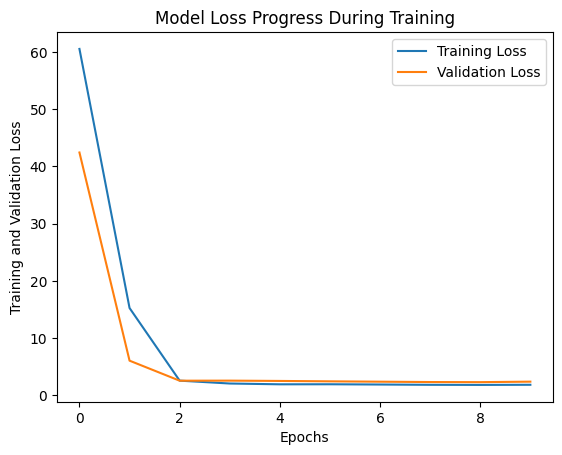

In [343]:
plt.plot(ANN_epochs_hist.history['loss'])
plt.plot(ANN_epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'])

In [346]:
ANN_predict = model.predict(X_test) 

11/11 [==============================] - 0s 4ms/step


In [349]:
ANN_predict_Leb = [1 if i >.5 else 0 for i in ANN_predict ]

In [351]:
print('The accuracy of the model : ', round(accuracy_score(y_test, ANN_predict_Leb), 3))
print('The precision of the model : ', round(precision_score(y_test, ANN_predict_Leb), 3))
print('The recall of the model : ', round(recall_score(y_test, ANN_predict_Leb), 3))
print('The f1 score of the model : ', round(f1_score(y_test, ANN_predict_Leb), 3))
print('\nThe classification_report of the model :\n\n', classification_report(y_test, ANN_predict_Leb))

The accuracy of the model :  0.852
The precision of the model :  0.848
The recall of the model :  0.831
The f1 score of the model :  0.839

The classification_report of the model :

               precision    recall  f1-score   support

           0       0.85      0.87      0.86       176
           1       0.85      0.83      0.84       154

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330

